<header style="background-color: rgb(0, 62, 92); color: white; margin-top: 20px; padding:28px; ">
  <img src="images/Xlogo.png" alt="Transposition of a vector" title="Vector transposition" width="115" style="float: left;">
  <p style=" text-align: center; font-size: 32px;">   
   <strong> Fractional and Volterra processes in Finance  </strong></p>
  <p style=" text-align: center; font-size: 25px;"><strong> Challenge 1 -  Simulation of Gaussian Volterra processes </strong></p>
  <p style=" text-align: center; font-size: 20px;"> Eduardo Abi Jaber </p>
</header>

<p  style="background-color: rgb(0, 62, 92); color: white; text-align: center; font-size: 15px;"><strong> Challenge : Unlock the potential of Gaussian fractional processes and pave the way for more accurate simulations! </strong></p> 

# <font color='red'>PLEASE ENTER YOUR FULL NAMES HERE:</font>

- Soukaina Brueau
- Sylvain Rakotomalala
- Saad Souilmi

<font color='red'>**DEADLINE: 4 February before 10 AM to be sent by email to eduardo.abi-jaber@polytechnique.edu**</font>

The aim of the challenge is to figure out ways to efficiently simulate the Riemann-Liouville fractional Brownian motion:
$$  X_t = \nu  \int_0^t  K(t,s) dW_s, $$
with 
$$ K(t,s) = \frac{1}{\Gamma(H + 1/2)} (t - s)^{H-1/2} 1_{s<t}$$
and $H<1/2$.

The covariance kernel of $X$ is given in the following closed form 
\begin{align}
\Sigma_0(s,u)&=\frac{\nu^2}{\Gamma(H+1/2)^2}\int_0^{s\wedge u} (s-z)^{H-1/2}(u-z)^{H-1/2}dz\\
&=\frac{\nu^2}{\Gamma(\alpha)\Gamma(1+\alpha)}\frac{s^{\alpha}}{u^{1-\alpha}} \; {}_{2}F_{1}\left( 1, 1-\alpha; 1+\alpha ; \frac s u\right)
\end{align}
where $\alpha=H+1/2$ and  ${}_{2}F_{1}$ is the Gaussian hypergeometric function.

**Guidelines** 
- Implement and briefly explain and comment the methods. We are interested in low regimes of $H$. Plot the sample paths on same gaussian increments, to compare paths by paths. You can take $T=1.$ and $n_{steps}=300$ time steps uniformly spaced on $[0,T]$. (set $\nu=1$).  
- Two metrics : running time (using "timeit) to simulate one trajectory and MSE error of the paths wrt to the exact path simulated using cholesky method: 
$$MSE = \sqrt{\frac 1 {n_{steps}} \sum_{i=1}^{n_{steps}} \left(X^{\mbox{method}}_{t_i} - X^{\mbox{cholesky}}_{t_i}\right)^2 }   $$


**Question:** Detail the computations that lead to the covariance kernel. Is it valid for $H\leq 1/2$, $H\geq 1/2$? both? 

**Answer:** 
$$\begin{align}\Sigma_0(s, u) &= \mathbb E(X_sX_u)\\&=\nu^2\mathbb E\left(\int_0^sK(s,v)\,dW_v\times\int_0^uK(u,v)\,dW_v\right)\\& = \nu^2 E\left(\int_0^{s\vee u}K(s,v)1_{v\leqslant s}\,dW_v\times\int_0^{u\vee s}K(u,v)1_{v\leqslant u}\,dW_v\right)\\& \stackrel{\mathclap{\mbox{Itô}}}{=}\nu^2\mathbb E\left(\int_0^{s\vee u} K(s,v)K(u,v)1_{v\leqslant s\wedge u}\,dv\right)\\&=
\nu^2 \int_{0}^{s\wedge u} K(s,v)K(u,v)\,dv\\\Sigma_0(s, u)&=\frac{\nu^2}{\Gamma(H+1/2)^2}\int_0^{s\wedge u} (s-v)^{H-1/2}(u-v)^{H-1/2}dv\end{align}$$
The previous computations are valid $\forall H\in (0,1)$.
Let $s<u$. Thanks to the following power series expansion :
 $$\Bigl(1-\frac{z}{u}\Bigr)^{\alpha-1} = \sum_{n=0}^{+\infty} \frac{(n-\alpha)...(1-\alpha)}{n!} {\Bigl(\frac{z}{u}\Bigr)}^{n}$$

We can write : $$ \int_{0}^{s} {\Bigl(\frac{z}{u}\Bigr)}^{n}\Bigl(1-\frac{z}{s}\Bigr)^{\alpha-1} dz = \frac{s \;n!}{\alpha(\alpha+1)...(\alpha+n)} \Bigl(\frac{s}{u}\Bigr)^{n} $$


The serie driven by the sequence $\Bigl(\frac{s}{\alpha}\frac{(1-\alpha)...(n-\alpha)}{(1+\alpha)...(n+\alpha)} \bigl(\frac{s}{u}\bigr)^{n}\Bigr)_{n}$ converges since $ \frac{s}{\alpha}\frac{(1-\alpha)...(n-\alpha)}{(1+\alpha)...(n+\alpha)} \bigl(\frac{s}{u}\bigr)^{n}=O(\bigl(\frac{s}{u}\bigr)^{n})$. We can thus swap the integral and sum symbols.  

\begin{align*}
        \Sigma_{0}(s,u) &= \frac{\nu ^{2}}{{\Gamma({\alpha})\Gamma(1+\alpha)}} \frac{s^{\alpha}}{u^{1-\alpha}} \sum_{n=0}^{+\infty} \frac{(1)_{n}(1-\alpha)_{n}}{(1+\alpha)_{n}\;n!} \Bigl(\frac{s}{u}\Bigr)^{n} \\
        &= \frac{\nu ^{2}}{{\Gamma({\alpha})\Gamma(1+\alpha)}} \frac{s^{\alpha}}{u^{1-\alpha}} \;\; {}_{2}F_{1}(1,1-\alpha,1+\alpha, \frac{s}{u})\\
\end{align*}

Idem, if $u<s$ :
$$  \Sigma_{0}(s,u) = \frac{\nu ^{2}}{{\Gamma({\alpha})\Gamma(1+\alpha)}} \frac{u^{\alpha}}{s^{1-\alpha}} \; \;{}_{2}F_{1}(1,1-\alpha,1+\alpha, \frac{u}{s})$$

Several options and suggestions detailed below:
- Cholesky
- Different Euler schemes
- multifactor euler vs exact (cholesky on factors)


<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="fbm"></a><h1 style="text-align:center;">1. Exact simulation using Cholesky</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<p  style="background-color: rgb(0, 62, 92); color: white; text-align: center; font-size: 15px;"><strong> Warm up with Cholesky, but aim to set the simulation field on fire with your efficient methods for Gaussian fractional processes. </strong></p> 

In [1]:
%load_ext jupyter_black
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sc
from scipy.special import gamma, gammainc
from scipy.integrate import quad
import scipy.stats as sts

rng = np.random.default_rng(seed=1337)

The ${}_{2}F_{1}$ Gaussian hypergeometric function can be implemented using  scipy `sc.hyp2f1`, pay close attention to the parameters, notably final parameter needs to be less than 1?

**Question:** Check the doc https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.hyp2f1.html and explain.


In [2]:
# Write code
def cov_kernel(H: float, s: float, u: float) -> float:
    """Computes covariance kernel of the Riemann-Liouville fBm
    Args:
        - H: Hurst index
        - s: timestep 1
        - u: timestep 2 (u > s)
    Returns:
        - float: Cov(X_s, X_u)
    """
    alpha = H + 1 / 2
    if s <= u:
        return s**alpha * sc.hyp2f1(1, 1 - alpha, 1 + alpha, s / u) / u ** (1 - alpha)
    else:
        return 0


v_cov_kernel = np.vectorize(cov_kernel)
v_cov_kernel2 = np.vectorize(v_cov_kernel, signature="(), (n), () -> (n)")


def v_cov_matrix(H: float, nu: float, T: float, n_steps: int) -> np.ndarray:
    """Cholesky transform of variance covariance matrix of a Riemann-Liouville fBm trajectory
    Args:
        - H: Hurst index
        - nu: magnifying constant
        - T: time horizon
        - n_steps: number of timesteps
    Returns:
        - np.ndarray: cholesky transform of covariance matrix
    """
    alpha = H + 1 / 2
    dt = T / n_steps
    t = np.arange(1, n_steps + 1) * dt
    cov = v_cov_kernel2(H, t, t)
    return np.linalg.cholesky(
        (cov + cov.T - np.diag(np.diag(cov)))
        * nu**2
        / (gamma(alpha) * gamma(alpha + 1))
    )


# Version with a for loop yields similar results to np.vectorize in terms of execution time
def cov_matrix(H: float, nu: float, T: float, n_steps: int) -> np.ndarray:
    """Cholesky transform of variance covariance matrix of a Riemann-Liouville fBm trajectory
    Args:
        - H: Hurst index
        - nu: magnifying constant
        - T: time horizon
        - n_steps: number of timesteps
    Returns:
        - np.ndarray: cholesky transform of covariance matrix
    """
    alpha = H + 1 / 2
    dt = T / n_steps
    t = np.arange(1, n_steps + 1) * dt
    cov = (
        np.array(
            [
                [cov_kernel(H, t[i], t[j]) if i <= j else 0 for j in range(n_steps)]
                for i in range(n_steps)
            ]
        )
        * nu**2
        / (gamma(alpha) * gamma(alpha + 1))
    )
    return np.linalg.cholesky(cov + cov.T - np.diag(np.diag(cov)))


def cholesky_sampling(normal_sample: np.ndarray, cov: np.ndarray) -> np.ndarray:
    """Sampling of the Riemann-Liouville fBm via cholesky decomposition
    Args:
        - normal_sample: array of i.i.d N(0,1) samples
        - cov: covariance matrix of trajectory
    Returns:
        - np.ndarray: Riemann-Liouville fBm sample path
    """
    if len(normal_sample.shape) == 1:
        return np.concatenate((np.zeros(1), np.dot(cov, normal_sample)))
    else:
        return np.concatenate(
            (np.zeros((1, normal_sample.shape[-1])), cov @ normal_sample), axis=0
        )

In [3]:
nu = 1
T = 1
n_steps = 300
H = 0.3
cov = v_cov_matrix(H, nu, T, n_steps)
t = np.arange(n_steps + 1) * T / n_steps
normal_sample = rng.standard_normal(len(cov))
cholesky_fBm = cholesky_sampling(normal_sample, cov)

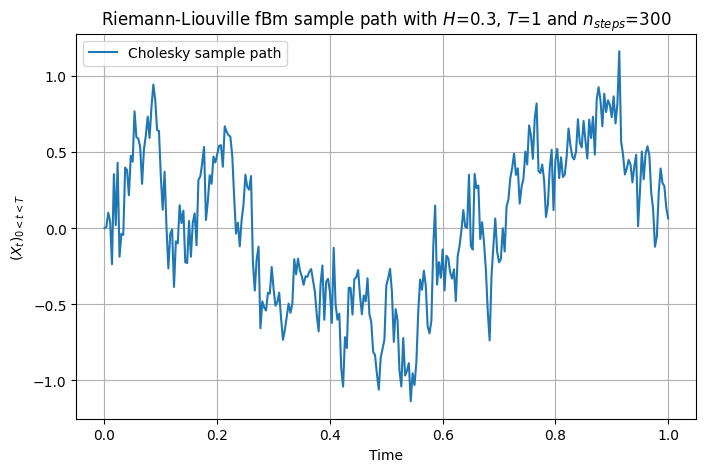

In [4]:
fig = plt.figure(figsize=(8, 5))
plt.plot(t, cholesky_fBm, color="tab:blue", lw=1.5, label="Cholesky sample path")
plt.xlabel("Time")
plt.ylabel(r"$(X_t)_{0<t<T}$")
plt.title(
    rf"Riemann-Liouville fBm sample path with $H$={H}, $T$={T} and $n_{{steps}}$={n_steps}"
)
plt.grid(True)
plt.legend(loc=0)
plt.show()
plt.close()

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="fbm"></a><h1 style="text-align:center;">2. Euler Schemes</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<p  style="background-color: rgb(0, 62, 92); color: white; text-align: center; font-size: 15px;"><strong> Explore the unknown and discover the hidden potential of Euler methods through a performance evaluation. </strong></p> 

We will consider three (modified) Euler schemes after writing 
$$ X_{t_i} = X_0 + \sum_{j=1}^i \underbrace{\int_{t_{j-1}}^{t_j} K(t_i,s) dW_s}_{Y^{i}_j}. $$

1. **EULER 1** Naive: $$ X_{t_i} = X_0 + \nu \sqrt{dt}\sum_{j=1}^i K(t_i,t_{j-1}) Z_j $$
with $Z_j \sim \mathcal N(0,1)$ iid.

2. **EULER 2** Write $dW_s \approx Z_j \frac{ds}{\sqrt{dt}}$ so that 
$$ X_{t_i} = X_0 + \nu \sum_{j=1}^i w_j^i Z_j $$
with 
$$ w_j^i =   \frac{1}{\sqrt{dt}}\int_{t_{j-1}}^{t_j} K(t_i,s) ds =  \int_{t_{j-1}}^{t_j} K(t_i,s) ds  =   \frac{1}{\sqrt{dt}} \frac{1}{\Gamma(H + 0.5)(H + 0.5)} \left( (t_i - t_{j-1})^{H+0.5} - (t_i - t_{j})^{H+0.5} \right)$$
3. **EULER 3** Observe that $(Y^i_1, \ldots, Y^i_i)$ is a centered Gaussian vector with independent components such that the std of the j-th component is 
$$  \tilde w^i_j = \sqrt{\int_{t_{j-1}}^{t_j} K(t_i,s)^2 ds} = \frac{1}{\Gamma(H + 0.5)} \sqrt{\frac{\left( (t_i - t_{j-1})^{2H} - (t_i - t_{j})^{2H} \right)}{2H}}$$
so that we use
$$ X_{t_i} \approx X_0 + \nu \sum_{j=1}^i    \tilde w^i_j Z_j.$$
Note that the simulation is not exact since $$\mathbb E[Y_j^i Y_{j'}^{i'} ] = \int_{t_{j-1}}^{t_j} K(t_i, s) K(t_{i'},s) ds 1_{j=j'} $$,  whereas in the approximation $\mathbb E[\tilde Y_j^i \tilde Y_{j'}^{i'} ] = w^{i}_j w^{i'}_j $. ($\fbox{to double check}$)


$\textbf{Reference}$: Rambaldi, S., & Pinazza, O. (1994). An accurate fractional Brownian motion generator. Physica A: Statistical Mechanics and its Applications, 208(1), 21-30.


Compare on graphs + MSE that the Naive Euler scheme is way off for small values of $H<0.05$. Works fine for bigger values of $H>0.3$... etc... 

**(!)** Please stick to the names **EULER 1**, **EULER 2**, **EULER 3**.

Example of expected graph for sample path:



<img src="images/pathsex.png" alt="Transposition of a vector" title="Vector transposition" width="400">



In the euler schemes the randomness generated by the i.i.d normal variables $(Z_i)_i$ is an approximation of the randomness of the variation of the brownian motion $W$ between the different time steps. Altought very correlated, the i.i.d normal variables $(Z_i)_i$ in the cholesky scheme do not play the exact same role. The "real" trajectory that the euler schemes are meant to approximate under some scenario $\omega$ should in fact be very close the one obtained witht the cholesky scheme above under the same scenario. But we can modify the cholesky scheme to have a better more coherent benchmark.

We have :
$$ X_{t_i} = X_0 + \sum_{j=1}^i \underbrace{\int_{t_{j-1}}^{t_j} K(t_i,s) dW_s}_{Y^{i}_j}. $$
We can thus write :
$$\underbrace{\begin{bmatrix}X_{t_1}\\\vdots\\ X_{t_n}\end{bmatrix}}_{\in \mathbb R^{n\times 1}} = \underbrace{\begin{bmatrix} e_1\\\vdots\\ e_n \end{bmatrix}}_{\in \mathbb R^{n\times\frac{n(n+1)}{2}}} \underbrace{Y}_{\in \mathbb R ^{\frac{n(n+1)}{2}\times 1}} $$
With : 
$$Y = ((Y_j^i)_{1 \leqslant j \leqslant i})_{1\leqslant i \leqslant n}\quad \mbox{and} \quad e_i = (1_{\frac{i(i-1)}{2}< j \leqslant \frac{i(i+1)}{2}})_{1\leqslant j \leqslant \frac{n(n+1)}{2}}$$
The exact sampling of $Y$ using cholesky should produce the exact sample path to be replicated by the euler schemes but it requires $\frac{n(n+1)}{2}$ i.i.d normal random variables and would not be comparable to the euler schemes. A better way to do it is to group, inside the Y vector, the components that share the same brownian increments i.e: $Y = ((Y_j^i)_{j \leqslant i \leqslant n})_{1\leqslant j \leqslant n}$ that way the covariance matrix is block diagonal and each block represents the randomness induced by an increment of the brownian motion, the exact randomness encoded in the i.i.d normal variables of the euler scheme increments. We also notice that we do not need a sample of $Y$ but $n$ samples of linear forms applied to $Y$ that way we in theory only need $n$ i.i.d random variables to sample the $n$ values we are intrested in.

In [5]:
def euler1_increment(H: float, nu: float, T: float, n_steps: int) -> np.ndarray:
    """Computes the weight of the Euler1 scheme increments
    Args:
        - H: Hurst index
        - nu: magnifying constant
        - T: time horizon
        - n_steps: number of timesteps
    Returns:
        - np.ndarray: weight of the increments
    """
    alpha = H + 1 / 2
    dt = T / n_steps
    return nu * dt**H * (np.arange(1, n_steps + 1)) ** (H - 1 / 2) / gamma(alpha)


def euler_sampling(normal_sample: np.ndarray, increment_size: np.ndarray) -> np.ndarray:
    """Samples a trajectory of the Riemann-Liouville process using the Euler1 scheme
    Args:
        - normal_sample: samples of i.i.d N(0,1) random variables
        - increment_size: weight of the independent increments
    Returns:
        - np.ndarray: sample trajectory
    """
    return np.concatenate(
        (
            np.zeros(1),
            np.convolve(normal_sample, increment_size)[: len(normal_sample)],
        )
    )


v_euler_sampling = np.vectorize(euler_sampling, signature="(n), (n) -> (m)")

In [6]:
nu = 1
T = 1
n_steps = 300
H_list = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4]
cholesky_results = np.zeros((len(H_list), n_steps + 1))
euler1_results = np.zeros((len(H_list), n_steps + 1))
for index, H in enumerate(H_list):
    cov = v_cov_matrix(H, nu, T, n_steps)
    cholesky_results[index, :] = cholesky_sampling(normal_sample, cov)
    increment_size = euler1_increment(H, nu, T, n_steps)
    euler1_results[index, :] = euler_sampling(normal_sample, increment_size)

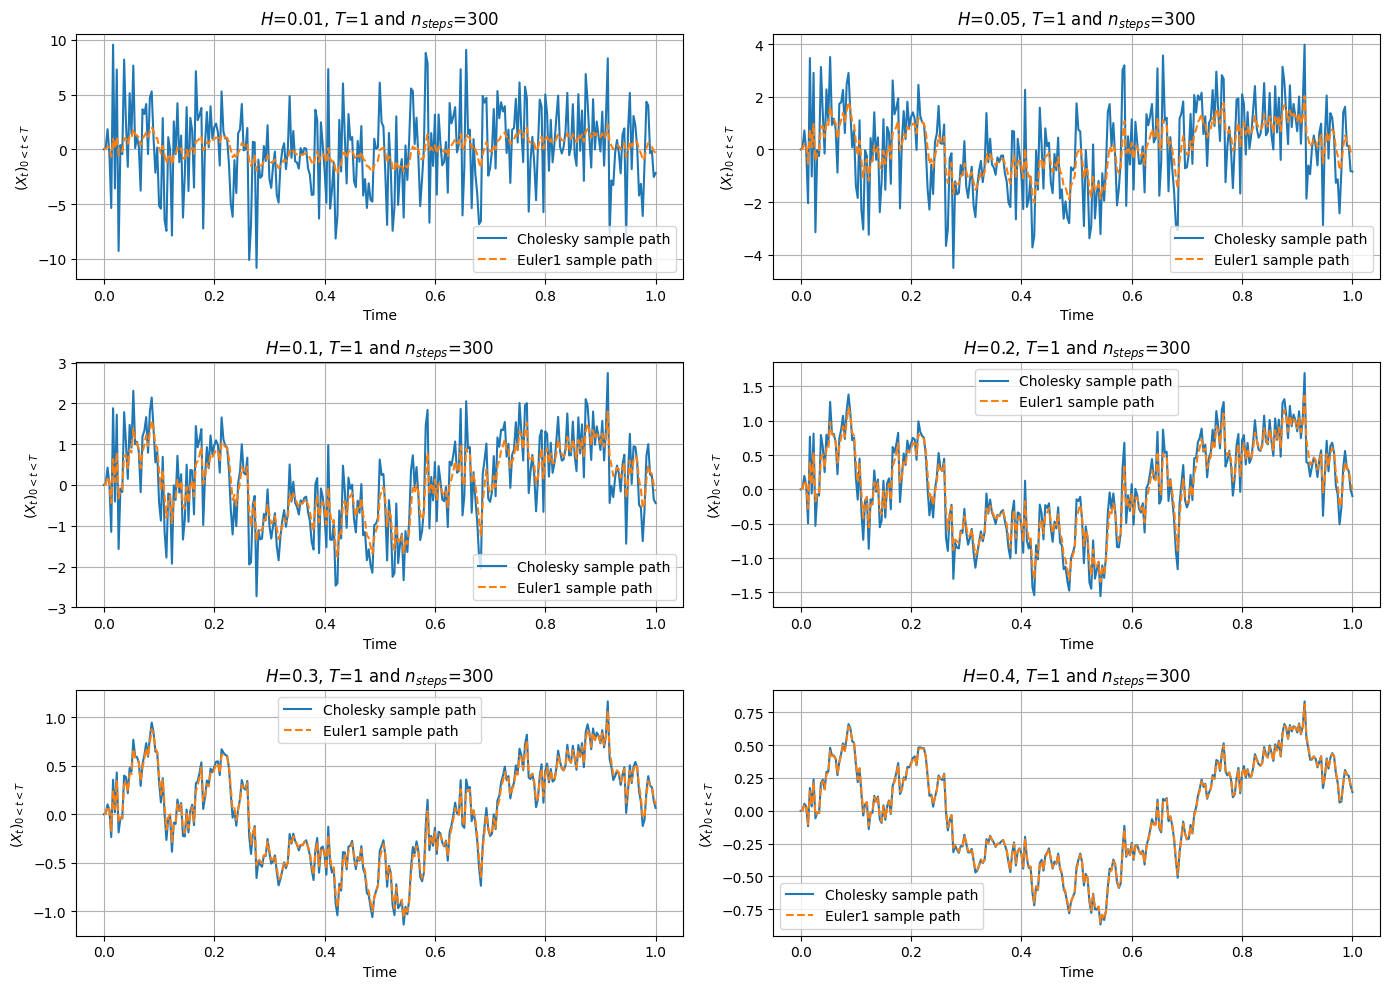

In [7]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
for index, H in enumerate(H_list):
    axs[index // 2][index % 2].plot(
        t,
        cholesky_results[index, :],
        color="tab:blue",
        lw=1.5,
        label="Cholesky sample path",
    )
    axs[index // 2][index % 2].plot(
        t,
        euler1_results[index, :],
        color="tab:orange",
        lw=1.5,
        linestyle="--",
        label="Euler1 sample path",
    )
    axs[index // 2][index % 2].set_xlabel("Time")
    axs[index // 2][index % 2].set_ylabel(r"$(X_t)_{0<t<T}$")
    axs[index // 2][index % 2].set_title(
        rf"$H$={H}, $T$={T} and $n_{{steps}}$={n_steps}"
    )
    axs[index // 2][index % 2].grid(True)
    axs[index // 2][index % 2].legend(loc=0)
fig.tight_layout()
plt.show()
plt.close()

In [8]:
def euler2_increment(H: float, nu: float, T: float, n_steps: int) -> np.ndarray:
    """Computes the weights of the Euler2 scheme increments
    Args:
        - H: Hurst index
        - nu: magnifying constant
        - T: time horizon
        - n_steps: number of timesteps
    Returns:
        - np.ndarray: weight of the form nu*sqrt(dt)*K
    """
    alpha = H + 1 / 2
    dt = T / n_steps
    return (
        nu
        * dt**H
        * (np.arange(1, n_steps + 1) ** alpha - np.arange(n_steps) ** alpha)
        / (alpha * gamma(alpha))
    )

In [9]:
euler2_results = np.zeros((len(H_list), n_steps + 1))
for index, H in enumerate(H_list):
    increment_size = euler2_increment(H, nu, T, n_steps)
    euler2_results[index, :] = euler_sampling(normal_sample, increment_size)

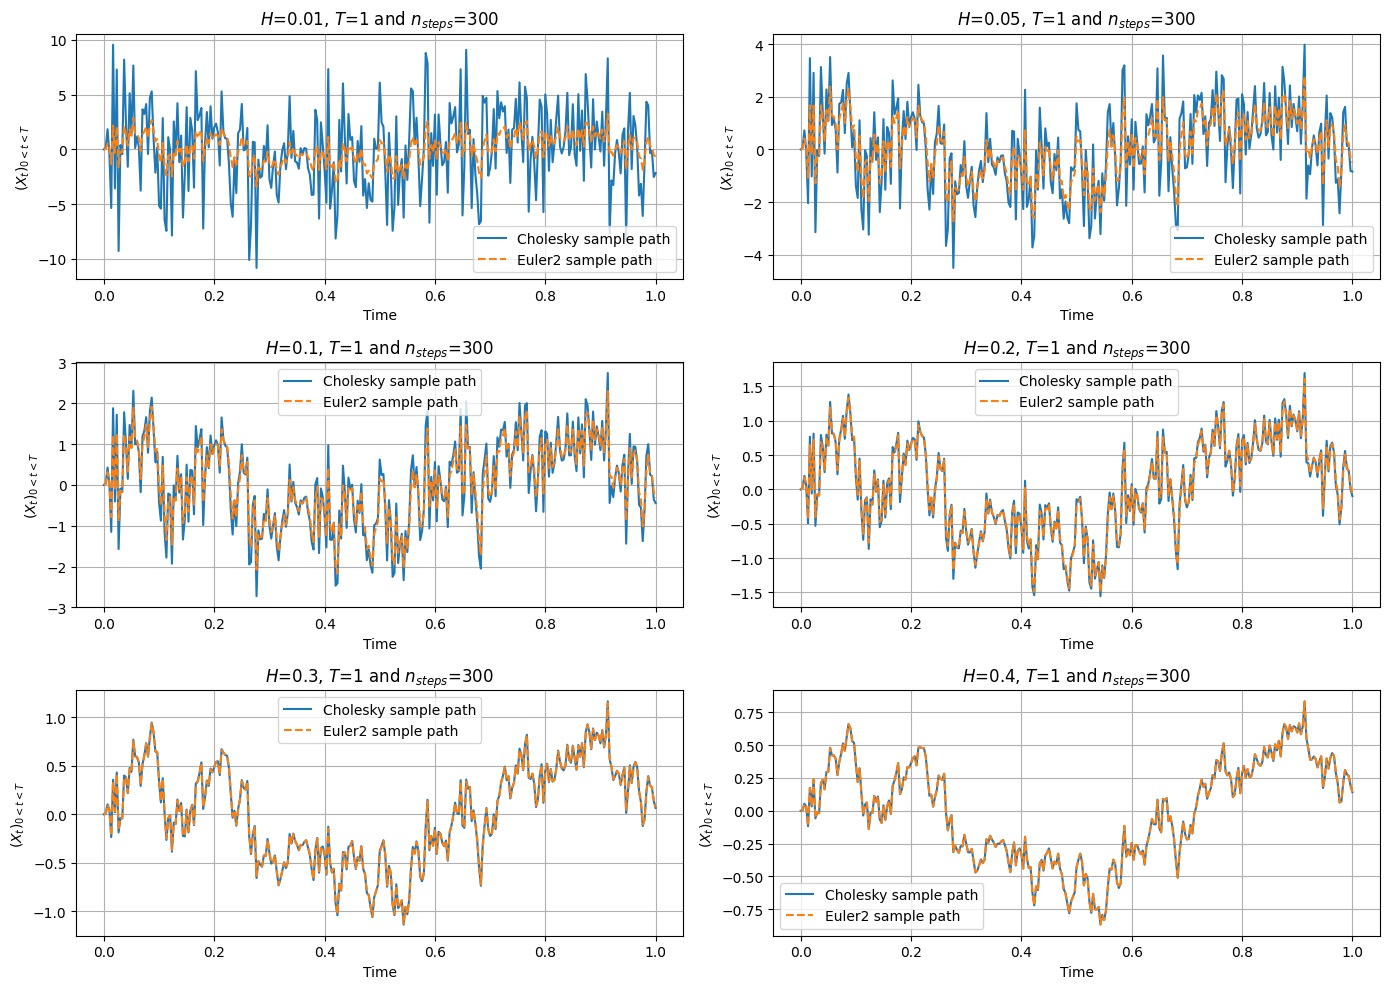

In [10]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
for index, H in enumerate(H_list):
    axs[index // 2][index % 2].plot(
        t,
        cholesky_results[index, :],
        color="tab:blue",
        lw=1.5,
        label="Cholesky sample path",
    )
    axs[index // 2][index % 2].plot(
        t,
        euler2_results[index, :],
        color="tab:orange",
        lw=1.5,
        linestyle="--",
        label="Euler2 sample path",
    )
    axs[index // 2][index % 2].set_xlabel("Time")
    axs[index // 2][index % 2].set_ylabel(r"$(X_t)_{0<t<T}$")
    axs[index // 2][index % 2].set_title(
        rf"$H$={H}, $T$={T} and $n_{{steps}}$={n_steps}"
    )
    axs[index // 2][index % 2].grid(True)
    axs[index // 2][index % 2].legend(loc=0)
fig.tight_layout()
plt.show()
plt.close()

In [11]:
def euler3_increment(H: float, nu: float, T: float, n_steps: int) -> np.ndarray:
    """Computes the weights of the Euler3 scheme increments
    Args:
        - H: Hurst index
        - nu: magnifying constant
        - T: time horizon
        - n_steps: number of timesteps
    Returns:
        - np.ndarray: weight of the form nu*sqrt(dt)*K
    """
    alpha = H + 1 / 2
    dt = T / n_steps
    return (
        nu
        * dt**H
        * np.sqrt(np.arange(1, n_steps + 1) ** (2 * H) - np.arange(n_steps) ** (2 * H))
        / (np.sqrt(2 * H) * gamma(alpha))
    )

In [12]:
euler3_results = np.zeros((len(H_list), n_steps + 1))
for index, H in enumerate(H_list):
    increment_size = euler3_increment(H, nu, T, n_steps)
    euler3_results[index, :] = euler_sampling(normal_sample, increment_size)

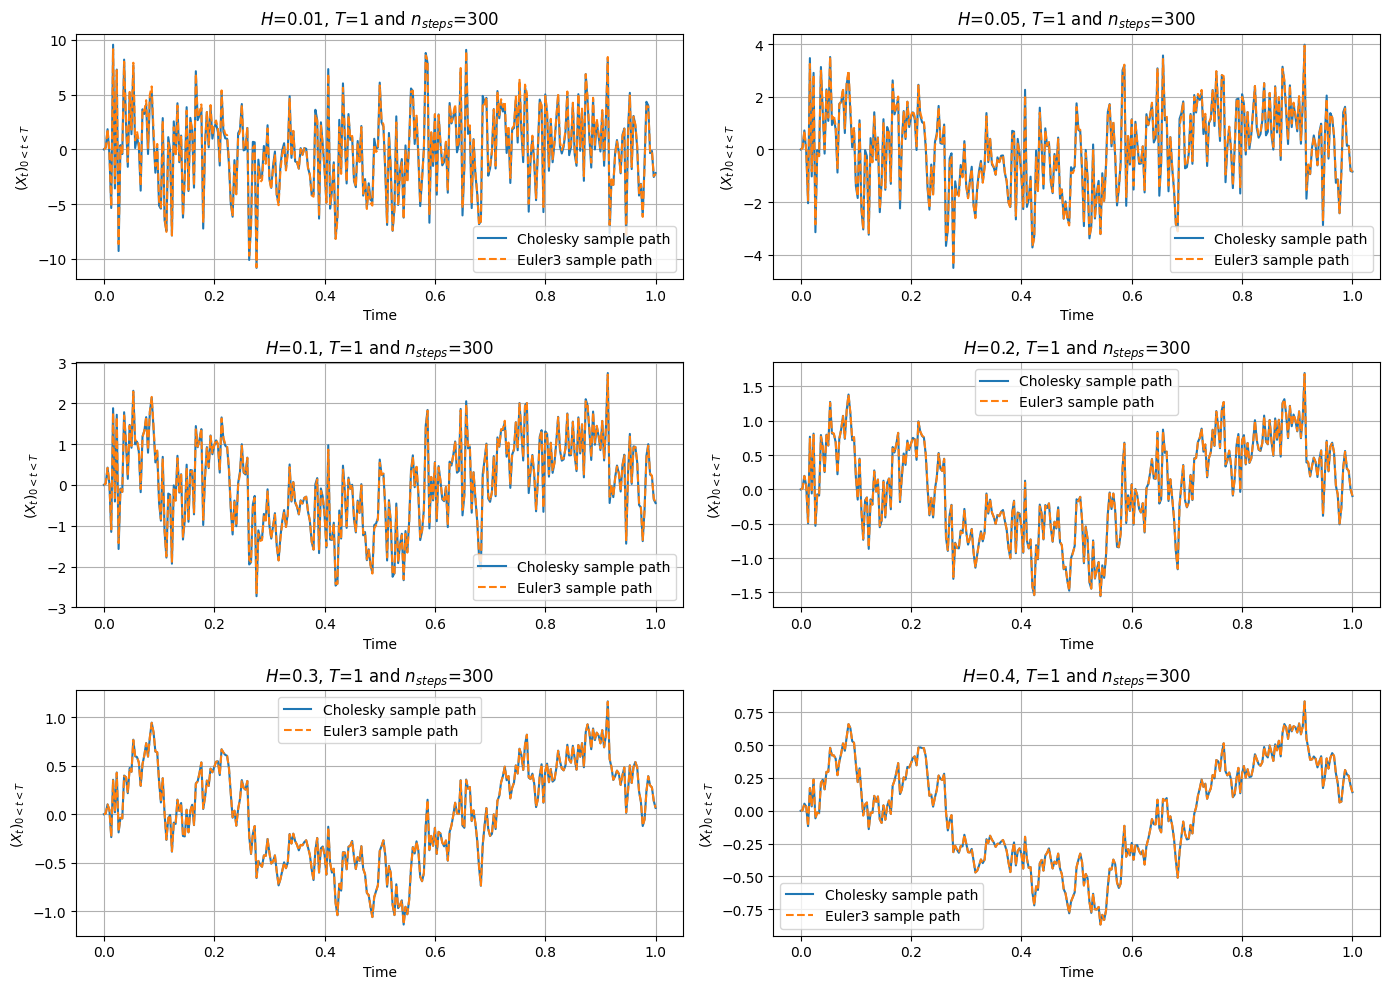

In [13]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
for index, H in enumerate(H_list):
    axs[index // 2][index % 2].plot(
        t,
        cholesky_results[index, :],
        color="tab:blue",
        lw=1.5,
        label="Cholesky sample path",
    )
    axs[index // 2][index % 2].plot(
        t,
        euler3_results[index, :],
        color="tab:orange",
        lw=1.5,
        linestyle="--",
        label="Euler3 sample path",
    )
    axs[index // 2][index % 2].set_xlabel("Time")
    axs[index // 2][index % 2].set_ylabel(r"$(X_t)_{0<t<T}$")
    axs[index // 2][index % 2].set_title(
        rf"$H$={H}, $T$={T} and $n_{{steps}}$={n_steps}"
    )
    axs[index // 2][index % 2].grid(True)
    axs[index // 2][index % 2].legend(loc=0)
fig.tight_layout()
plt.show()
plt.close()

We consider the cholesky sample path as our benchmark and we will evaluate the different euler schemes in terms of RMSE:
$$ \text{RMSE} = \mathbb E \left(\sqrt{\frac 1 {n_{steps}} \sum_{i=1}^{n_{steps}} \left(X^{\mbox{method}}_{t_i} - X^{\mbox{cholesky}}_{t_i}\right)^2 } \right)$$
We will compute a Monte Carlo approximation of the RMSE. We will also compute :
$$ \mathbb E\left[\sup_{i=1,...,n_{steps}}\left|X^{\mbox{cholesky}}_{t_i}\right|\right]$$
In order to gauge the goodness of fit of the RMSE we will also plot the relative error : 
$$ \frac{\text{RMSE}}{2\mathbb E\left[\sup_{i=1,...,n_{steps}}\left|X^{\mbox{cholesky}}_{t_i}\right|\right]}$$

In [14]:
M = int(1e3)  # number of monte carlo paths
H_list = [
    0.01,
    0.05,
    0.1,
    0.2,
    0.3,
    0.4,
]
# path evaluation
confidence_level = 0.05
cholesky_moment = np.zeros((len(H_list), 2))
euler1_rmse = np.zeros((len(H_list), 2))
euler2_rmse = np.zeros((len(H_list), 2))
euler3_rmse = np.zeros((len(H_list), 2))
normal_sample = rng.standard_normal((M, n_steps))

for index, H in enumerate(H_list):
    # Cholesky sampling
    cov = v_cov_matrix(H, nu, T, n_steps)
    cholesky_sample = cholesky_sampling(normal_sample.T, cov)
    # Euler1 Scheme
    increment_size_euler1 = euler1_increment(H, nu, T, n_steps)
    euler1_sample = v_euler_sampling(normal_sample, increment_size_euler1)
    # Euler2 Scheme
    increment_size_euler2 = euler2_increment(H, nu, T, n_steps)
    euler2_sample = v_euler_sampling(normal_sample, increment_size_euler2)
    # Euler 3 Scheme
    increment_size_euler3 = euler3_increment(H, nu, T, n_steps)
    euler3_sample = v_euler_sampling(normal_sample, increment_size_euler3)

    # Control moment
    cholesky_sample_sup = np.max(cholesky_sample, axis=0)
    cholesky_moment[index, 0] = np.mean(cholesky_sample_sup)
    cholesky_moment[index, 1] = np.sqrt(np.var(cholesky_sample_sup) / M) * sts.t.ppf(
        1 - confidence_level / 2, df=M - 1
    )
    # RMSE over sample paths
    euler1_path_error = np.sqrt(
        np.mean((euler1_sample[:, 1:] - cholesky_sample[1:, :].T) ** 2, axis=0)
    )
    euler2_path_error = np.sqrt(
        np.mean((euler2_sample[:, 1:] - cholesky_sample[1:, :].T) ** 2, axis=0)
    )
    euler3_path_error = np.sqrt(
        np.mean((euler3_sample[:, 1:] - cholesky_sample[1:, :].T) ** 2, axis=0)
    )
    # Monte carlo estimation
    euler1_rmse[index, 0] = np.mean(euler1_path_error)
    euler1_rmse[index, 1] = np.sqrt(np.var(euler1_path_error) / M) * sts.t.ppf(
        1 - confidence_level / 2, df=M - 1
    )
    # Confidence interval radius
    euler2_rmse[index, 0] = np.mean(euler2_path_error)
    euler2_rmse[index, 1] = np.sqrt(np.var(euler2_path_error) / M) * sts.t.ppf(
        1 - confidence_level / 2, df=M - 1
    )
    euler3_rmse[index, 0] = np.mean(euler3_path_error)
    euler3_rmse[index, 1] = np.sqrt(np.var(euler3_path_error) / M) * sts.t.ppf(
        1 - confidence_level / 2, df=M - 1
    )

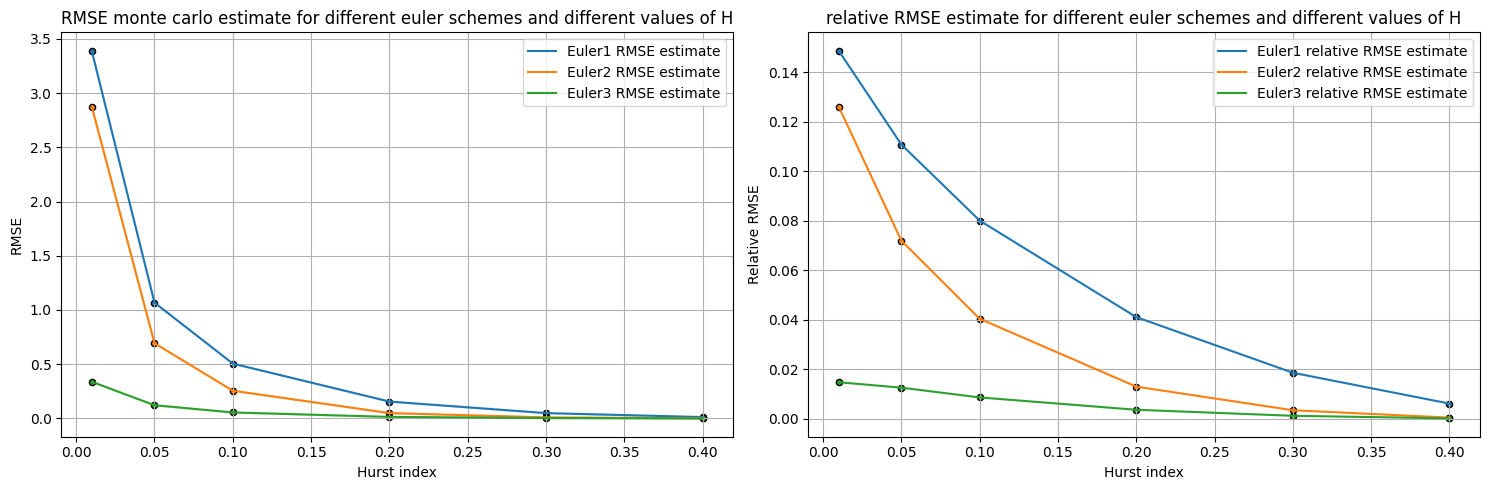

In [15]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
# RMSE plot
ax1.plot(
    H_list, euler1_rmse[:, 0], lw=1.5, color="tab:blue", label="Euler1 RMSE estimate"
)
ax1.scatter(
    H_list, euler1_rmse[:, 0], color="tab:blue", marker="o", edgecolor="k", s=20
)
ax1.fill_between(
    H_list,
    euler1_rmse[:, 0] - euler1_rmse[:, 1],
    euler1_rmse[:, 0] + euler1_rmse[:, 1],
    alpha=0.2,
    color="tab:blue",
)
ax1.plot(
    H_list, euler2_rmse[:, 0], lw=1.5, color="tab:orange", label="Euler2 RMSE estimate"
)
ax1.scatter(
    H_list, euler2_rmse[:, 0], color="tab:orange", marker="o", edgecolor="k", s=20
)
ax1.fill_between(
    H_list,
    euler2_rmse[:, 0] - euler2_rmse[:, 1],
    euler2_rmse[:, 0] + euler2_rmse[:, 1],
    alpha=0.2,
    color="tab:green",
)
ax1.plot(
    H_list, euler3_rmse[:, 0], lw=1.5, color="tab:green", label="Euler3 RMSE estimate"
)
ax1.scatter(
    H_list, euler3_rmse[:, 0], color="tab:green", marker="o", edgecolor="k", s=20
)
ax1.fill_between(
    H_list,
    euler3_rmse[:, 0] - euler3_rmse[:, 1],
    euler3_rmse[:, 0] + euler3_rmse[:, 1],
    alpha=0.2,
    color="tab:green",
)
ax1.set_xlabel("Hurst index")
ax1.set_ylabel("RMSE")
ax1.set_title(
    "RMSE monte carlo estimate for different euler schemes and different values of H"
)
ax1.grid(True)
ax1.legend(loc=0)
# Relatrive RMSE plot
ax2.plot(
    H_list,
    euler1_rmse[:, 0] / (2 * cholesky_moment[:, 0]),
    lw=1.5,
    color="tab:blue",
    label="Euler1 relative RMSE estimate",
)
ax2.scatter(
    H_list,
    euler1_rmse[:, 0] / (2 * cholesky_moment[:, 0]),
    color="tab:blue",
    marker="o",
    edgecolor="k",
    s=20,
)
ax2.plot(
    H_list,
    euler2_rmse[:, 0] / (2 * cholesky_moment[:, 0]),
    lw=1.5,
    color="tab:orange",
    label="Euler2 relative RMSE estimate",
)
ax2.scatter(
    H_list,
    euler2_rmse[:, 0] / (2 * cholesky_moment[:, 0]),
    color="tab:orange",
    marker="o",
    edgecolor="k",
    s=20,
)
ax2.plot(
    H_list,
    euler3_rmse[:, 0] / (2 * cholesky_moment[:, 0]),
    lw=1.5,
    color="tab:green",
    label="Euler3 relative RMSE estimate",
)
ax2.scatter(
    H_list,
    euler3_rmse[:, 0] / (2 * cholesky_moment[:, 0]),
    color="tab:green",
    marker="o",
    edgecolor="k",
    s=20,
)
ax2.set_xlabel("Hurst index")
ax2.set_ylabel("Relative RMSE")
ax2.set_title(
    "relative RMSE estimate for different euler schemes and different values of H"
)
ax2.grid(True)
ax2.legend(loc=0)
fig.tight_layout()
plt.savefig("euler schemes error.pdf")
plt.show()
plt.close()

In [16]:
from tqdm.notebook import tqdm

M = int(1e3)
H = 0.3
n_steps_list = [50, 100, 150, 200, 250, 300]
# timing benchmark
cholesky_timer = np.zeros((len(n_steps_list), 2))
euler1_timer = np.zeros((len(n_steps_list), 2))
euler2_timer = np.zeros((len(n_steps_list), 2))
euler3_timer = np.zeros((len(n_steps_list), 2))


progress_bar = tqdm(total=len(n_steps_list))
for index, n_steps in enumerate(n_steps_list):
    normal_sample = rng.standard_normal((M, n_steps))
    # Timing benchmark
    timer1 = %timeit -o v_cov_matrix(H, nu, T, n_steps)
    cov = v_cov_matrix(H, nu, T, n_steps)
    timer2 = %timeit -o cholesky_sampling(normal_sample.T, cov)
    timer = (
        np.array(timer1.timings) + np.array(timer2.timings)
    ) * 1000  # converting to ms
    cholesky_timer[index, :] = np.array([np.mean(timer), np.std(timer)])

    timer1 = %timeit -o euler1_increment(H, nu, T, n_steps)
    increment_size_euler1 = euler1_increment(H, nu, T, n_steps)
    timer2 = %timeit -o v_euler_sampling(normal_sample, increment_size_euler1)
    timer = (np.array(timer1.timings) + np.array(timer2.timings)) * 1000
    euler1_timer[index, :] = np.array([np.mean(timer), np.std(timer)])

    timer1 = %timeit -o euler2_increment(H, nu, T, n_steps)
    increment_size_euler2 = euler2_increment(H, nu, T, n_steps)
    timer2 = %timeit -o v_euler_sampling(normal_sample, increment_size_euler2)
    timer = (np.array(timer1.timings) + np.array(timer2.timings)) * 1000
    euler2_timer[index, :] = np.array([np.mean(timer), np.std(timer)])

    timer1 = %timeit -o euler3_increment(H, nu, T, n_steps)
    increment_size_euler3 = euler3_increment(H, nu, T, n_steps)
    timer2 = %timeit -o v_euler_sampling(normal_sample, increment_size_euler3)
    timer = (np.array(timer1.timings) + np.array(timer2.timings)) * 1000
    euler3_timer[index, :] = np.array(
        [
            np.mean(timer),
            sts.norm.ppf(1 - confidence_level / 2)
            * np.std(timer)
            / np.sqrt(len(timer)),
        ]
    )
    logs = {
        "H": H,
        "Cholesky": f"{cholesky_timer[index, 0]} ms",
        "Euler1": f"{euler1_timer[index, 0]} ms",
        "Euler2": f"{euler2_timer[index, 0]} ms",
        "Euler3": f"{euler3_timer[index, 0]} ms",
    }
    progress_bar.set_postfix(logs)
    progress_bar.update(1)

  0%|          | 0/6 [00:00<?, ?it/s]

2.22 ms ± 15.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
The slowest run took 18.82 times longer than the fastest. This could mean that an intermediate result is being cached.
697 µs ± 924 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
2.65 µs ± 76.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
3.29 ms ± 14.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.92 µs ± 7.33 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
3.28 ms ± 12.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.55 µs ± 15.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
3.29 ms ± 31.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
13.4 ms ± 367 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
365 µs ± 20.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
3.06 µs ± 56.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
5.06 ms ± 7.72 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4

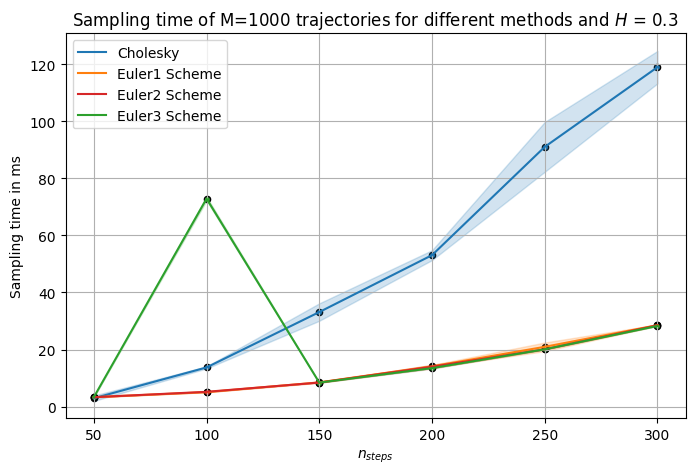

In [17]:
fig = plt.figure(figsize=(8, 5))
plt.plot(n_steps_list, cholesky_timer[:, 0], color="tab:blue", lw=1.5, label="Cholesky")
plt.scatter(
    n_steps_list,
    cholesky_timer[:, 0],
    color="tab:blue",
    marker="o",
    s=20,
    edgecolors="k",
)
plt.fill_between(
    n_steps_list,
    cholesky_timer[:, 0] - cholesky_timer[:, 1],
    cholesky_timer[:, 0] + cholesky_timer[:, 1],
    color="tab:blue",
    alpha=0.2,
)
plt.plot(
    n_steps_list, euler1_timer[:, 0], color="tab:orange", lw=1.5, label="Euler1 Scheme"
)
plt.scatter(
    n_steps_list,
    euler1_timer[:, 0],
    color="tab:orange",
    marker="o",
    s=20,
    edgecolors="k",
)
plt.fill_between(
    n_steps_list,
    euler1_timer[:, 0] - euler1_timer[:, 1],
    euler1_timer[:, 0] + euler1_timer[:, 1],
    color="tab:orange",
    alpha=0.2,
)
plt.plot(
    n_steps_list, euler2_timer[:, 0], color="tab:red", lw=1.5, label="Euler2 Scheme"
)
plt.scatter(
    n_steps_list, euler2_timer[:, 0], color="tab:red", marker="o", s=20, edgecolors="k"
)
plt.fill_between(
    n_steps_list,
    euler2_timer[:, 0] - euler2_timer[:, 1],
    euler2_timer[:, 0] + euler2_timer[:, 1],
    color="tab:red",
    alpha=0.2,
)
plt.plot(
    n_steps_list, euler3_timer[:, 0], color="tab:green", lw=1.5, label="Euler3 Scheme"
)
plt.scatter(
    n_steps_list,
    euler3_timer[:, 0],
    color="tab:green",
    marker="o",
    s=20,
    edgecolors="k",
)
plt.fill_between(
    n_steps_list,
    euler3_timer[:, 0] - euler3_timer[:, 1],
    euler3_timer[:, 0] + euler3_timer[:, 1],
    color="tab:green",
    alpha=0.2,
)
plt.xlabel(r"$n_{steps}$")
plt.ylabel("Sampling time in ms")
plt.title(rf"Sampling time of M={M} trajectories for different methods and $H$ = {H}")
plt.grid(True)
plt.legend(loc=0)
plt.show()
plt.close()

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="fbm"></a><h1 style="text-align:center;">3. Multifactor approximations</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<p  style="background-color: rgb(0, 62, 92); color: white; text-align: center; font-size: 15px;"><strong> Embrace the challenge, and push the boundaries of what's possible by making non-standard multifactor approximations work effectively. </strong></p> 



Based on 
- Abi Jaber, E., & El Euch, O. (2019). Multifactor approximation of rough volatility models. SIAM Journal on Financial Mathematics, 10(2), 309-349. https://arxiv.org/abs/1801.10359
- Abi Jaber, E. (2019). Lifting the Heston model. Quantitative Finance, 19(12), 1995-2013. https://arxiv.org/abs/1810.04868

$$ X_t \approx X_0 + \nu \sum_{k=1}^n  c_k Y^{k}_t$$
with $$  Y^k_t = \int_0^t e^{-x_k(t-s)}dW_s$$
$$  Y^k_{t_i} = e^{-x_k h} Y^k_t + \xi_i^k , \quad \xi_i^k = \int_{t_{i-1}}^{t_i}e^{-x_k(t_i-s)}dW_s$$ 
with the parametrization: 

    
<div style="border:solid 1px; border-radius:8px; padding: 6px 8px 6px 8px; margin-top: 12px; border-color:rgb(0, 62, 92, 0.5); background-color:rgb(251, 251, 251);">
    <strong></strong>		$$ c^n_i = \frac{(r_n^{(1-\alpha)}-1) r_n^{(\alpha-1)(1+n/2)}}{\Gamma(\alpha)\Gamma(1-\alpha)(1-\alpha)}r_n^{(1-\alpha)i},  \quad  x^n_i = \frac {1-\alpha}{2-\alpha} \frac{r_n^{2-\alpha}-1}{r_n^{1-\alpha}-1} r_n^{i-1-n/2},$$
		where $\alpha:=H+1/2$, with a geometric repartition $\eta^n_i=r_n^i$ for some $r_n$ such that 
		$$  r_n \downarrow 1 \quad \mbox{and} \quad n \ln r_n \to \infty, \quad \mbox{as } n \to \infty.$$
</div>
We denote by 
$$ K_n(t) = \sum_{i=1}^n c_i e^{-x_i t}. $$

The first step is to determine a good value or $r_n$ for a choice of $n$, $H$ and $T$.  For this, for a given $H,n,T$,  we can choose $r_n$ to minimize
$$ \int_0^T |K_n(t)-K(t)|^2 dt $$

**Question:** Develop the expression (by developing the square) and show that it admits an explicit expression in terms of incomplete gamma function. Write a minimization function to find r and sanity check with the following table ($H=0.1$, $T=0.5$)

<img src="images/tablr.png" alt="Transposition of a vector" title="Vector transposition" width="400">


**Answer:**
Based on the computations in Abi Jaber, E. (2019). Lifting the Heston model. The kernel $K$ can be written as :
$$K(t) = \int_0^{\infty} e^{-xt}\;\mu(dx)\;\;,\;\text{s.t} \;\;\mu(dx) = \frac{x^{-\alpha}}{\Gamma(\alpha)\Gamma(1-\alpha)}\,dx$$
And with the geometric repartition $\eta_i^n = r_n^{i - \frac{n}{2}}$ we can write:
$$ c_i^n = \int_{\eta_{i-1}^n}^{\eta_i^n}\mu(dx) = \frac{1}{(1-\alpha)\Gamma(\alpha)\Gamma(1-\alpha)}[(\eta_i^n)^{1-\alpha} - (\eta_{i-1}^n)^{1-\alpha}] = \frac{(r_n^{(1-\alpha)}-1) r_n^{(\alpha-1)(1+n/2)}}{\Gamma(\alpha)\Gamma(1-\alpha)(1-\alpha)}r_n^{(1-\alpha)i}$$
$$x_i^n = \frac{1}{c_i^n}\int_{\eta_{i-1}^n}^{\eta_i^n}x\,\mu(dx)=\frac{1}{c_i^n}\frac{(r_n^{(2-\alpha)}-1) r_n^{(\alpha-2)(1+n/2)}}{\Gamma(\alpha)\Gamma(1-\alpha)(1-\alpha)}r_n^{(2-\alpha)i} = \frac {1-\alpha}{2-\alpha} \frac{r_n^{2-\alpha}-1}{r_n^{1-\alpha}-1} r_n^{i-1-n/2}$$
With these expressions in mind, we find the following :
$$\int_0^T|K(t) - K_n(t)|^2\,dt =\int_0^T K_n^2(t)\,dt -2\int_0^T K(t)K_n(t)\,dt + \int_0^TK^2(t)\,dt $$
$$\begin{aligned}\int_0^T K_n^2(t)\,dt &= \sum_{i=1}^n (c_i^n)^2\int_0^T e^{-2x_i^n t}\,dt + 2\sum_{1\leqslant i < j \leqslant n} c_i^nc_j^n\int_0^T e^{—(x_i^n+x_j^n)t}\,dt \\
&= \sum_{i=1}^n \frac{(c_i^n)^2}{2x_i^n}(1-e^{-2x_i^n T}) + 2\sum_{1\leqslant i < j \leqslant n} \frac{c_i^nc_j^n}{x_i^n + x_j^n}(1 - e^{-(x_i^n + x_j^n)T}) \end{aligned}$$
$$\begin{aligned} \int_0^T K(t)K_n(t)\,dt &= \sum_{i=1}^n\frac{c_i^n}{\Gamma(\alpha)}\int_0^T t^{\alpha - 1} e^{-x_i^nt}\,dt\\
&= \sum_{i=1}^n\frac{c_i^n}{(x_i^n)^{\alpha}} P(\alpha, Tx_i^n)\end{aligned}$$
The function $P$ being the incomplete gamma function as defined in the scipy documentation.
$$\forall H\in (0, 1/2)\;\;\int_0^TK^2(t)\,dt = \frac{T^{2H}}{2H\Gamma(\alpha)^2}$$
Thus :
$$\begin{aligned}\int_0^T|K(t) - K_n(t)|^2\,dt &=  \sum_{i=1}^n \left[\frac{(c_i^n)^2}{2x_i^n}(1-e^{-2x_i^n T}) - 2P(\alpha, Tx_i^n)\frac{c_i^n}{(x_i^n)^{\alpha}}\right] + 2\sum_{1\leqslant i < j \leqslant n} \frac{c_i^nc_j^n}{x_i^n + x_j^n}(1 - e^{-(x_i^n + x_j^n)T})  + \frac{T^{2H}}{2H\Gamma(\alpha)^2}\end{aligned}$$
The last term is independant of H, we can ignore it when minimising the $L_2$ between the two kernels.
Thus we only need to minimise :
$$ \sum_{1\leqslant i , j \leqslant n} \frac{c_i^nc_j^n}{x_i^n + x_j^n}(1 - e^{-(x_i^n + x_j^n)T}) - 2\sum_{i=1}^n \frac{c_i^n}{(x_i^n)^{\alpha}}P(\alpha, Tx_i^n)= I_1 - I_2$$

In [18]:
def l2_dist_kernels(r: float, n: int, H: float, T: float) -> float:
    """Computes L2 distance between K_n and the kernel K
    Args:
        - r: parameter r_n
        - n: number of factors
        - H: Hurst index
        - T: time horizon
    Returns:
        - float: L2 distance between K_n and K
    """
    alpha = H + 1 / 2
    gamma1 = gamma(alpha)
    gamma2 = gamma(1 - alpha)
    c = (
        (r ** (1 - alpha) - 1)
        * (r ** ((alpha - 1) * (1 + n / 2)))
        * (r ** ((1 - alpha) * np.arange(1, n + 1)))
        / ((1 - alpha) * gamma1 * gamma2)
    )
    x = (
        (1 - alpha)
        * (r ** (2 - alpha) - 1)
        * (r ** (np.arange(n) - n / 2))
        / ((2 - alpha) * (r ** (1 - alpha) - 1))
    )
    gamma3 = gammainc(alpha, T * x)
    X = x.reshape((-1, 1)) + x.reshape((1, -1))  # 2x2 matrix with sum of x_i + x_j
    C = c.reshape((-1, 1)) @ c.reshape((1, -1))  # Gram matrix of c
    I1 = C * (1 - np.exp(-X * T)) / X
    I2 = 2 * gamma3 * c / x**alpha
    return np.sum(I1) - np.sum(I2)


def factor_parametrization(
    r: float, n: int, H: float, T: float
) -> tuple[np.ndarray, np.ndarray]:
    """Computes the parametrisation (c, x)
    Args:
        - r: parameter r_n
        - n: number of factors
        - H: Hurst index
        - T: time horizon
    Returns:
        - tuple[np.ndarray, np.ndarray]: the parameters c, x
    """
    alpha = H + 1 / 2
    gamma1 = gamma(alpha)
    gamma2 = gamma(1 - alpha)
    c = (
        (r ** (1 - alpha) - 1)
        * (r ** ((alpha - 1) * (1 + n / 2)))
        * (r ** ((1 - alpha) * np.arange(1, n + 1)))
        / ((1 - alpha) * gamma1 * gamma2)
    )
    x = (
        (1 - alpha)
        * (r ** (2 - alpha) - 1)
        * (r ** (np.arange(n) - n / 2))
        / ((2 - alpha) * (r ** (1 - alpha) - 1))
    )
    return c, x

In [19]:
from scipy.optimize import minimize
import pandas as pd

H = 0.1
T = 0.5
n_list = [4, 10, 20, 40, 200]
r_0 = 10
constant = (T ** (2 * H)) / (2 * H * gamma(H + 1 / 2) ** 2)
results = np.zeros((len(n_list), 2))
for index, n in enumerate(n_list):
    optim = minimize(l2_dist_kernels, r_0, args=(n, H, T), method="BFGS")
    r_0 = optim.x
    results[index, :] = np.array([optim.x[0], optim.fun + constant])

In [20]:
df = pd.DataFrame(
    results, columns=[r"$r$", r"$\|K_n - K\|_{L_2(0,T)}^2$"], index=n_list
)
df.index.name = r"$n$"
df

$r$  $\|K_n - K\|_{L_2(0,T)}^2$
$n$                                       
4    50.524591                    0.369929
10   18.061759                    0.112480
20    8.875202                    0.032524
40    4.473712                    0.007567
200   1.696407                    0.000112

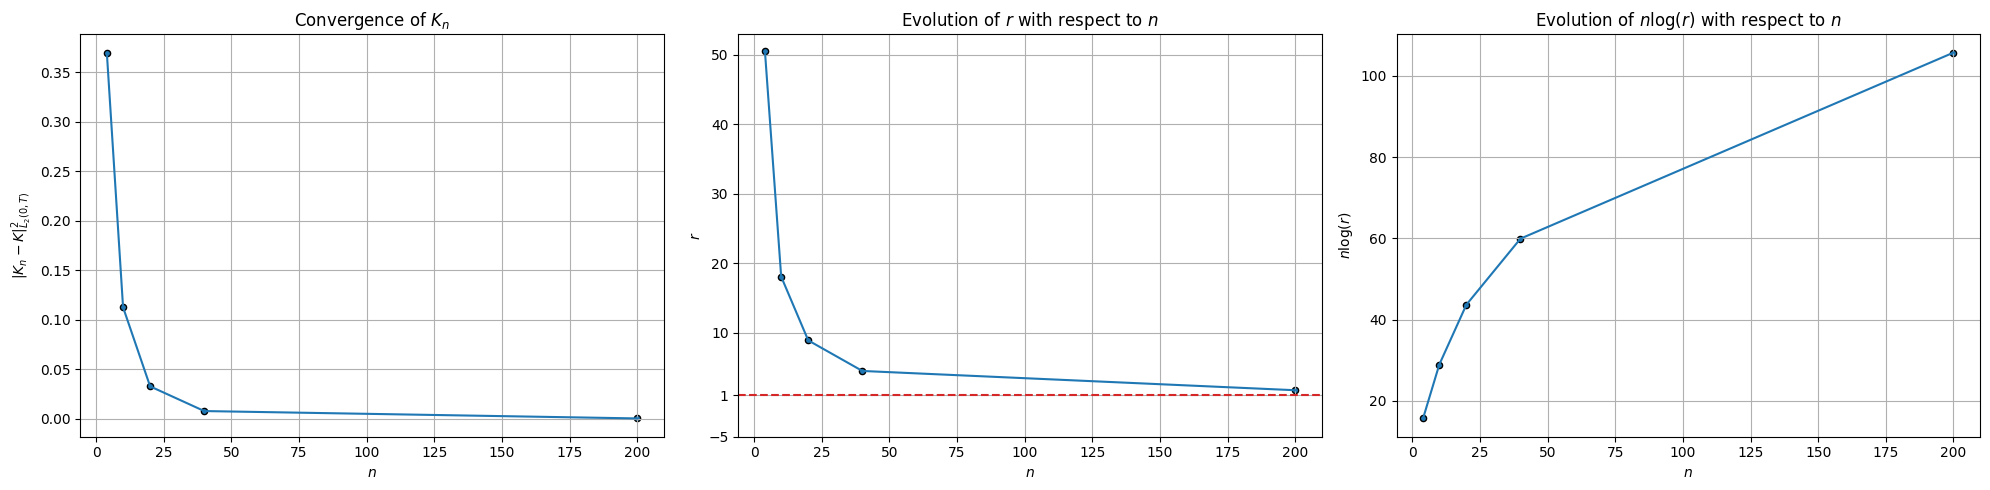

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
ax1.plot(n_list, results[:, 1], lw=1.5, color="tab:blue")
ax1.scatter(n_list, results[:, 1], marker="o", s=20, edgecolors="k")
ax1.set_xlabel(r"$n$")
ax1.set_ylabel(r"$\|K_n - K\|_{L_2(0,T)}^2$")
ax1.set_title(r"Convergence of $K_n$")
ax1.grid(True)
ax2.plot(n_list, results[:, 0], lw=1.5, color="tab:blue")
ax2.scatter(n_list, results[:, 0], marker="o", s=20, edgecolors="k", color="tab:blue")
ax2.axhline(y=1, color="tab:red", linestyle="--")
ax2.set_xlabel(r"$n$")
ax2.set_ylabel(r"$r$")
ax2.set_yticks([-5, 1, 10, 20, 30, 40, 50])
ax2.set_title(r"Evolution of $r$ with respect to $n$")
ax2.grid()
ax3.plot(n_list, np.array(n_list) * np.log(results[:, 0]), lw=1.5, color="tab:blue")
ax3.scatter(
    n_list,
    np.array(n_list) * np.log(results[:, 0]),
    marker="o",
    s=20,
    edgecolors="k",
    color="tab:blue",
)
ax3.set_xlabel(r"$n$")
ax3.set_ylabel(r"$n\log(r)$")
ax3.set_title(r"Evolution of $n\log(r)$ with respect to $n$")
ax3.grid()
fig.tight_layout()
plt.show()
plt.close()

We thus empiraclly verify that the choice $r_n = argmin\|K_n - K\|_2$ verifies: 
$$ r_n \downarrow 1 \quad, \quad n \ln r_n \to \infty,\quad \mbox{and}\quad \|K_n - K\|_2\to 0 \quad \mbox{as } n \to \infty.$$ 

Now that we know how to determin $r$. 

# 3.1 Multifactor with Euler methods on factors


We will consider several Euler-type approximations for factors: 
1. **Factor-Euler 1** :
$$ \xi_i^k \approx e^{-x_k dt} \sqrt{dt} Z_i $$
2.  **Factor-Euler 2**: writing $dW_s = Z_i ds / \sqrt{dt}$
$$ \xi_i^k \approx \frac{1}{\sqrt{dt}}   \int_{t_{i-1}}^{t_i}e^{-x_k(t_i-s)}ds = \frac{1}{\sqrt{dt}}  \frac{1-e^{-x_k dt}}{x_k}$$
3. **Factor-Euler 3** : using that $\xi^k_i$ is gaussian with variance $\frac{1 - e^{-2x_k h}}{2x_k} $, so that 
$$\xi_i^k \approx \sqrt{\frac{1 - e^{-2x_k h}}{2x_k}} Z_i$$
4. **Factor-Euler 4** :: implicit scheme as in lifting heston paper in the appendix 
5. **Factor-Euler 5** : modified variance: 
$$  X_{t_{i+1}} = X_0 + \nu\sum_{k}  c_k e^{-x_k dt}Y^{k}_{t_i} + \nu \int_{t_i}^{t_{i+1}} K_n({t_{i+1},s}) dW_s$$
approximate second term by variance of original kernel $K$. 


We know that $\forall k=1,...,n$ $(Y_{t_i}^k)_i$ defines a arithmetico-geometic sequence, we can write it as :
$$ Y_{t_i}^k = \sum_{l=1}^i e^{-x_k(i-l)dt}\xi_l^k$$
**Factor-Euler 1** :
$$ Y_{t_i}^k \approx \sum_{l=1}^i e^{-x_k(i+1-l)dt}\sqrt{dt}Z_l $$
$$\mbox{Thus :} \quad X_{t_i} \approx \nu\sum_{l=1}^i \left(\sum_{k=1}^n c_ke^{-x_k(i+1-l)dt}\right)\sqrt{dt}Z_l$$

In [22]:
def factor_euler1_increment(
    H: float,
    nu: float,
    r: float,
    n: int,
    c: np.ndarray,
    x: np.ndarray,
    T: float,
    n_steps: int,
) -> np.ndarray:
    """Computes the factor Euler1 scheme increment weights
    Args:
        - H: husrt index
        - nu: magnifiying constant
        - r: parameter r_n
        - n: number of factors
        - c: parameter c
        - x: parameter x
        - T: time horizon
        - n_steps: number of timesteps
    Returns:
        - np.ndarray: factor Euler1 increment sizes
    """
    dt = T / n_steps
    coefs = (
        nu
        * np.sqrt(dt)
        * np.sum(
            c * np.exp(-x * np.arange(1, n_steps + 1).reshape((-1, 1)) * dt), axis=1
        )
    )
    return coefs


def factor_euler_sampling(
    normal_sample: np.ndarray, increment_size: np.ndarray
) -> np.ndarray:
    """Samples a trajectory of the Riemann-Liouville process using the factor Euler schemes
    Args:
        - normal_sample: samples of i.i.d N(0,1) random variables
        - increment_size: weight of the independent increments
    Returns:
        - np.ndarray: sample trajectory
    """
    return np.concatenate(
        (np.zeros(1), np.convolve(normal_sample, increment_size)[: len(normal_sample)])
    )


v_factor_euler_sampling = np.vectorize(
    factor_euler_sampling, signature="(n), (n) -> (m)"
)

In [23]:
nu = 1
T = 1
n_steps = 300
n = 40
H_list = [
    0.01,
    0.05,
    0.1,
    0.2,
    0.3,
    0.4,
]
normal_sample = rng.standard_normal(n_steps)
cholesky_results = np.zeros((len(H_list), n_steps + 1))
factor_euler1_results = np.zeros((len(H_list), n_steps + 1))
for index, H in enumerate(H_list):
    cov = v_cov_matrix(H, nu, T, n_steps)
    cholesky_results[index, :] = cholesky_sampling(normal_sample, cov)
    optim = minimize(l2_dist_kernels, r_0, args=(n, H, T), method="BFGS")
    r = optim.x
    c, x = factor_parametrization(r, n, H, T)
    increment_size = factor_euler1_increment(H, nu, r, n, c, x, T, n_steps)
    factor_euler1_results[index, :] = factor_euler_sampling(
        normal_sample, increment_size
    )

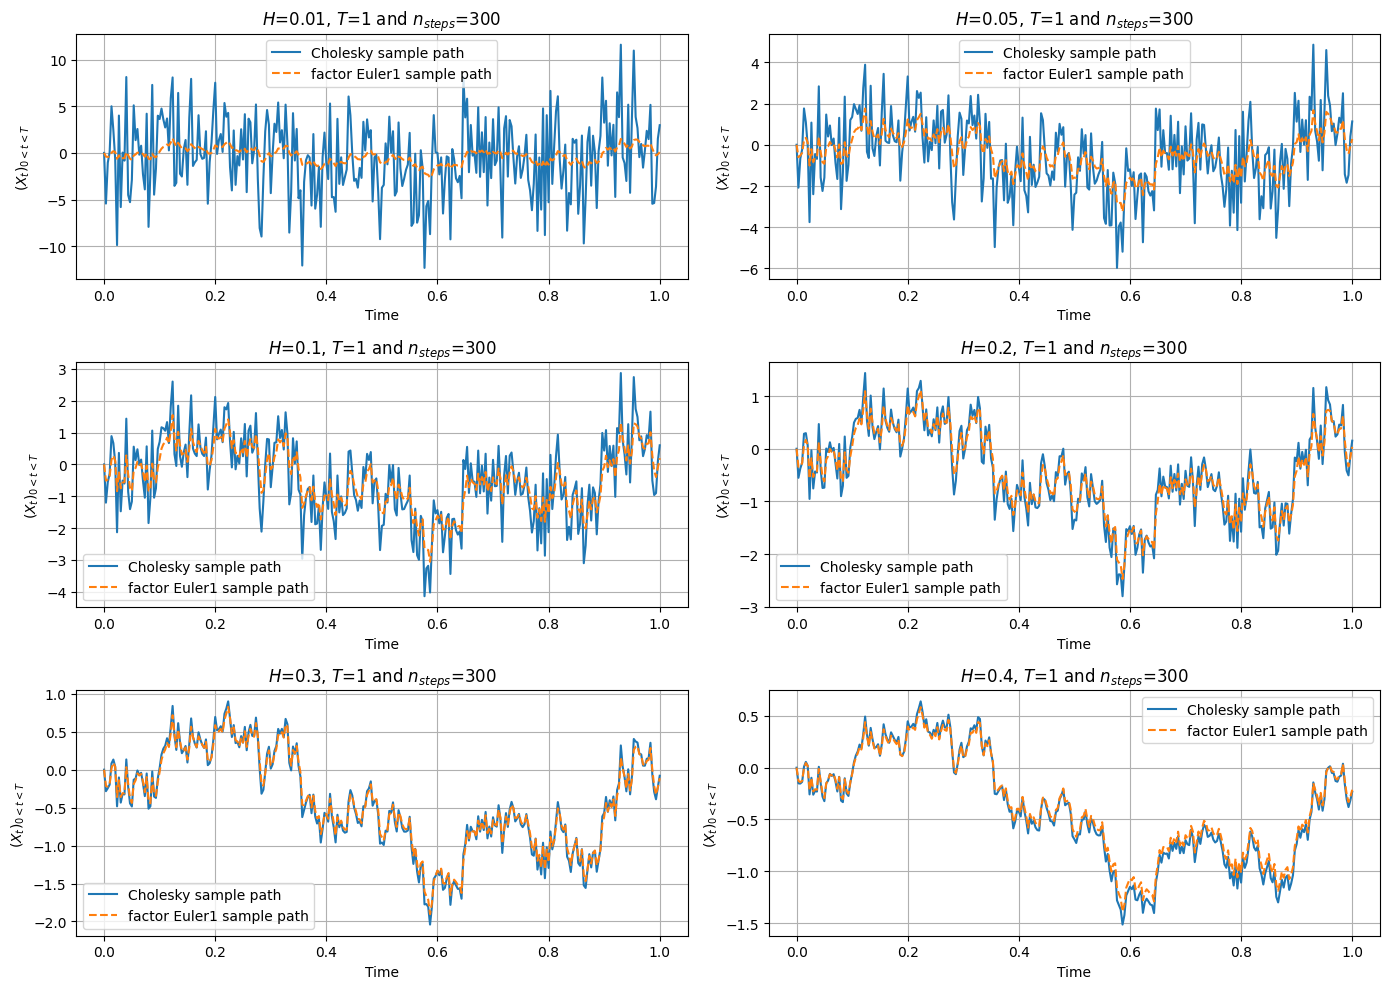

In [24]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
for index, H in enumerate(H_list):
    axs[index // 2][index % 2].plot(
        t,
        cholesky_results[index, :],
        color="tab:blue",
        lw=1.5,
        label="Cholesky sample path",
    )
    axs[index // 2][index % 2].plot(
        t,
        factor_euler1_results[index, :],
        color="tab:orange",
        lw=1.5,
        linestyle="--",
        label="factor Euler1 sample path",
    )
    axs[index // 2][index % 2].set_xlabel("Time")
    axs[index // 2][index % 2].set_ylabel(r"$(X_t)_{0<t<T}$")
    axs[index // 2][index % 2].set_title(
        rf"$H$={H}, $T$={T} and $n_{{steps}}$={n_steps}"
    )
    axs[index // 2][index % 2].grid(True)
    axs[index // 2][index % 2].legend(loc=0)
fig.tight_layout()
plt.savefig("Factor Euler1.pdf")
plt.show()
plt.close()

**Factor-Euler 2** :
$$ \quad X_{t_i} \approx \nu\sum_{l=1}^i \left(\sum_{k=1}^n c_ke^{-x_k(i-l)dt} \frac{1-e^{-x_k dt}}{x_k}\right)\frac{1}{\sqrt{dt}}Z_l$$

In [25]:
def factor_euler2_increment(
    H: float,
    nu: float,
    r: float,
    n: int,
    c: np.ndarray,
    x: np.ndarray,
    T: float,
    n_steps: int,
) -> np.ndarray:
    """Computes the factor Euler2 scheme increment weights
    Args:
        - H: husrt index
        - nu: magnifiying constant
        - r: parameter r_n
        - n: number of factors
        - c: parameter c
        - x: parameter x
        - T: time horizon
        - n_steps: number of timesteps
    Returns:
        - np.ndarray: factor Euler2 increment sizes
    """
    dt = T / n_steps
    coefs = (
        nu
        * np.sum(
            c
            * np.exp(-x * np.arange(n_steps).reshape((-1, 1)) * dt)
            * (1 - np.exp(-x * dt))
            / x,
            axis=1,
        )
        / np.sqrt(dt)
    )
    return coefs

In [26]:
factor_euler2_results = np.zeros((len(H_list), n_steps + 1))
for index, H in enumerate(H_list):
    optim = minimize(l2_dist_kernels, r_0, args=(n, H, T), method="BFGS")
    r = optim.x
    c, x = factor_parametrization(r, n, H, T)
    increment_size = factor_euler2_increment(H, nu, r, n, c, x, T, n_steps)
    factor_euler2_results[index, :] = factor_euler_sampling(
        normal_sample, increment_size
    )

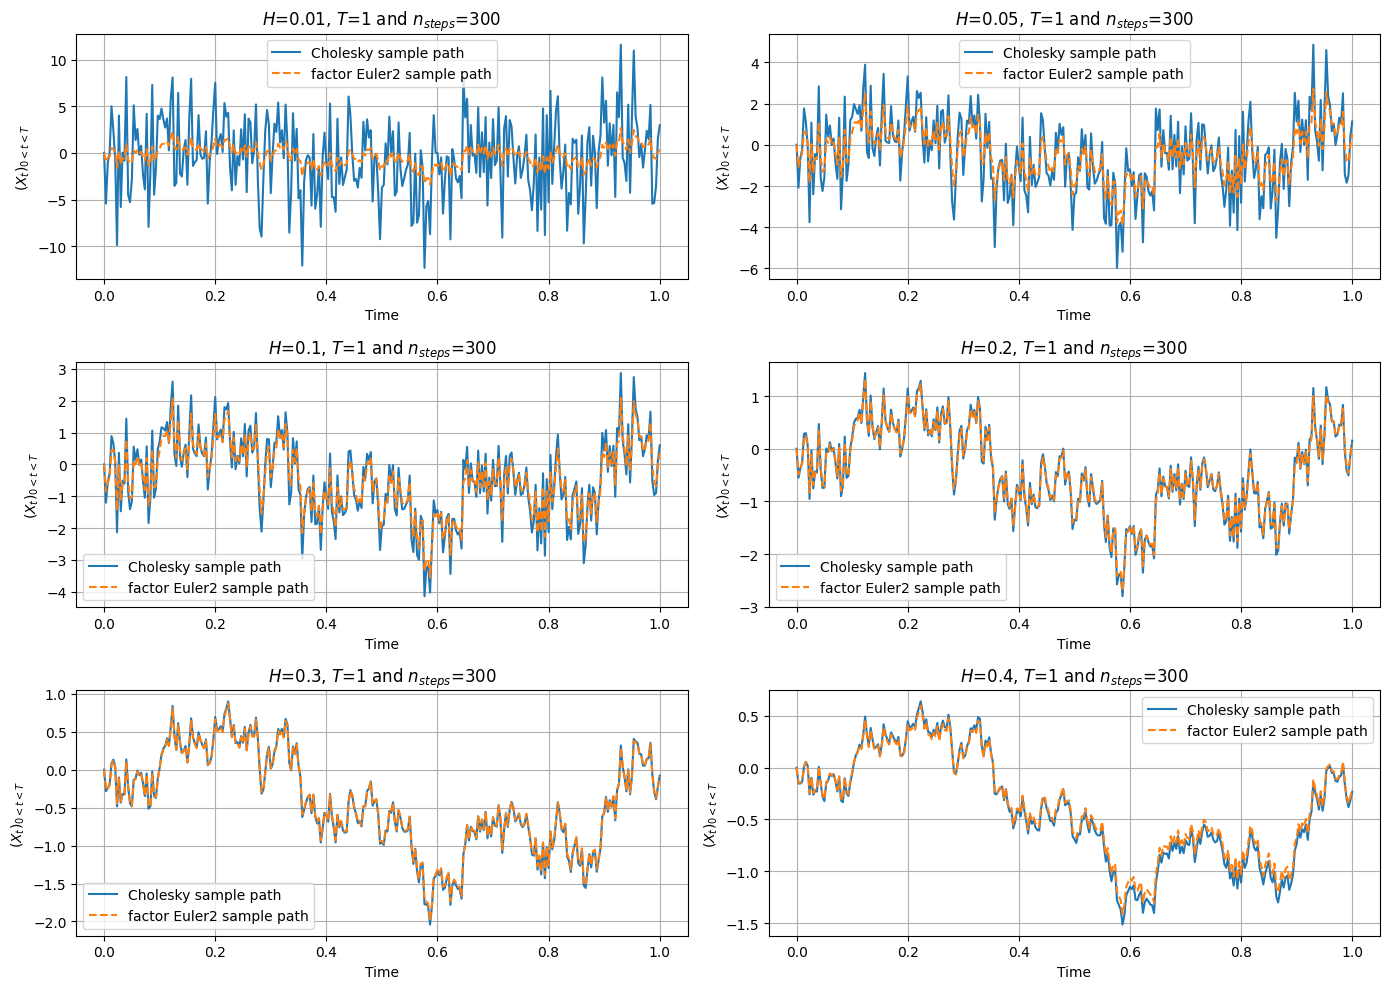

In [27]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
for index, H in enumerate(H_list):
    axs[index // 2][index % 2].plot(
        t,
        cholesky_results[index, :],
        color="tab:blue",
        lw=1.5,
        label="Cholesky sample path",
    )
    axs[index // 2][index % 2].plot(
        t,
        factor_euler2_results[index, :],
        color="tab:orange",
        lw=1.5,
        linestyle="--",
        label="factor Euler2 sample path",
    )
    axs[index // 2][index % 2].set_xlabel("Time")
    axs[index // 2][index % 2].set_ylabel(r"$(X_t)_{0<t<T}$")
    axs[index // 2][index % 2].set_title(
        rf"$H$={H}, $T$={T} and $n_{{steps}}$={n_steps}"
    )
    axs[index // 2][index % 2].grid(True)
    axs[index // 2][index % 2].legend(loc=0)
fig.tight_layout()
plt.show()
plt.close()

**Factor-Euler 3** :
$$ \quad X_{t_i} \approx \nu\sum_{l=1}^i \left(\sum_{k=1}^n c_ke^{-x_k(i-l)dt}\sqrt{\frac{1 - e^{-2x_k dt}}{2x_k}} \right)Z_l$$

In [28]:
def factor_euler3_increment(
    H: float,
    nu: float,
    r: float,
    n: int,
    c: np.ndarray,
    x: np.ndarray,
    T: float,
    n_steps: int,
) -> np.ndarray:
    """Computes the factor Euler3 scheme increment weights
    Args:
        - H: husrt index
        - nu: magnifiying constant
        - r: parameter r_n
        - n: number of factors
        - c: parameter c
        - x: parameter x
        - T: time horizon
        - n_steps: number of timesteps
    Returns:
        - np.ndarray: factor Euler3 increment sizes
    """
    dt = T / n_steps
    coefs = nu * np.sum(
        c
        * np.exp(-x * np.arange(n_steps).reshape((-1, 1)) * dt)
        * np.sqrt((1 - np.exp(-2 * x * dt)) / (2 * x)),
        axis=1,
    )
    return coefs

In [29]:
factor_euler3_results = np.zeros((len(H_list), n_steps + 1))
for index, H in enumerate(H_list):
    optim = minimize(l2_dist_kernels, r_0, args=(n, H, T), method="BFGS")
    r = optim.x
    c, x = factor_parametrization(r, n, H, T)
    increment_size = factor_euler3_increment(H, nu, r, n, c, x, T, n_steps)
    factor_euler3_results[index, :] = factor_euler_sampling(
        normal_sample, increment_size
    )

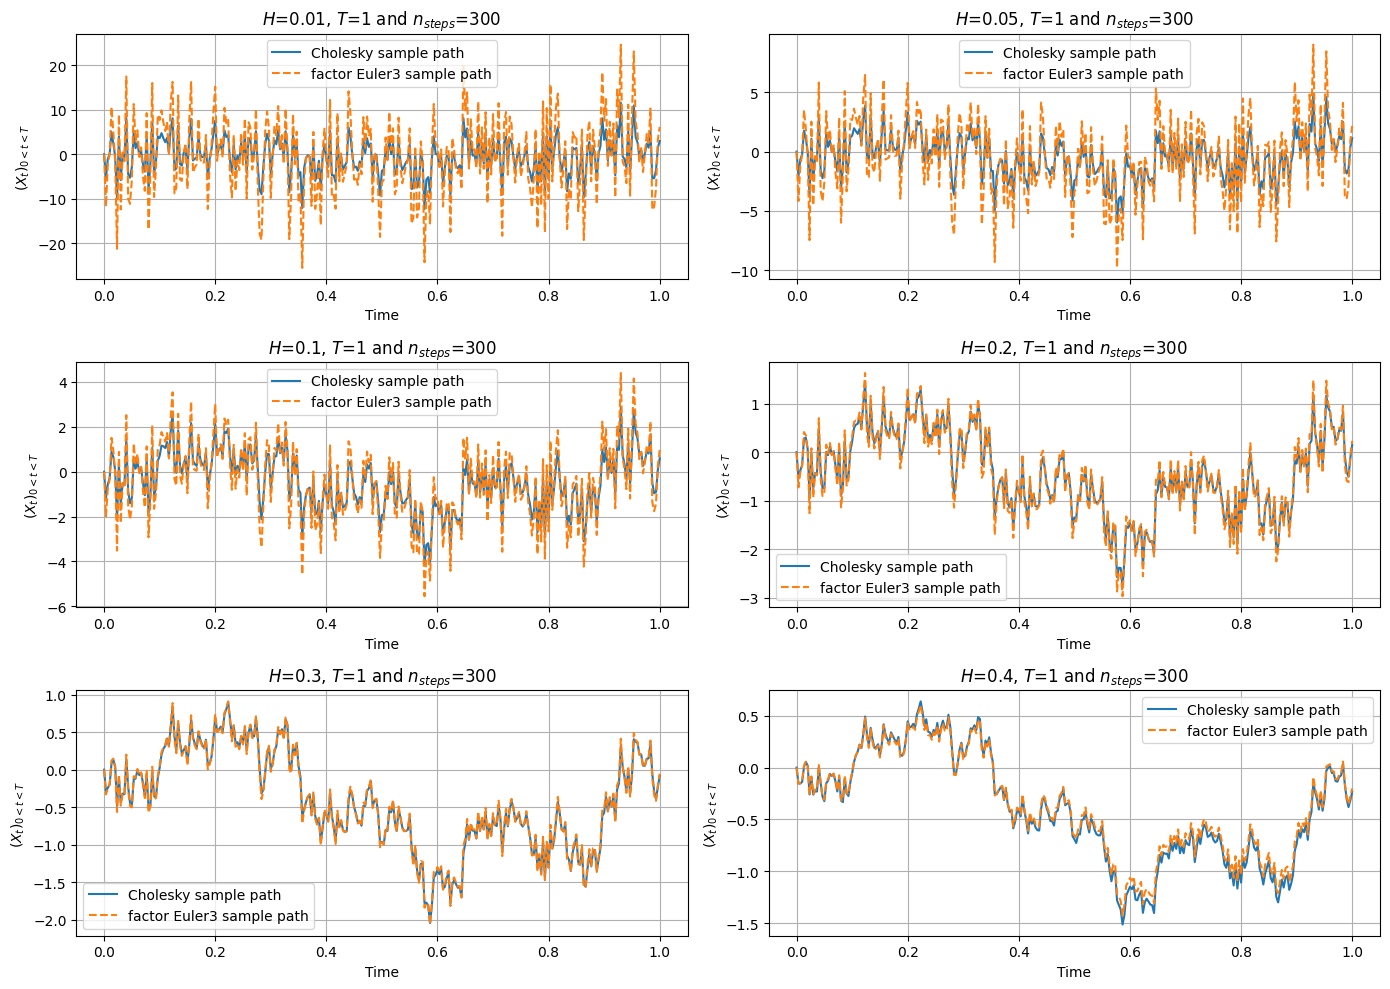

In [30]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
for index, H in enumerate(H_list):
    axs[index // 2][index % 2].plot(
        t,
        cholesky_results[index, :],
        color="tab:blue",
        lw=1.5,
        label="Cholesky sample path",
    )
    axs[index // 2][index % 2].plot(
        t,
        factor_euler3_results[index, :],
        color="tab:orange",
        lw=1.5,
        linestyle="--",
        label="factor Euler3 sample path",
    )
    axs[index // 2][index % 2].set_xlabel("Time")
    axs[index // 2][index % 2].set_ylabel(r"$(X_t)_{0<t<T}$")
    axs[index // 2][index % 2].set_title(
        rf"$H$={H}, $T$={T} and $n_{{steps}}$={n_steps}"
    )
    axs[index // 2][index % 2].grid(True)
    axs[index // 2][index % 2].legend(loc=0)
fig.tight_layout()
plt.show()
plt.close()

4. **Factor-Euler 4** :: implicit scheme as in lifting heston paper in the appendix
   $$dY_t^k = -x_k Y^k_t dt + dW_t$$
The implicit scheme can be written as :
   $$ X_{t_i} = X_0 + \nu \sum_k c_k Y_{t_i}^k$$
   $$ Y^k_{t_{i+1}} = \frac{1}{1+x_kdt}\left(Y_{t_i}^k + \sqrt{dt} Z_{i+1}\right)$$
   $$ Y^k_{t_i}= \frac{\sqrt{dt}}{1+x_kdt}\sum_{l=1}^i\frac{1}{(1+x_kdt)^{i-l}}Z_l$$
Thus :
   $$ X_{t_i} = X_0 + \nu \sum_{l=1}^i\sqrt{dt}\left(\sum_{k=1}^n \frac{c_k}{(1+x_kdt)^{i+1-l}} \right)Z_{l}$$

In [31]:
def factor_euler4_increment(
    H: float,
    nu: float,
    r: float,
    n: int,
    c: np.ndarray,
    x: np.ndarray,
    T: float,
    n_steps: int,
) -> np.ndarray:
    """Computes the factor Euler4 scheme increment weights
    Args:
        - H: husrt index
        - nu: magnifiying constant
        - r: parameter r_n
        - n: number of factors
        - c: parameter c
        - x: parameter x
        - T: time horizon
        - n_steps: number of timesteps
    Returns:
        - np.ndarray: factor Euler4 increment sizes
    """
    dt = T / n_steps
    coefs = (
        nu
        * np.sqrt(dt)
        * np.sum(
            c * (1 / (1 + x * dt)) ** np.arange(1, n_steps + 1).reshape((-1, 1)),
            axis=1,
        )
    )
    return coefs

In [32]:
factor_euler4_results = np.zeros((len(H_list), n_steps + 1))
for index, H in enumerate(H_list):
    optim = minimize(l2_dist_kernels, r_0, args=(n, H, T), method="BFGS")
    r = optim.x
    c, x = factor_parametrization(r, n, H, T)
    increment_size = factor_euler4_increment(H, nu, r, n, c, x, T, n_steps)
    factor_euler4_results[index, :] = factor_euler_sampling(
        normal_sample, increment_size
    )

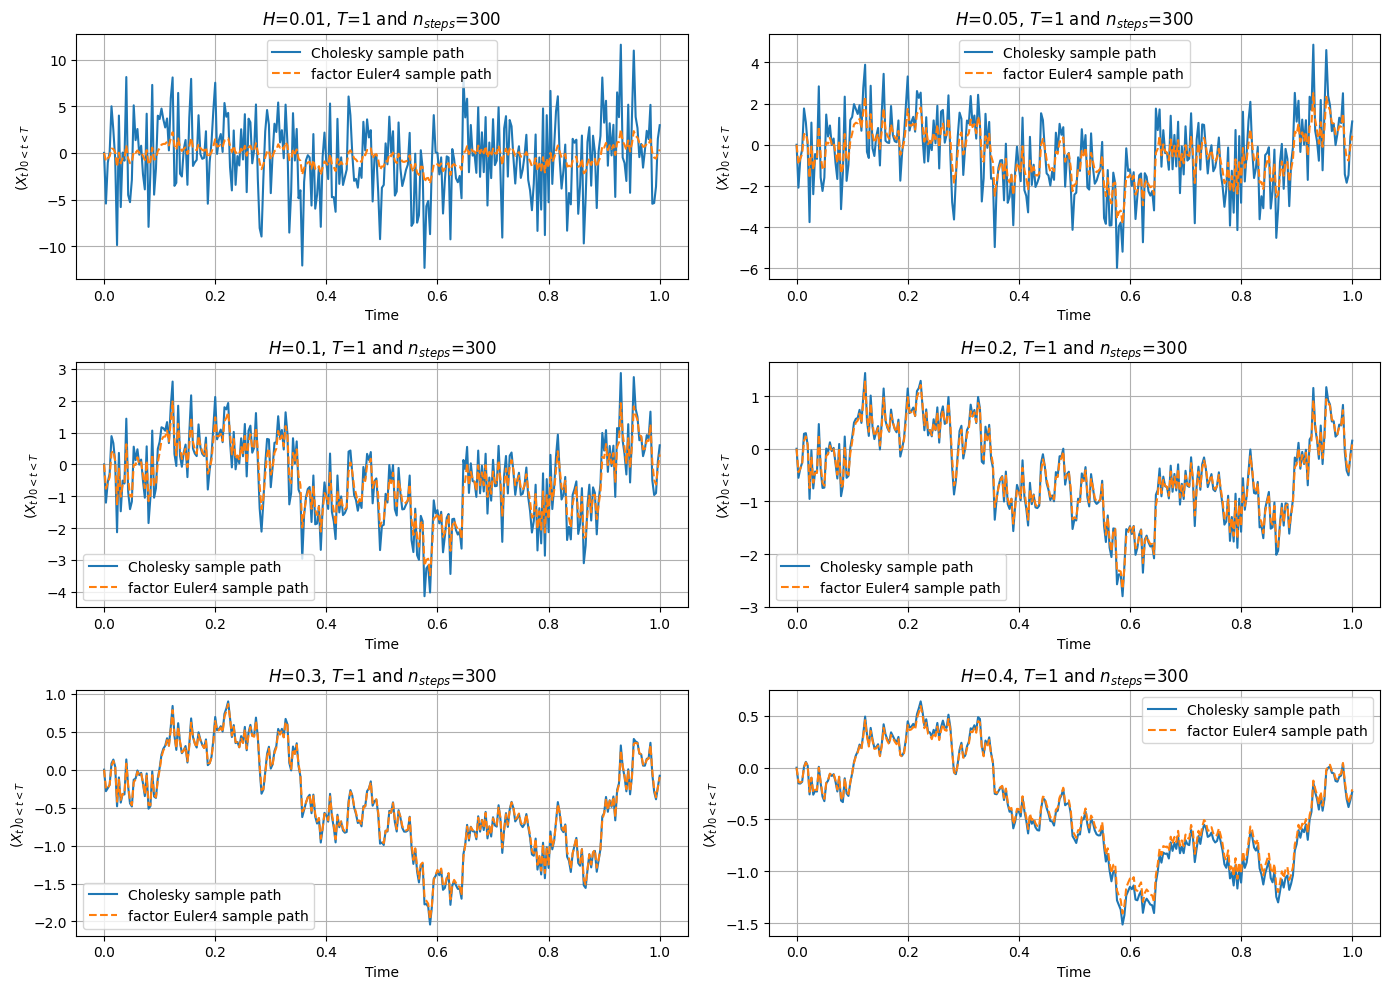

In [33]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
for index, H in enumerate(H_list):
    axs[index // 2][index % 2].plot(
        t,
        cholesky_results[index, :],
        color="tab:blue",
        lw=1.5,
        label="Cholesky sample path",
    )
    axs[index // 2][index % 2].plot(
        t,
        factor_euler4_results[index, :],
        color="tab:orange",
        lw=1.5,
        linestyle="--",
        label="factor Euler4 sample path",
    )
    axs[index // 2][index % 2].set_xlabel("Time")
    axs[index // 2][index % 2].set_ylabel(r"$(X_t)_{0<t<T}$")
    axs[index // 2][index % 2].set_title(
        rf"$H$={H}, $T$={T} and $n_{{steps}}$={n_steps}"
    )
    axs[index // 2][index % 2].grid(True)
    axs[index // 2][index % 2].legend(loc=0)
fig.tight_layout()
plt.show()
plt.close()

**Factor-Euler 5** : modified variance: 
$$  X_{t_{i+1}} = X_0 + \nu\sum_{k}  c_k e^{-x_k dt}Y^{k}_{t_i} + \nu \int_{t_i}^{t_{i+1}} K_n({t_{i+1},s}) dW_s$$
$$  X_{t_{i+1}} = X_0 + \nu\sum_{l=1}^i \left(\sum_{k=1}^n c_ke^{-x_k(i-l+1)dt}\sqrt{\frac{1 - e^{-2x_k dt}}{2x_k}} \right)Z_l + \nu \int_{t_i}^{t_{i+1}} K_n({t_{i+1},s}) dW_s$$
$$\nu \int_{t_i}^{t_{i+1}} K_n({t_{i+1},s}) dW_s \approx \frac{\nu dt^H}{\Gamma(\alpha)\sqrt{2H}}Z_{i+1}$$
In order to simulate $Y$ we chose the euler2 scheme.

In [34]:
def factor_euler5_increment(
    H: float,
    nu: float,
    r: float,
    n: int,
    c: np.ndarray,
    x: np.ndarray,
    T: float,
    n_steps: int,
    euler_scheme: int = 4,
) -> tuple[np.ndarray, float]:
    """Computes the factor Euler5 scheme increment weights
    Args:
        - H: husrt index
        - nu: magnifiying constant
        - r: parameter r_n
        - n: number of factors
        - c: parameter c
        - x: parameter x
        - T: time horizon
        - n_steps: number of timesteps
        - euler_scheme: factor euler scheme to sample Y
    Returns:
        - tuple[np.ndarray, float]: factor Euler5 increment sizes
    """
    dt = T / n_steps
    alpha = H + 1 / 2
    if euler_scheme == 1:
        coefs = (
            nu
            * np.sqrt(dt)
            * np.sum(
                c
                * np.exp(-x * dt)
                * np.exp(-x * np.arange(1, n_steps + 1).reshape((-1, 1)) * dt),
                axis=1,
            )
        )
    elif euler_scheme == 2:
        coefs = (
            nu
            * np.sum(
                c
                * np.exp(-x * dt)
                * np.exp(-x * np.arange(n_steps).reshape((-1, 1)) * dt)
                * (1 - np.exp(-x * dt))
                / x,
                axis=1,
            )
            / np.sqrt(dt)
        )
    elif euler_scheme == 3:
        coefs = nu * np.sum(
            c
            * np.exp(-x * dt)
            * np.exp(-x * np.arange(n_steps).reshape((-1, 1)) * dt)
            * np.sqrt((1 - np.exp(-2 * x * dt)) / (2 * x)),
            axis=1,
        )
    else:
        coefs = (
            nu
            * np.sqrt(dt)
            * np.sum(
                c
                * np.exp(-x * dt)
                * (1 / (1 + x * dt)) ** np.arange(1, n_steps + 1).reshape((-1, 1)),
                axis=1,
            )
        )
    return coefs, nu * dt**H / (gamma(alpha) * np.sqrt(2 * H))


def factor_euler5_sampling(
    normal_sample: np.ndarray, increment_size: np.ndarray, exact_increment_size: float
) -> np.ndarray:
    """Samples a trajectory of the Riemann-Liouville process using the factor Euler5 scheme
    Args:
        - normal_sample: samples of i.i.d N(0,1) random variables
        - increment_size: weight of the independent increments from one of the other factor euler schemes
        - exact_increment_size : weight of the exact increment
    Returns:
        - np.ndarray: sample trajectory
    """
    return np.concatenate(
        (
            np.zeros(2),
            np.convolve(normal_sample, increment_size)[: len(normal_sample) - 1],
        )
    ) + np.concatenate((np.zeros(1), exact_increment_size * normal_sample))


v_factor_euler5_sampling = np.vectorize(
    factor_euler5_sampling, signature="(n), (n), () -> (m)"
)

In [35]:
n = 20
factor_euler5_results = np.zeros((len(H_list), n_steps + 1))
for index, H in enumerate(H_list):
    optim = minimize(l2_dist_kernels, r_0, args=(n, H, T), method="BFGS")
    r = optim.x
    c, x = factor_parametrization(r, n, H, T)
    increment_size, exact_increment_size = factor_euler5_increment(
        H, nu, r, n, c, x, T, n_steps, euler_scheme=3
    )
    factor_euler5_results[index, :] = factor_euler5_sampling(
        normal_sample, increment_size, exact_increment_size
    )

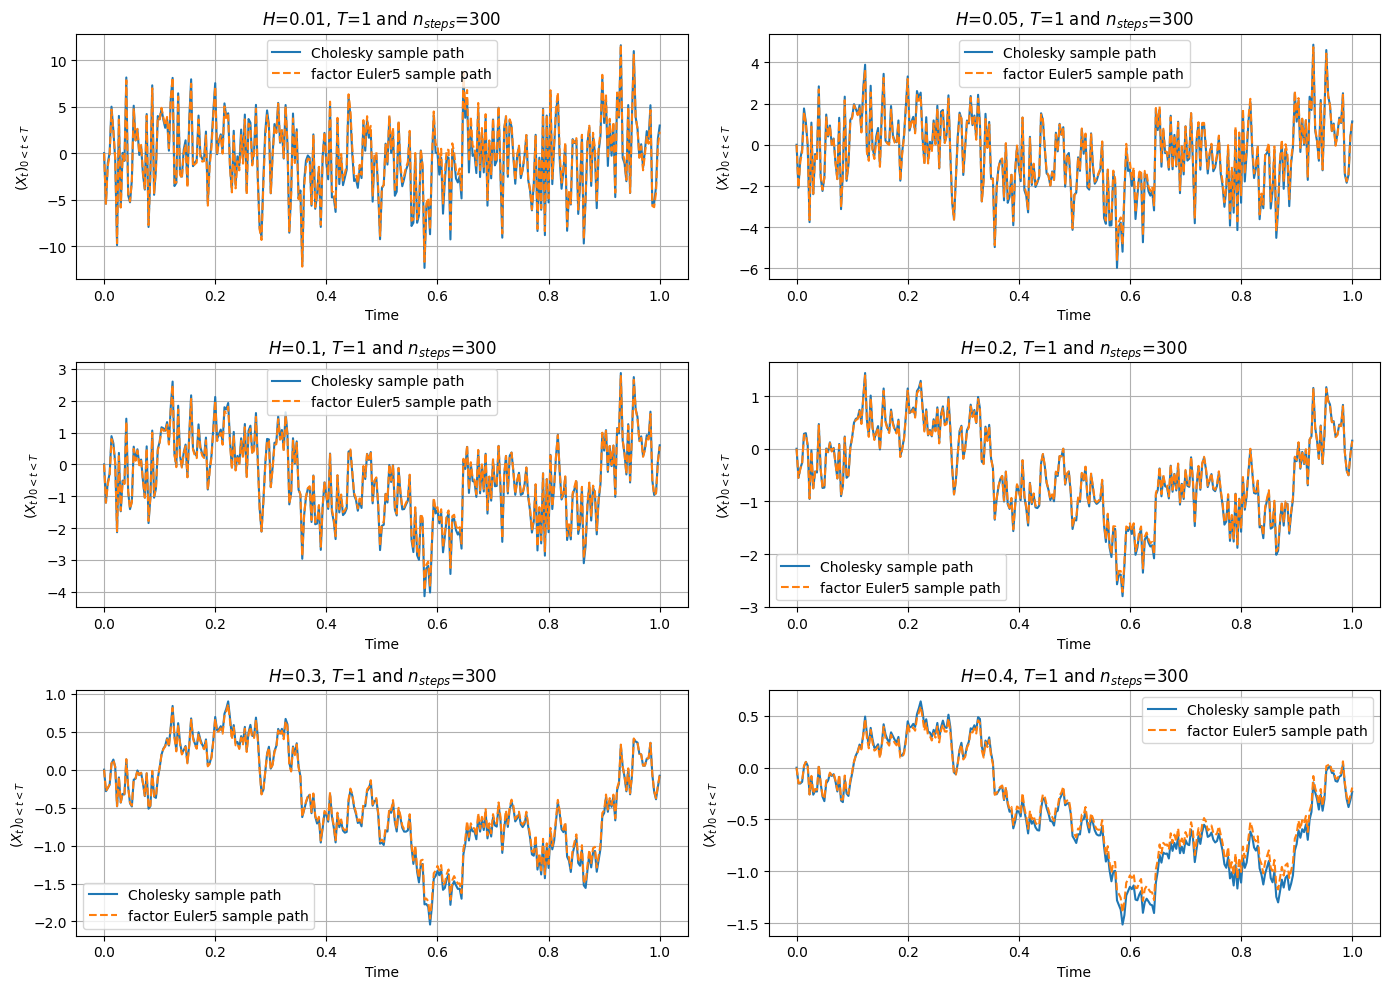

In [36]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
for index, H in enumerate(H_list):
    axs[index // 2][index % 2].plot(
        t,
        cholesky_results[index, :],
        color="tab:blue",
        lw=1.5,
        label="Cholesky sample path",
    )
    axs[index // 2][index % 2].plot(
        t,
        factor_euler5_results[index, :],
        color="tab:orange",
        lw=1.5,
        linestyle="--",
        label="factor Euler5 sample path",
    )
    axs[index // 2][index % 2].set_xlabel("Time")
    axs[index // 2][index % 2].set_ylabel(r"$(X_t)_{0<t<T}$")
    axs[index // 2][index % 2].set_title(
        rf"$H$={H}, $T$={T} and $n_{{steps}}$={n_steps}"
    )
    axs[index // 2][index % 2].grid(True)
    axs[index // 2][index % 2].legend(loc=0)
fig.tight_layout()
plt.show()
plt.close()

In [37]:
M = int(1e3)  # number of monte carlo paths
H_list = [
    0.01,
    0.05,
    0.1,
    0.2,
    0.3,
    0.4,
]
n = 20
# path evaluation
confidence_level = 0.05
cholesky_moment = np.zeros((len(H_list), 2))
factor_euler1_rmse = np.zeros((len(H_list), 2))
factor_euler2_rmse = np.zeros((len(H_list), 2))
factor_euler3_rmse = np.zeros((len(H_list), 2))
factor_euler4_rmse = np.zeros((len(H_list), 2))

for index, H in enumerate(H_list):
    # Sampling
    normal_sample = rng.standard_normal((M, n_steps))
    # Cholesky sampling
    cov = cov_matrix(H, nu, T, n_steps)
    cholesky_sample = cholesky_sampling(normal_sample.T, cov)
    # multi factor parametrization
    optim = minimize(l2_dist_kernels, r_0, args=(n, H, T), method="BFGS")
    r = optim.x
    c, x = factor_parametrization(r, n, H, T)
    # Factor Euler1 Scheme
    increment_size_euler1, exact_increment_size = factor_euler5_increment(
        H, nu, r, n, c, x, T, n_steps, euler_scheme=1
    )
    factor_euler1_sample = v_factor_euler5_sampling(
        normal_sample, increment_size_euler1, exact_increment_size
    )
    # Factor Euler2 Scheme
    increment_size_euler2, exact_increment_size = factor_euler5_increment(
        H, nu, r, n, c, x, T, n_steps, euler_scheme=2
    )
    factor_euler2_sample = v_factor_euler5_sampling(
        normal_sample, increment_size_euler2, exact_increment_size
    )
    # Factor Euler 3 Scheme
    increment_size_euler3, exact_increment_size = factor_euler5_increment(
        H, nu, r, n, c, x, T, n_steps, euler_scheme=3
    )
    factor_euler3_sample = v_factor_euler5_sampling(
        normal_sample, increment_size_euler3, exact_increment_size
    )
    # Factor Euler 4 Scheme
    increment_size_euler4, exact_increment_size = factor_euler5_increment(
        H, nu, r, n, c, x, T, n_steps, euler_scheme=4
    )
    factor_euler4_sample = v_factor_euler5_sampling(
        normal_sample, increment_size_euler4, exact_increment_size
    )

    # Control moment
    cholesky_sample_sup = np.max(cholesky_sample, axis=0)
    cholesky_moment[index, 0] = np.mean(cholesky_sample_sup)
    cholesky_moment[index, 1] = np.sqrt(np.var(cholesky_sample_sup) / M) * sts.t.ppf(
        1 - confidence_level / 2, df=M - 1
    )
    # RMSE over sample paths
    factor_euler1_path_error = np.sqrt(
        np.mean((factor_euler1_sample[:, 1:].T - cholesky_sample[1:, :]) ** 2, axis=0)
    )
    factor_euler2_path_error = np.sqrt(
        np.mean((factor_euler2_sample[:, 1:].T - cholesky_sample[1:, :]) ** 2, axis=0)
    )
    factor_euler3_path_error = np.sqrt(
        np.mean((factor_euler3_sample[:, 1:].T - cholesky_sample[1:, :]) ** 2, axis=0)
    )
    factor_euler4_path_error = np.sqrt(
        np.mean((factor_euler4_sample[:, 1:].T - cholesky_sample[1:, :]) ** 2, axis=0)
    )
    # Monte carlo estimation
    factor_euler1_rmse[index, 0] = np.mean(factor_euler1_path_error)
    factor_euler1_rmse[index, 1] = np.sqrt(
        np.var(factor_euler1_path_error) / M
    ) * sts.t.ppf(1 - confidence_level / 2, df=M - 1)
    # Confidence interval radius
    factor_euler2_rmse[index, 0] = np.mean(factor_euler2_path_error)
    factor_euler2_rmse[index, 1] = np.sqrt(
        np.var(factor_euler2_path_error) / M
    ) * sts.t.ppf(1 - confidence_level / 2, df=M - 1)
    factor_euler3_rmse[index, 0] = np.mean(factor_euler3_path_error)
    factor_euler3_rmse[index, 1] = np.sqrt(
        np.var(factor_euler3_path_error) / M
    ) * sts.t.ppf(1 - confidence_level / 2, df=M - 1)
    factor_euler4_rmse[index, 0] = np.mean(factor_euler4_path_error)
    factor_euler4_rmse[index, 1] = np.sqrt(
        np.var(factor_euler4_path_error) / M
    ) * sts.t.ppf(1 - confidence_level / 2, df=M - 1)

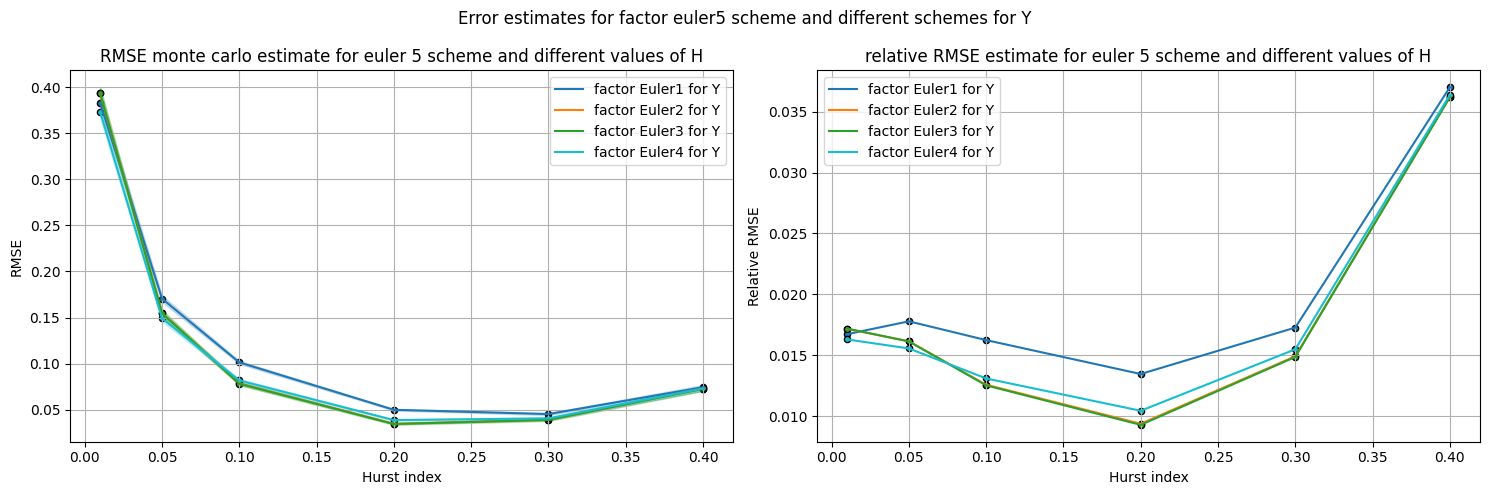

In [38]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
# RMSE plot
ax1.plot(
    H_list,
    factor_euler1_rmse[:, 0],
    lw=1.5,
    color="tab:blue",
    label="factor Euler1 for Y",
)
ax1.scatter(
    H_list, factor_euler1_rmse[:, 0], color="tab:blue", marker="o", edgecolor="k", s=20
)
ax1.fill_between(
    H_list,
    factor_euler1_rmse[:, 0] - factor_euler1_rmse[:, 1],
    factor_euler1_rmse[:, 0] + factor_euler1_rmse[:, 1],
    alpha=0.2,
    color="tab:blue",
)
ax1.plot(
    H_list,
    factor_euler2_rmse[:, 0],
    lw=1.5,
    color="tab:orange",
    label="factor Euler2 for Y",
)
ax1.scatter(
    H_list,
    factor_euler2_rmse[:, 0],
    color="tab:orange",
    marker="o",
    edgecolor="k",
    s=20,
)
ax1.fill_between(
    H_list,
    factor_euler2_rmse[:, 0] - factor_euler2_rmse[:, 1],
    factor_euler2_rmse[:, 0] + factor_euler2_rmse[:, 1],
    alpha=0.2,
    color="tab:green",
)
ax1.plot(
    H_list,
    factor_euler3_rmse[:, 0],
    lw=1.5,
    color="tab:green",
    label="factor Euler3 for Y",
)
ax1.scatter(
    H_list, factor_euler3_rmse[:, 0], color="tab:green", marker="o", edgecolor="k", s=20
)
ax1.fill_between(
    H_list,
    factor_euler3_rmse[:, 0] - factor_euler3_rmse[:, 1],
    factor_euler3_rmse[:, 0] + factor_euler3_rmse[:, 1],
    alpha=0.2,
    color="tab:green",
)
ax1.plot(
    H_list,
    factor_euler4_rmse[:, 0],
    lw=1.5,
    color="tab:cyan",
    label="factor Euler4 for Y",
)
ax1.scatter(
    H_list, factor_euler4_rmse[:, 0], color="tab:cyan", marker="o", edgecolor="k", s=20
)
ax1.fill_between(
    H_list,
    factor_euler4_rmse[:, 0] - factor_euler4_rmse[:, 1],
    factor_euler4_rmse[:, 0] + factor_euler4_rmse[:, 1],
    alpha=0.2,
    color="tab:cyan",
)
ax1.set_xlabel("Hurst index")
ax1.set_ylabel("RMSE")
ax1.set_title("RMSE monte carlo estimate for euler 5 scheme and different values of H")
ax1.grid(True)
ax1.legend(loc=0)
# Relatrive RMSE plot
ax2.plot(
    H_list,
    factor_euler1_rmse[:, 0] / (2 * cholesky_moment[:, 0]),
    lw=1.5,
    color="tab:blue",
    label="factor Euler1 for Y",
)
ax2.scatter(
    H_list,
    factor_euler1_rmse[:, 0] / (2 * cholesky_moment[:, 0]),
    color="tab:blue",
    marker="o",
    edgecolor="k",
    s=20,
)
ax2.plot(
    H_list,
    factor_euler2_rmse[:, 0] / (2 * cholesky_moment[:, 0]),
    lw=1.5,
    color="tab:orange",
    label="factor Euler2 for Y",
)
ax2.scatter(
    H_list,
    factor_euler2_rmse[:, 0] / (2 * cholesky_moment[:, 0]),
    color="tab:orange",
    marker="o",
    edgecolor="k",
    s=20,
)
ax2.plot(
    H_list,
    factor_euler3_rmse[:, 0] / (2 * cholesky_moment[:, 0]),
    lw=1.5,
    color="tab:green",
    label="factor Euler3 for Y",
)
ax2.scatter(
    H_list,
    factor_euler3_rmse[:, 0] / (2 * cholesky_moment[:, 0]),
    color="tab:green",
    marker="o",
    edgecolor="k",
    s=20,
)
ax2.plot(
    H_list,
    factor_euler4_rmse[:, 0] / (2 * cholesky_moment[:, 0]),
    lw=1.5,
    color="tab:cyan",
    label="factor Euler4 for Y",
)
ax2.scatter(
    H_list,
    factor_euler4_rmse[:, 0] / (2 * cholesky_moment[:, 0]),
    color="tab:cyan",
    marker="o",
    edgecolor="k",
    s=20,
)
ax2.set_xlabel("Hurst index")
ax2.set_ylabel("Relative RMSE")
ax2.set_title("relative RMSE estimate for euler 5 scheme and different values of H")
ax2.grid(True)
ax2.legend(loc=0)
plt.suptitle("Error estimates for factor euler5 scheme and different schemes for Y")
fig.tight_layout()
plt.savefig("factor euler5 rmse.pdf")
plt.show()
plt.close()

In [39]:
M = int(1e3)  # number of monte carlo paths
H_list = [
    0.01,
    0.05,
    0.1,
    0.2,
    0.3,
    0.4,
]
n_list = [4, 10, 20, 40, 200]
# path evaluation
confidence_level = 0.05
cholesky_moment = np.zeros((len(H_list), len(n_list), 2))
factor_euler1_rmse = np.zeros((len(H_list), len(n_list), 2))
factor_euler2_rmse = np.zeros((len(H_list), len(n_list), 2))
factor_euler3_rmse = np.zeros((len(H_list), len(n_list), 2))
factor_euler4_rmse = np.zeros((len(H_list), len(n_list), 2))

for index, H in enumerate(H_list):
    for j, n in enumerate(n_list):
        # Sampling
        normal_sample = rng.standard_normal((M, n_steps))
        # Cholesky sampling
        cov = cov_matrix(H, nu, T, n_steps)
        cholesky_sample = cholesky_sampling(normal_sample.T, cov)
        # multi factor parametrization
        optim = minimize(l2_dist_kernels, r_0, args=(n, H, T), method="BFGS")
        r = optim.x
        c, x = factor_parametrization(r, n, H, T)
        # Factor Euler 1 Scheme
        increment_size_euler1, exact_increment = factor_euler5_increment(
            H, nu, r, n, c, x, T, n_steps, euler_scheme=1
        )
        factor_euler1_sample = v_factor_euler5_sampling(
            normal_sample, increment_size_euler1, exact_increment
        )
        # Factor Euler 2 Scheme
        increment_size_euler2, exact_increment = factor_euler5_increment(
            H, nu, r, n, c, x, T, n_steps, euler_scheme=2
        )
        factor_euler2_sample = v_factor_euler5_sampling(
            normal_sample, increment_size_euler2, exact_increment
        )
        # Factor Euler 3 Scheme
        increment_size_euler3, exact_increment = factor_euler5_increment(
            H, nu, r, n, c, x, T, n_steps, euler_scheme=3
        )
        factor_euler3_sample = v_factor_euler5_sampling(
            normal_sample, increment_size_euler3, exact_increment
        )
        # Factor Euler 4 Scheme
        increment_size_euler4, exact_increment = factor_euler5_increment(
            H, nu, r, n, c, x, T, n_steps, euler_scheme=4
        )
        factor_euler4_sample = v_factor_euler5_sampling(
            normal_sample, increment_size_euler4, exact_increment
        )

        # Control moment
        cholesky_sample_sup = np.max(cholesky_sample, axis=0)
        cholesky_moment[index, 0] = np.mean(cholesky_sample_sup)
        cholesky_moment[index, 1] = np.sqrt(
            np.var(cholesky_sample_sup) / M
        ) * sts.t.ppf(1 - confidence_level / 2, df=M - 1)
        # RMSE over sample paths
        factor_euler1_path_error = np.sqrt(
            np.mean(
                (factor_euler1_sample[:, 1:].T - cholesky_sample[1:, :]) ** 2, axis=0
            )
        )
        factor_euler2_path_error = np.sqrt(
            np.mean(
                (factor_euler2_sample[:, 1:].T - cholesky_sample[1:, :]) ** 2, axis=0
            )
        )
        factor_euler3_path_error = np.sqrt(
            np.mean(
                (factor_euler3_sample[:, 1:].T - cholesky_sample[1:, :]) ** 2, axis=0
            )
        )
        factor_euler4_path_error = np.sqrt(
            np.mean(
                (factor_euler4_sample[:, 1:].T - cholesky_sample[1:, :]) ** 2, axis=0
            )
        )
        # Monte carlo estimation
        factor_euler1_rmse[index, j, 0] = np.mean(factor_euler1_path_error)
        factor_euler1_rmse[index, j, 1] = np.sqrt(
            np.var(factor_euler1_path_error) / M
        ) * sts.t.ppf(1 - confidence_level / 2, df=M - 1)
        factor_euler2_rmse[index, j, 0] = np.mean(factor_euler2_path_error)
        factor_euler2_rmse[index, j, 1] = np.sqrt(
            np.var(factor_euler2_path_error) / M
        ) * sts.t.ppf(1 - confidence_level / 2, df=M - 1)
        factor_euler3_rmse[index, j, 0] = np.mean(factor_euler3_path_error)
        factor_euler3_rmse[index, j, 1] = np.sqrt(
            np.var(factor_euler3_path_error) / M
        ) * sts.t.ppf(1 - confidence_level / 2, df=M - 1)
        factor_euler4_rmse[index, j, 0] = np.mean(factor_euler4_path_error)
        factor_euler4_rmse[index, j, 1] = np.sqrt(
            np.var(factor_euler4_path_error) / M
        ) * sts.t.ppf(1 - confidence_level / 2, df=M - 1)

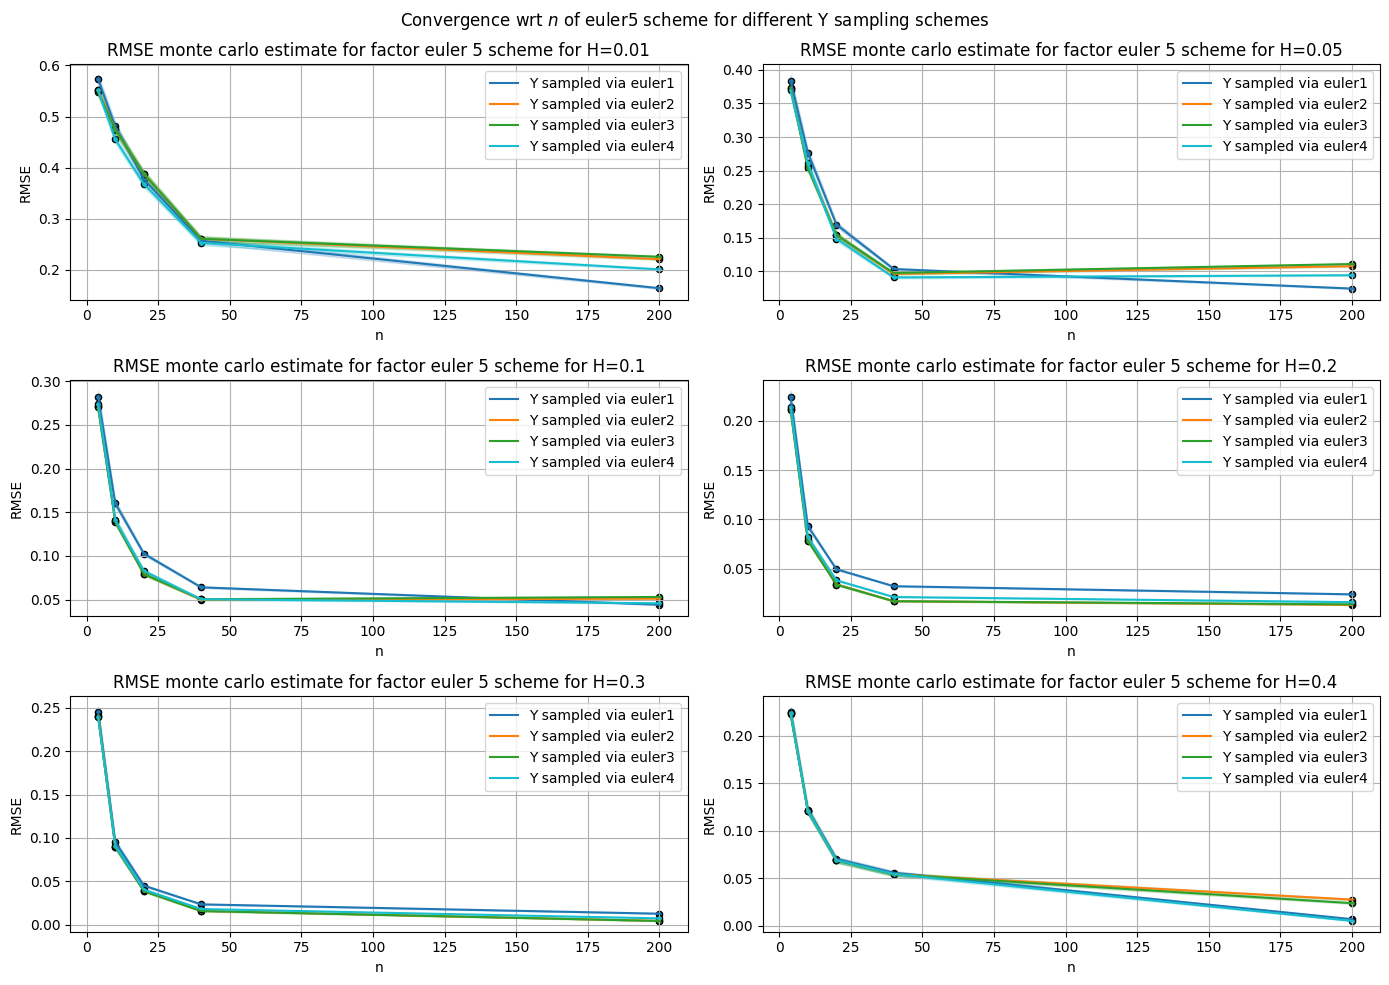

In [40]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
for index, H in enumerate(H_list):
    axs[index // 2][index % 2].plot(
        n_list,
        factor_euler1_rmse[index, :, 0],
        lw=1.5,
        color="tab:blue",
        label="Y sampled via euler1",
    )
    axs[index // 2][index % 2].scatter(
        n_list,
        factor_euler1_rmse[index, :, 0],
        color="tab:blue",
        marker="o",
        edgecolor="k",
        s=20,
    )
    axs[index // 2][index % 2].fill_between(
        n_list,
        factor_euler1_rmse[index, :, 0] - factor_euler1_rmse[index, :, 1],
        factor_euler1_rmse[index, :, 0] + factor_euler1_rmse[index, :, 1],
        alpha=0.2,
        color="tab:blue",
    )
    axs[index // 2][index % 2].plot(
        n_list,
        factor_euler2_rmse[index, :, 0],
        lw=1.5,
        color="tab:orange",
        label="Y sampled via euler2",
    )
    axs[index // 2][index % 2].scatter(
        n_list,
        factor_euler2_rmse[index, :, 0],
        color="tab:orange",
        marker="o",
        edgecolor="k",
        s=20,
    )
    axs[index // 2][index % 2].fill_between(
        n_list,
        factor_euler2_rmse[index, :, 0] - factor_euler2_rmse[index, :, 1],
        factor_euler2_rmse[index, :, 0] + factor_euler2_rmse[index, :, 1],
        alpha=0.2,
        color="tab:green",
    )
    axs[index // 2][index % 2].plot(
        n_list,
        factor_euler3_rmse[index, :, 0],
        lw=1.5,
        color="tab:green",
        label="Y sampled via euler3",
    )
    axs[index // 2][index % 2].scatter(
        n_list,
        factor_euler3_rmse[index, :, 0],
        color="tab:green",
        marker="o",
        edgecolor="k",
        s=20,
    )
    axs[index // 2][index % 2].fill_between(
        n_list,
        factor_euler3_rmse[index, :, 0] - factor_euler3_rmse[index, :, 1],
        factor_euler3_rmse[index, :, 0] + factor_euler3_rmse[index, :, 1],
        alpha=0.2,
        color="tab:green",
    )
    axs[index // 2][index % 2].plot(
        n_list,
        factor_euler4_rmse[index, :, 0],
        lw=1.5,
        color="tab:cyan",
        label="Y sampled via euler4",
    )
    axs[index // 2][index % 2].scatter(
        n_list,
        factor_euler4_rmse[index, :, 0],
        color="tab:cyan",
        marker="o",
        edgecolor="k",
        s=20,
    )
    axs[index // 2][index % 2].fill_between(
        n_list,
        factor_euler4_rmse[index, :, 0] - factor_euler4_rmse[index, :, 1],
        factor_euler4_rmse[index, :, 0] + factor_euler4_rmse[index, :, 1],
        alpha=0.2,
        color="tab:cyan",
    )
    axs[index // 2][index % 2].set_xlabel("n")
    axs[index // 2][index % 2].set_ylabel("RMSE")
    axs[index // 2][index % 2].set_title(
        f"RMSE monte carlo estimate for factor euler 5 scheme for H={H}"
    )
    axs[index // 2][index % 2].grid(True)
    axs[index // 2][index % 2].legend(loc=0)
fig.suptitle(r"Convergence wrt $n$ of euler5 scheme for different Y sampling schemes")
fig.tight_layout()
plt.savefig("Factor5 scheme error wrt n.pdf")
plt.show()
plt.close()

In [41]:
M = int(1e3)  # number of monte carlo paths
H_list = [
    0.01,
    0.05,
    0.1,
    0.2,
    0.3,
    0.4,
]
n = 20
# path evaluation
confidence_level = 0.05
cholesky_moment = np.zeros((len(H_list), 2))
factor_euler1_rmse = np.zeros((len(H_list), 2))
factor_euler2_rmse = np.zeros((len(H_list), 2))
factor_euler3_rmse = np.zeros((len(H_list), 2))
factor_euler4_rmse = np.zeros((len(H_list), 2))
factor_euler5_rmse = np.zeros((len(H_list), 2))

for index, H in enumerate(H_list):
    # Sampling
    normal_sample = rng.standard_normal((M, n_steps))
    # Cholesky sampling
    cov = cov_matrix(H, nu, T, n_steps)
    cholesky_sample = cholesky_sampling(normal_sample.T, cov)
    # multi factor parametrization
    optim = minimize(l2_dist_kernels, r_0, args=(n, H, T), method="BFGS")
    r = optim.x
    c, x = factor_parametrization(r, n, H, T)
    # Factor Euler1 Scheme
    increment_size_euler1 = factor_euler1_increment(H, nu, r, n, c, x, T, n_steps)
    factor_euler1_sample = v_factor_euler_sampling(normal_sample, increment_size_euler1)
    # Factor Euler2 Scheme
    increment_size_euler2 = factor_euler2_increment(H, nu, r, n, c, x, T, n_steps)
    factor_euler2_sample = v_factor_euler_sampling(normal_sample, increment_size_euler2)
    # Factor Euler 3 Scheme
    increment_size_euler3 = factor_euler3_increment(H, nu, r, n, c, x, T, n_steps)
    factor_euler3_sample = v_factor_euler_sampling(normal_sample, increment_size_euler3)
    # Factor Euler 4 Scheme
    increment_size_euler4 = factor_euler4_increment(H, nu, r, n, c, x, T, n_steps)
    factor_euler4_sample = v_factor_euler_sampling(normal_sample, increment_size_euler4)
    # Factor Euler 5 Scheme
    increment_size_euler5, exact_increment_size = factor_euler5_increment(
        H, nu, r, n, c, x, T, n_steps, euler_scheme=3
    )
    factor_euler5_sample = v_factor_euler5_sampling(
        normal_sample, increment_size_euler5, exact_increment_size
    )

    # Control moment
    cholesky_sample_sup = np.max(cholesky_sample, axis=0)
    cholesky_moment[index, 0] = np.mean(cholesky_sample_sup)
    cholesky_moment[index, 1] = np.sqrt(np.var(cholesky_sample_sup) / M) * sts.t.ppf(
        1 - confidence_level / 2, df=M - 1
    )
    # RMSE over sample paths
    factor_euler1_path_error = np.sqrt(
        np.mean((factor_euler1_sample[:, 1:].T - cholesky_sample[1:, :]) ** 2, axis=0)
    )
    factor_euler2_path_error = np.sqrt(
        np.mean((factor_euler2_sample[:, 1:].T - cholesky_sample[1:, :]) ** 2, axis=0)
    )
    factor_euler3_path_error = np.sqrt(
        np.mean((factor_euler3_sample[:, 1:].T - cholesky_sample[1:, :]) ** 2, axis=0)
    )
    factor_euler4_path_error = np.sqrt(
        np.mean((factor_euler4_sample[:, 1:].T - cholesky_sample[1:, :]) ** 2, axis=0)
    )
    factor_euler5_path_error = np.sqrt(
        np.mean((factor_euler5_sample[:, 1:].T - cholesky_sample[1:, :]) ** 2, axis=0)
    )
    # Monte carlo estimation
    factor_euler1_rmse[index, 0] = np.mean(factor_euler1_path_error)
    factor_euler1_rmse[index, 1] = np.sqrt(
        np.var(factor_euler1_path_error) / M
    ) * sts.t.ppf(1 - confidence_level / 2, df=M - 1)
    # Confidence interval radius
    factor_euler2_rmse[index, 0] = np.mean(factor_euler2_path_error)
    factor_euler2_rmse[index, 1] = np.sqrt(
        np.var(factor_euler2_path_error) / M
    ) * sts.t.ppf(1 - confidence_level / 2, df=M - 1)
    factor_euler3_rmse[index, 0] = np.mean(factor_euler3_path_error)
    factor_euler3_rmse[index, 1] = np.sqrt(
        np.var(factor_euler3_path_error) / M
    ) * sts.t.ppf(1 - confidence_level / 2, df=M - 1)
    factor_euler4_rmse[index, 0] = np.mean(factor_euler4_path_error)
    factor_euler4_rmse[index, 1] = np.sqrt(
        np.var(factor_euler4_path_error) / M
    ) * sts.t.ppf(1 - confidence_level / 2, df=M - 1)
    factor_euler5_rmse[index, 0] = np.mean(factor_euler5_path_error)
    factor_euler5_rmse[index, 1] = np.sqrt(
        np.var(factor_euler5_path_error) / M
    ) * sts.t.ppf(1 - confidence_level / 2, df=M - 1)

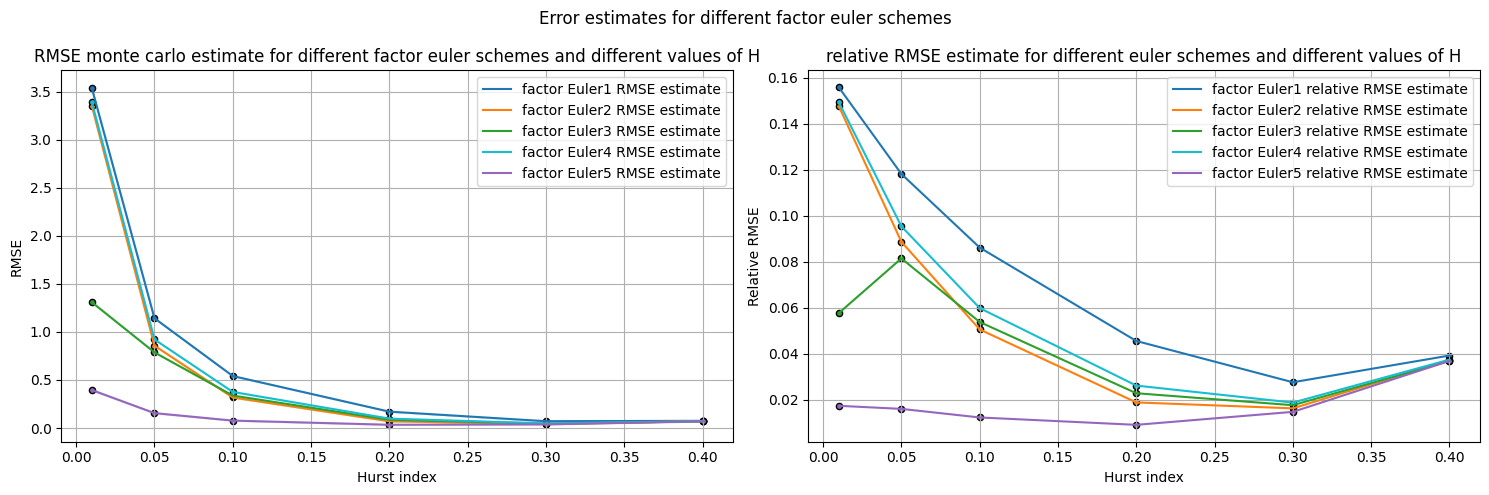

In [42]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
# RMSE plot
ax1.plot(
    H_list,
    factor_euler1_rmse[:, 0],
    lw=1.5,
    color="tab:blue",
    label="factor Euler1 RMSE estimate",
)
ax1.scatter(
    H_list, factor_euler1_rmse[:, 0], color="tab:blue", marker="o", edgecolor="k", s=20
)
ax1.fill_between(
    H_list,
    factor_euler1_rmse[:, 0] - factor_euler1_rmse[:, 1],
    factor_euler1_rmse[:, 0] + factor_euler1_rmse[:, 1],
    alpha=0.2,
    color="tab:blue",
)
ax1.plot(
    H_list,
    factor_euler2_rmse[:, 0],
    lw=1.5,
    color="tab:orange",
    label="factor Euler2 RMSE estimate",
)
ax1.scatter(
    H_list,
    factor_euler2_rmse[:, 0],
    color="tab:orange",
    marker="o",
    edgecolor="k",
    s=20,
)
ax1.fill_between(
    H_list,
    factor_euler2_rmse[:, 0] - factor_euler2_rmse[:, 1],
    factor_euler2_rmse[:, 0] + factor_euler2_rmse[:, 1],
    alpha=0.2,
    color="tab:green",
)
ax1.plot(
    H_list,
    factor_euler3_rmse[:, 0],
    lw=1.5,
    color="tab:green",
    label="factor Euler3 RMSE estimate",
)
ax1.scatter(
    H_list, factor_euler3_rmse[:, 0], color="tab:green", marker="o", edgecolor="k", s=20
)
ax1.fill_between(
    H_list,
    factor_euler3_rmse[:, 0] - factor_euler3_rmse[:, 1],
    factor_euler3_rmse[:, 0] + factor_euler3_rmse[:, 1],
    alpha=0.2,
    color="tab:green",
)
ax1.plot(
    H_list,
    factor_euler4_rmse[:, 0],
    lw=1.5,
    color="tab:cyan",
    label="factor Euler4 RMSE estimate",
)
ax1.scatter(
    H_list, factor_euler4_rmse[:, 0], color="tab:cyan", marker="o", edgecolor="k", s=20
)
ax1.fill_between(
    H_list,
    factor_euler4_rmse[:, 0] - factor_euler4_rmse[:, 1],
    factor_euler4_rmse[:, 0] + factor_euler4_rmse[:, 1],
    alpha=0.2,
    color="tab:cyan",
)
ax1.plot(
    H_list,
    factor_euler5_rmse[:, 0],
    lw=1.5,
    color="tab:purple",
    label="factor Euler5 RMSE estimate",
)
ax1.scatter(
    H_list,
    factor_euler5_rmse[:, 0],
    color="tab:purple",
    marker="o",
    edgecolor="k",
    s=20,
)
ax1.fill_between(
    H_list,
    factor_euler5_rmse[:, 0] - factor_euler5_rmse[:, 1],
    factor_euler5_rmse[:, 0] + factor_euler5_rmse[:, 1],
    alpha=0.2,
    color="tab:purple",
)
ax1.set_xlabel("Hurst index")
ax1.set_ylabel("RMSE")
ax1.set_title(
    "RMSE monte carlo estimate for different factor euler schemes and different values of H"
)
ax1.grid(True)
ax1.legend(loc=0)
# Relatrive RMSE plot
ax2.plot(
    H_list,
    factor_euler1_rmse[:, 0] / (2 * cholesky_moment[:, 0]),
    lw=1.5,
    color="tab:blue",
    label="factor Euler1 relative RMSE estimate",
)
ax2.scatter(
    H_list,
    factor_euler1_rmse[:, 0] / (2 * cholesky_moment[:, 0]),
    color="tab:blue",
    marker="o",
    edgecolor="k",
    s=20,
)
ax2.plot(
    H_list,
    factor_euler2_rmse[:, 0] / (2 * cholesky_moment[:, 0]),
    lw=1.5,
    color="tab:orange",
    label="factor Euler2 relative RMSE estimate",
)
ax2.scatter(
    H_list,
    factor_euler2_rmse[:, 0] / (2 * cholesky_moment[:, 0]),
    color="tab:orange",
    marker="o",
    edgecolor="k",
    s=20,
)
ax2.plot(
    H_list,
    factor_euler3_rmse[:, 0] / (2 * cholesky_moment[:, 0]),
    lw=1.5,
    color="tab:green",
    label="factor Euler3 relative RMSE estimate",
)
ax2.scatter(
    H_list,
    factor_euler3_rmse[:, 0] / (2 * cholesky_moment[:, 0]),
    color="tab:green",
    marker="o",
    edgecolor="k",
    s=20,
)
ax2.plot(
    H_list,
    factor_euler4_rmse[:, 0] / (2 * cholesky_moment[:, 0]),
    lw=1.5,
    color="tab:cyan",
    label="factor Euler4 relative RMSE estimate",
)
ax2.scatter(
    H_list,
    factor_euler4_rmse[:, 0] / (2 * cholesky_moment[:, 0]),
    color="tab:cyan",
    marker="o",
    edgecolor="k",
    s=20,
)
ax2.plot(
    H_list,
    factor_euler5_rmse[:, 0] / (2 * cholesky_moment[:, 0]),
    lw=1.5,
    color="tab:purple",
    label="factor Euler5 relative RMSE estimate",
)
ax2.scatter(
    H_list,
    factor_euler5_rmse[:, 0] / (2 * cholesky_moment[:, 0]),
    color="tab:purple",
    marker="o",
    edgecolor="k",
    s=20,
)
ax2.set_xlabel("Hurst index")
ax2.set_ylabel("Relative RMSE")
ax2.set_title(
    "relative RMSE estimate for different euler schemes and different values of H"
)
ax2.grid(True)
ax2.legend(loc=0)
fig.suptitle("Error estimates for different factor euler schemes")
fig.tight_layout()
plt.show()
plt.close()

## 3.2 Multifactor exact simulation with Cholesky

$$ X_t \approx X_0 + \nu \sum_{k=1}^n  c_k Y^{k}_t$$
with $$  Y^k_t = \int_0^t e^{-x_k(t-s)}dW_s$$
$$  Y^k_{t_i} = e^{-x_k h} Y^k_t + \xi_i^k , \quad \xi_i^k = \int_{t_{i-1}}^{t_i}e^{-x_k(t_i-s)}dW_s$$ 
We will use exact approximation using Cholseky to simulate $(\xi_i^1, \ldots, \xi_i^n)^\top \sim \mathcal N(0, \Sigma)$ with 
$$ \Sigma_{kl} = \int_{t_i}^{t_{i+1}} e^{-(x_k + x_l) (t_{i+1}-s)} ds = \frac{1-e^{-(x_k+x_l)dt}}{x_k + x_l} $$
For each $t_i$ generate $Z_i = (Z_i^1, \ldots, Z_i^n)^\top$ independant standard Gaussian and set 
$$ \xi_i = L Z_i \quad \mbox{with } LL^\top \Sigma.$$
Set 
$$ E_{dt} = \exp( - \mbox{diag}(x_1, \ldots, x_n )dt  )  $$
Then, $$X_{t_{i+1}} = X_0 + \nu*c^\top E_{dt} Y_{t_i} +  \nu* c^\top L Z_i =  X_0 + \nu*c^\top E_{dt} Y_{t_i} + \nu*\sqrt{c^\top \Sigma c} U_i $$
with 
$$  U_i := \frac{ c^\top L Z_i }{ \sqrt{c^\top \Sigma c} } \sim \mathcal N(0,1)$$

$\textbf{Q:}$ What is the difference and main advantage of such method compared to Cholesky of part 1?

The main advantage of this method is that we do not have to compute the cholesky transform the covariance matrix. We also know that :
$$Y_{t_i}^k = \sum_{l=1}^i e^{-x_k(i-l)dt}\xi_l^k $$
We can thus write :
$$\begin{aligned}X_{t_i} &= \nu\sum_{k=1}^nc_k Y_{t_i}^k \\&= \nu\sum_{l=1}^i\sum_{k=1}^n c_k e^{-x_k(i-l)dt}\xi_l^k \\&= \nu\sum_{l=1}^i \tilde{c}_{i-l}^\top\xi_l\\&=\nu\sum_{l=1}^i\tilde{c}_{i-l}^\top L Z_l\\X_{t_i}&=\nu\sum_{l=1}^i\sqrt{\tilde{c}_{i-l}^\top \Sigma \tilde{c}_{i-l}}U_l\quad,\;\;U_l\sim \mathcal N(0,1)\;\mbox{i.i.d}\end{aligned}$$
In actuality we cut some corners since : 
$$X_{t_i} = \nu\sum_{l=1}^i\sqrt{\tilde{c}_{i-l}^\top \Sigma \tilde{c}_{i-l}}\underbrace{\frac{\tilde{c}_{i-l}^TLZ_l}{\sqrt{\tilde{c}_{i-l}^\top \Sigma \tilde{c}_{i-l}}}}_{= U^{i-l}_l}$$
We can get away with this "approximation" since $U_l$ and $U^{i-l}_l$ are very correlated but in reality we need more i.i.d N(0,1) random variables to sample the real covariance between all terms since:
$$(U^k_l)_{1\leqslant k\leqslant n_{steps}-1} | U_l \sim \mathcal N\left(\left(\frac{{\tilde{c}_k}^\top\Sigma c}{\sqrt{{\tilde{c}_k}^\top\Sigma \tilde{c}_k}\sqrt{c^T \Sigma c}}U_l\right)_{1\leqslant k\leqslant n_{steps}-1}, \left(\frac{{\tilde{c}_i}^\top\Sigma \tilde{c}_j}{\sqrt{{\tilde{c}_i}^\top\Sigma \tilde{c}_i}\sqrt{{\tilde{c}_j}^\top\Sigma \tilde{c}_j}} - \frac{{\tilde{c}_i}^\top\Sigma c\times{\tilde{c}_j}^\top\Sigma c}{\sqrt{{\tilde{c}_i}^\top\Sigma \tilde{c}_i}\sqrt{{\tilde{c}_j}^\top\Sigma \tilde{c}_j}c^\top \Sigma c}\right)_{1\leqslant i, j\leqslant n_{steps}-1}\right)$$ 
A better approximation would thus be :
$$X_{t_i} = \nu\sum_{l=1}^i\frac{\tilde{c}_{i-l}^\top \Sigma c}{\sqrt{c^\top \Sigma c}}U_l$$
This approximation is necessary to have a result that is coherent and comparable to the previous schemes i.e: without the need to sample more than $n_{steps}$ i.i.d $\mathcal N (0, 1)$.

In [43]:
def factor_cov(c: np.ndarray, x: np.ndarray, T: float, n_steps: float) -> np.ndarray:
    """Variance covariance matrix of multifactor approximation of Riemann-Liouville process
    Args:
        - c: factor parametrization c parameter
        - x: factor parametrization x parameter
        - T: time horizon
        - n_steps: number of time steps
    Returns:
        - np.ndarray: cholesky transform of variance covariance matrix
    """
    dt = T / n_steps
    X = x.reshape((-1, 1)) + x.reshape((1, -1))
    cov = (1 - np.exp(-X * dt)) / X
    c_tilde = c * np.exp(-dt * x * np.arange(n_steps).reshape((-1, 1)))
    const = c @ cov @ c.T
    return nu * (c_tilde @ cov @ c.T) / np.sqrt(const)


def factor_cholesky_sampling(normal_sample: np.ndarray, cov: np.ndarray) -> np.ndarray:
    return np.concatenate(
        (np.zeros(1), np.convolve(normal_sample, cov)[: len(normal_sample)])
    )


v_factor_cholesky_sampling = np.vectorize(
    factor_cholesky_sampling, signature="(n), (n) -> (m)"
)

In [44]:
nu = 1
T = 1
n_steps = 300
n = 20
H_list = [
    0.01,
    0.05,
    0.1,
    0.2,
    0.3,
    0.4,
]
normal_sample = rng.standard_normal(n_steps)
cholesky_results = np.zeros((len(H_list), n_steps + 1))
factor_cholesky_results = np.zeros((len(H_list), n_steps + 1))
for index, H in enumerate(H_list):
    cov = cov_matrix(H, nu, T, n_steps)
    cholesky_results[index, :] = cholesky_sampling(normal_sample, cov)
    optim = minimize(l2_dist_kernels, r_0, args=(n, H, T), method="BFGS")
    r = optim.x
    c, x = factor_parametrization(r, n, H, T)
    cov = factor_cov(c, x, T, n_steps)
    factor_cholesky_results[index, :] = factor_cholesky_sampling(normal_sample, cov)

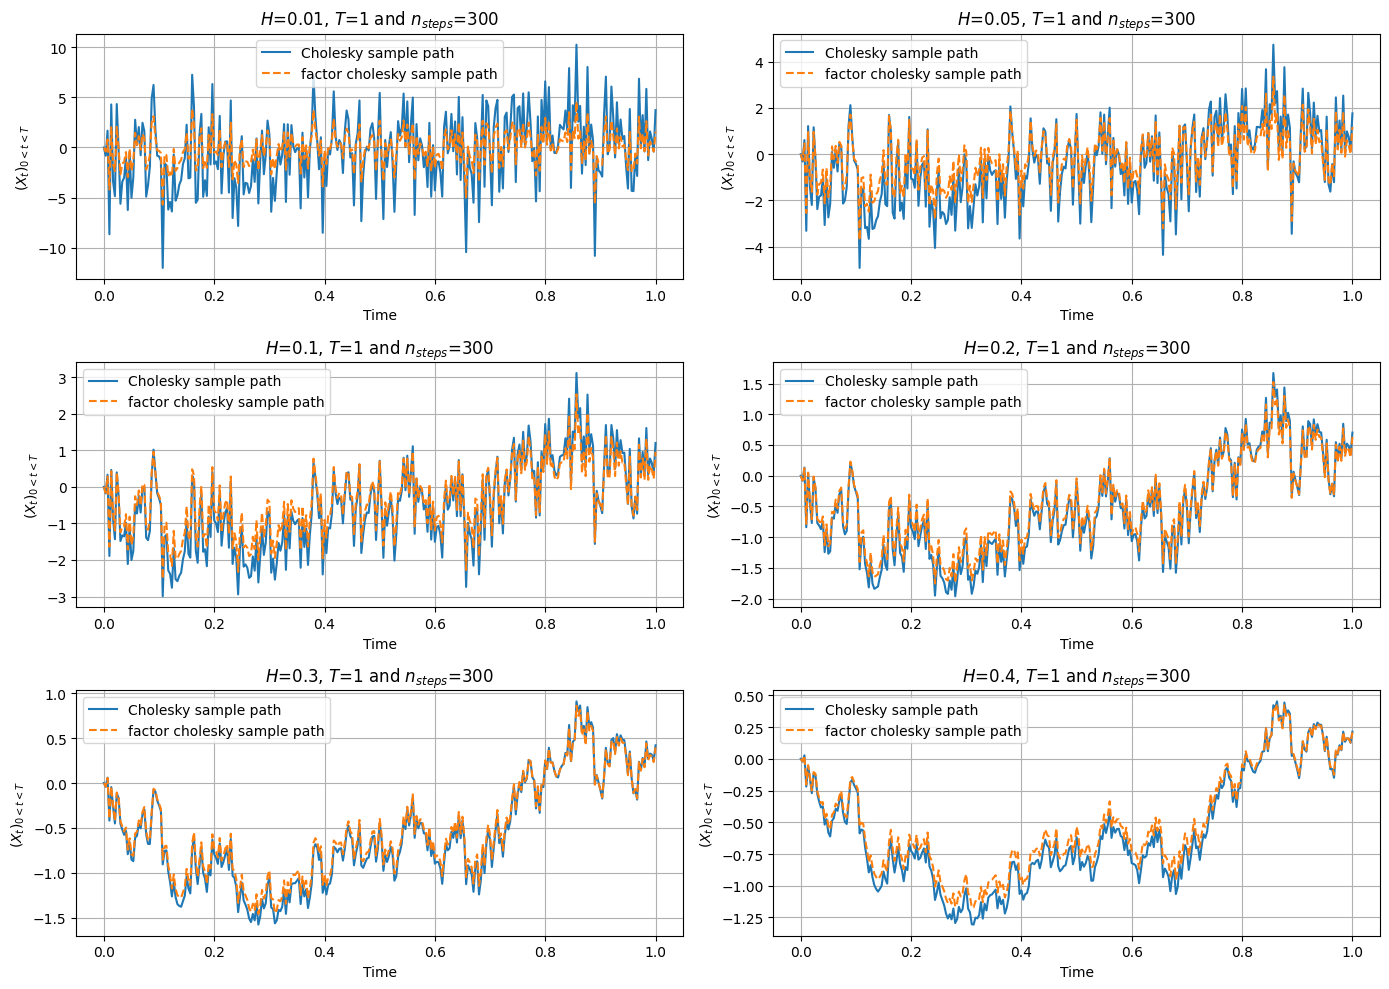

In [45]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
for index, H in enumerate(H_list):
    axs[index // 2][index % 2].plot(
        t,
        cholesky_results[index, :],
        color="tab:blue",
        lw=1.5,
        label="Cholesky sample path",
    )
    axs[index // 2][index % 2].plot(
        t,
        factor_cholesky_results[index, :],
        color="tab:orange",
        lw=1.5,
        linestyle="--",
        label="factor cholesky sample path",
    )
    axs[index // 2][index % 2].set_xlabel("Time")
    axs[index // 2][index % 2].set_ylabel(r"$(X_t)_{0<t<T}$")
    axs[index // 2][index % 2].set_title(
        rf"$H$={H}, $T$={T} and $n_{{steps}}$={n_steps}"
    )
    axs[index // 2][index % 2].grid(True)
    axs[index // 2][index % 2].legend(loc=0)
fig.tight_layout()
plt.show()
plt.close()

In [46]:
M = int(1e3)  # number of monte carlo paths
H_list = [
    0.01,
    0.05,
    0.1,
    0.2,
    0.3,
    0.4,
]
n = 40
# path evaluation
confidence_level = 0.05
cholesky_moment = np.zeros((len(H_list), 2))
factor_euler1_rmse = np.zeros((len(H_list), 2))
factor_euler2_rmse = np.zeros((len(H_list), 2))
factor_euler3_rmse = np.zeros((len(H_list), 2))
factor_euler4_rmse = np.zeros((len(H_list), 2))
factor_euler5_rmse = np.zeros((len(H_list), 2))
factor_cholesky_rmse = np.zeros(((len(H_list), 2)))

for index, H in enumerate(H_list):
    # Sampling
    normal_sample = rng.standard_normal((M, n_steps))
    # Cholesky sampling
    cov = cov_matrix(H, nu, T, n_steps)
    cholesky_sample = cholesky_sampling(normal_sample.T, cov)
    # multi factor parametrization
    optim = minimize(l2_dist_kernels, r_0, args=(n, H, T), method="BFGS")
    r = optim.x
    c, x = factor_parametrization(r, n, H, T)
    # Factor Euler1 Scheme
    increment_size_euler1 = factor_euler1_increment(H, nu, r, n, c, x, T, n_steps)
    factor_euler1_sample = v_factor_euler_sampling(normal_sample, increment_size_euler1)
    # Factor Euler2 Scheme
    increment_size_euler2 = factor_euler2_increment(H, nu, r, n, c, x, T, n_steps)
    factor_euler2_sample = v_factor_euler_sampling(normal_sample, increment_size_euler2)
    # Factor Euler 3 Scheme
    increment_size_euler3 = factor_euler3_increment(H, nu, r, n, c, x, T, n_steps)
    factor_euler3_sample = v_factor_euler_sampling(normal_sample, increment_size_euler3)
    # Factor Euler 4 Scheme
    increment_size_euler4 = factor_euler4_increment(H, nu, r, n, c, x, T, n_steps)
    factor_euler4_sample = v_factor_euler_sampling(normal_sample, increment_size_euler4)
    # Factor Euler 5 Scheme
    increment_size_euler5, exact_increment = factor_euler5_increment(
        H, nu, r, n, c, x, T, n_steps, euler_scheme=3
    )
    factor_euler5_sample = v_factor_euler5_sampling(
        normal_sample, increment_size_euler5, exact_increment
    )
    # Factor cholesky scheme
    cov = factor_cov(c, x, T, n_steps)
    factor_cholesky_sample = v_factor_cholesky_sampling(normal_sample, cov)

    # Control moment
    cholesky_sample_sup = np.max(cholesky_sample, axis=0)
    cholesky_moment[index, 0] = np.mean(cholesky_sample_sup)
    cholesky_moment[index, 1] = np.sqrt(np.var(cholesky_sample_sup) / M) * sts.t.ppf(
        1 - confidence_level / 2, df=M - 1
    )
    # RMSE over sample paths
    factor_euler1_path_error = np.sqrt(
        np.mean((factor_euler1_sample[:, 1:].T - cholesky_sample[1:, :]) ** 2, axis=0)
    )
    factor_euler2_path_error = np.sqrt(
        np.mean((factor_euler2_sample[:, 1:].T - cholesky_sample[1:, :]) ** 2, axis=0)
    )
    factor_euler3_path_error = np.sqrt(
        np.mean((factor_euler3_sample[:, 1:].T - cholesky_sample[1:, :]) ** 2, axis=0)
    )
    factor_euler4_path_error = np.sqrt(
        np.mean((factor_euler4_sample[:, 1:].T - cholesky_sample[1:, :]) ** 2, axis=0)
    )
    factor_euler5_path_error = np.sqrt(
        np.mean((factor_euler5_sample[:, 1:].T - cholesky_sample[1:, :]) ** 2, axis=0)
    )
    factor_cholesky_path_error = np.sqrt(
        np.mean((factor_cholesky_sample[:, 1:].T - cholesky_sample[1:, :]) ** 2, axis=0)
    )
    # Monte carlo estimation
    factor_euler1_rmse[index, 0] = np.mean(factor_euler1_path_error)
    factor_euler1_rmse[index, 1] = np.sqrt(
        np.var(factor_euler1_path_error) / M
    ) * sts.t.ppf(1 - confidence_level / 2, df=M - 1)
    factor_euler2_rmse[index, 0] = np.mean(factor_euler2_path_error)
    factor_euler2_rmse[index, 1] = np.sqrt(
        np.var(factor_euler2_path_error) / M
    ) * sts.t.ppf(1 - confidence_level / 2, df=M - 1)
    factor_euler3_rmse[index, 0] = np.mean(factor_euler3_path_error)
    factor_euler3_rmse[index, 1] = np.sqrt(
        np.var(factor_euler3_path_error) / M
    ) * sts.t.ppf(1 - confidence_level / 2, df=M - 1)
    factor_euler4_rmse[index, 0] = np.mean(factor_euler4_path_error)
    factor_euler4_rmse[index, 1] = np.sqrt(
        np.var(factor_euler4_path_error) / M
    ) * sts.t.ppf(1 - confidence_level / 2, df=M - 1)
    factor_euler5_rmse[index, 0] = np.mean(factor_euler5_path_error)
    factor_euler5_rmse[index, 1] = np.sqrt(
        np.var(factor_euler5_path_error) / M
    ) * sts.t.ppf(1 - confidence_level / 2, df=M - 1)
    factor_cholesky_rmse[index, 0] = np.mean(factor_cholesky_path_error)
    factor_cholesky_rmse[index, 1] = np.sqrt(
        np.var(factor_cholesky_path_error) / M
    ) * sts.t.ppf(1 - confidence_level / 2, df=M - 1)

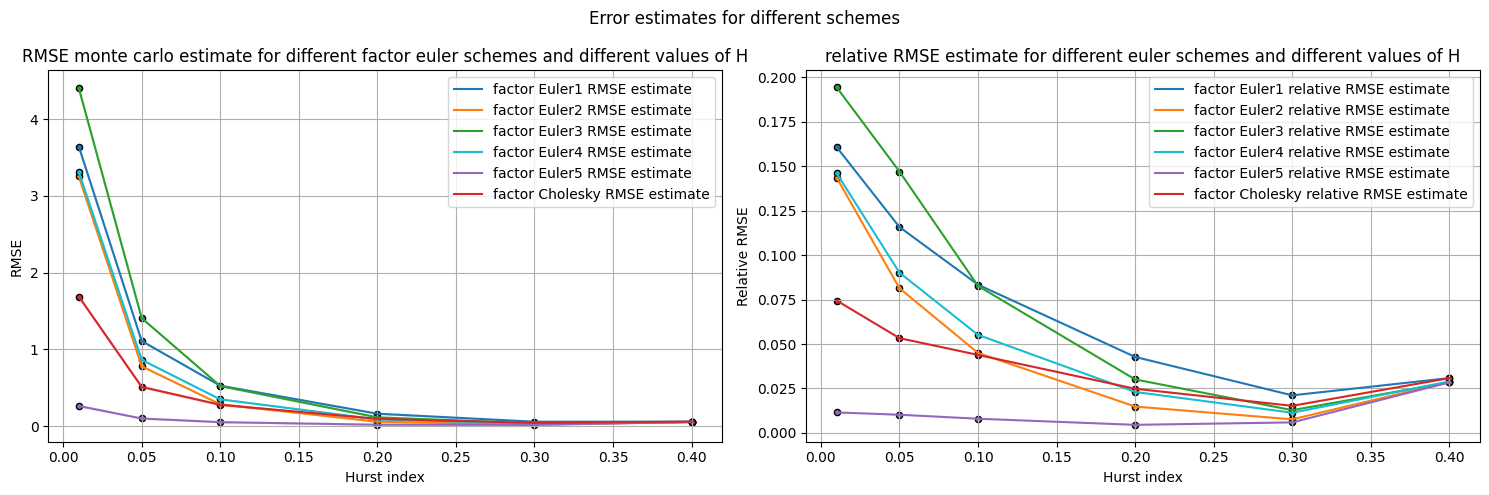

In [47]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
# RMSE plot
ax1.plot(
    H_list,
    factor_euler1_rmse[:, 0],
    lw=1.5,
    color="tab:blue",
    label="factor Euler1 RMSE estimate",
)
ax1.scatter(
    H_list, factor_euler1_rmse[:, 0], color="tab:blue", marker="o", edgecolor="k", s=20
)
ax1.fill_between(
    H_list,
    factor_euler1_rmse[:, 0] - factor_euler1_rmse[:, 1],
    factor_euler1_rmse[:, 0] + factor_euler1_rmse[:, 1],
    alpha=0.2,
    color="tab:blue",
)
ax1.plot(
    H_list,
    factor_euler2_rmse[:, 0],
    lw=1.5,
    color="tab:orange",
    label="factor Euler2 RMSE estimate",
)
ax1.scatter(
    H_list,
    factor_euler2_rmse[:, 0],
    color="tab:orange",
    marker="o",
    edgecolor="k",
    s=20,
)
ax1.fill_between(
    H_list,
    factor_euler2_rmse[:, 0] - factor_euler2_rmse[:, 1],
    factor_euler2_rmse[:, 0] + factor_euler2_rmse[:, 1],
    alpha=0.2,
    color="tab:green",
)
ax1.plot(
    H_list,
    factor_euler3_rmse[:, 0],
    lw=1.5,
    color="tab:green",
    label="factor Euler3 RMSE estimate",
)
ax1.scatter(
    H_list, factor_euler3_rmse[:, 0], color="tab:green", marker="o", edgecolor="k", s=20
)
ax1.fill_between(
    H_list,
    factor_euler3_rmse[:, 0] - factor_euler3_rmse[:, 1],
    factor_euler3_rmse[:, 0] + factor_euler3_rmse[:, 1],
    alpha=0.2,
    color="tab:green",
)
ax1.plot(
    H_list,
    factor_euler4_rmse[:, 0],
    lw=1.5,
    color="tab:cyan",
    label="factor Euler4 RMSE estimate",
)
ax1.scatter(
    H_list, factor_euler4_rmse[:, 0], color="tab:cyan", marker="o", edgecolor="k", s=20
)
ax1.fill_between(
    H_list,
    factor_euler4_rmse[:, 0] - factor_euler4_rmse[:, 1],
    factor_euler4_rmse[:, 0] + factor_euler4_rmse[:, 1],
    alpha=0.2,
    color="tab:cyan",
)
ax1.plot(
    H_list,
    factor_euler5_rmse[:, 0],
    lw=1.5,
    color="tab:purple",
    label="factor Euler5 RMSE estimate",
)
ax1.scatter(
    H_list,
    factor_euler5_rmse[:, 0],
    color="tab:purple",
    marker="o",
    edgecolor="k",
    s=20,
)
ax1.fill_between(
    H_list,
    factor_euler5_rmse[:, 0] - factor_euler5_rmse[:, 1],
    factor_euler5_rmse[:, 0] + factor_euler5_rmse[:, 1],
    alpha=0.2,
    color="tab:purple",
)
ax1.plot(
    H_list,
    factor_cholesky_rmse[:, 0],
    lw=1.5,
    color="tab:red",
    label="factor Cholesky RMSE estimate",
)
ax1.scatter(
    H_list, factor_cholesky_rmse[:, 0], color="tab:red", marker="o", edgecolor="k", s=20
)
ax1.fill_between(
    H_list,
    factor_cholesky_rmse[:, 0] - factor_cholesky_rmse[:, 1],
    factor_cholesky_rmse[:, 0] + factor_cholesky_rmse[:, 1],
    alpha=0.2,
    color="tab:red",
)
ax1.set_xlabel("Hurst index")
ax1.set_ylabel("RMSE")
ax1.set_title(
    "RMSE monte carlo estimate for different factor euler schemes and different values of H"
)
ax1.grid(True)
ax1.legend(loc=0)
# Relatrive RMSE plot
ax2.plot(
    H_list,
    factor_euler1_rmse[:, 0] / (2 * cholesky_moment[:, 0]),
    lw=1.5,
    color="tab:blue",
    label="factor Euler1 relative RMSE estimate",
)
ax2.scatter(
    H_list,
    factor_euler1_rmse[:, 0] / (2 * cholesky_moment[:, 0]),
    color="tab:blue",
    marker="o",
    edgecolor="k",
    s=20,
)
ax2.plot(
    H_list,
    factor_euler2_rmse[:, 0] / (2 * cholesky_moment[:, 0]),
    lw=1.5,
    color="tab:orange",
    label="factor Euler2 relative RMSE estimate",
)
ax2.scatter(
    H_list,
    factor_euler2_rmse[:, 0] / (2 * cholesky_moment[:, 0]),
    color="tab:orange",
    marker="o",
    edgecolor="k",
    s=20,
)
ax2.plot(
    H_list,
    factor_euler3_rmse[:, 0] / (2 * cholesky_moment[:, 0]),
    lw=1.5,
    color="tab:green",
    label="factor Euler3 relative RMSE estimate",
)
ax2.scatter(
    H_list,
    factor_euler3_rmse[:, 0] / (2 * cholesky_moment[:, 0]),
    color="tab:green",
    marker="o",
    edgecolor="k",
    s=20,
)
ax2.plot(
    H_list,
    factor_euler4_rmse[:, 0] / (2 * cholesky_moment[:, 0]),
    lw=1.5,
    color="tab:cyan",
    label="factor Euler4 relative RMSE estimate",
)
ax2.scatter(
    H_list,
    factor_euler4_rmse[:, 0] / (2 * cholesky_moment[:, 0]),
    color="tab:cyan",
    marker="o",
    edgecolor="k",
    s=20,
)
ax2.plot(
    H_list,
    factor_euler5_rmse[:, 0] / (2 * cholesky_moment[:, 0]),
    lw=1.5,
    color="tab:purple",
    label="factor Euler5 relative RMSE estimate",
)
ax2.scatter(
    H_list,
    factor_euler5_rmse[:, 0] / (2 * cholesky_moment[:, 0]),
    color="tab:purple",
    marker="o",
    edgecolor="k",
    s=20,
)
ax2.plot(
    H_list,
    factor_cholesky_rmse[:, 0] / (2 * cholesky_moment[:, 0]),
    lw=1.5,
    color="tab:red",
    label="factor Cholesky relative RMSE estimate",
)
ax2.scatter(
    H_list,
    factor_cholesky_rmse[:, 0] / (2 * cholesky_moment[:, 0]),
    color="tab:red",
    marker="o",
    edgecolor="k",
    s=20,
)
ax2.set_xlabel("Hurst index")
ax2.set_ylabel("Relative RMSE")
ax2.set_title(
    "relative RMSE estimate for different euler schemes and different values of H"
)
ax2.grid(True)
ax2.legend(loc=0)
fig.suptitle("Error estimates for different schemes")
fig.tight_layout()
plt.savefig("Factor schemes RMSE.pdf")
plt.show()
plt.close()

In [48]:
M = int(1e3)  # number of monte carlo paths
H_list = [
    0.01,
    0.05,
    0.1,
    0.2,
    0.3,
    0.4,
]
n_list = [4, 10, 20, 40, 200]
# path evaluation
confidence_level = 0.05
cholesky_moment = np.zeros((len(H_list), len(n_list), 2))
factor_euler1_rmse = np.zeros((len(H_list), len(n_list), 2))
factor_euler2_rmse = np.zeros((len(H_list), len(n_list), 2))
factor_euler3_rmse = np.zeros((len(H_list), len(n_list), 2))
factor_euler4_rmse = np.zeros((len(H_list), len(n_list), 2))
factor_euler5_rmse = np.zeros((len(H_list), len(n_list), 2))
factor_cholesky_rmse = np.zeros(((len(H_list), len(n_list), 2)))

for index, H in enumerate(H_list):
    for j, n in enumerate(n_list):
        # Sampling
        normal_sample = rng.standard_normal((M, n_steps))
        # Cholesky sampling
        cov = cov_matrix(H, nu, T, n_steps)
        cholesky_sample = cholesky_sampling(normal_sample.T, cov)
        # multi factor parametrization
        optim = minimize(l2_dist_kernels, r_0, args=(n, H, T), method="BFGS")
        r = optim.x
        c, x = factor_parametrization(r, n, H, T)
        # Factor Euler1 Scheme
        increment_size_euler1 = factor_euler1_increment(H, nu, r, n, c, x, T, n_steps)
        factor_euler1_sample = v_factor_euler_sampling(
            normal_sample, increment_size_euler1
        )
        # Factor Euler2 Scheme
        increment_size_euler2 = factor_euler2_increment(H, nu, r, n, c, x, T, n_steps)
        factor_euler2_sample = v_factor_euler_sampling(
            normal_sample, increment_size_euler2
        )
        # Factor Euler 3 Scheme
        increment_size_euler3 = factor_euler3_increment(H, nu, r, n, c, x, T, n_steps)
        factor_euler3_sample = v_factor_euler_sampling(
            normal_sample, increment_size_euler3
        )
        # Factor Euler 4 Scheme
        increment_size_euler4 = factor_euler4_increment(H, nu, r, n, c, x, T, n_steps)
        factor_euler4_sample = v_factor_euler_sampling(
            normal_sample, increment_size_euler4
        )
        # Factor Euler 5 Scheme
        increment_size_euler5, exact_increment = factor_euler5_increment(
            H, nu, r, n, c, x, T, n_steps, euler_scheme=3
        )
        factor_euler5_sample = v_factor_euler5_sampling(
            normal_sample, increment_size_euler5, exact_increment
        )
        # Factor cholesky scheme
        cov = factor_cov(c, x, T, n_steps)
        factor_cholesky_sample = v_factor_cholesky_sampling(normal_sample, cov)

        # Control moment
        cholesky_sample_sup = np.max(cholesky_sample, axis=0)
        cholesky_moment[index, 0] = np.mean(cholesky_sample_sup)
        cholesky_moment[index, 1] = np.sqrt(
            np.var(cholesky_sample_sup) / M
        ) * sts.t.ppf(1 - confidence_level / 2, df=M - 1)
        # RMSE over sample paths
        factor_euler1_path_error = np.sqrt(
            np.mean(
                (factor_euler1_sample[:, 1:].T - cholesky_sample[1:, :]) ** 2, axis=0
            )
        )
        factor_euler2_path_error = np.sqrt(
            np.mean(
                (factor_euler2_sample[:, 1:].T - cholesky_sample[1:, :]) ** 2, axis=0
            )
        )
        factor_euler3_path_error = np.sqrt(
            np.mean(
                (factor_euler3_sample[:, 1:].T - cholesky_sample[1:, :]) ** 2, axis=0
            )
        )
        factor_euler4_path_error = np.sqrt(
            np.mean(
                (factor_euler4_sample[:, 1:].T - cholesky_sample[1:, :]) ** 2, axis=0
            )
        )
        factor_euler5_path_error = np.sqrt(
            np.mean(
                (factor_euler5_sample[:, 1:].T - cholesky_sample[1:, :]) ** 2, axis=0
            )
        )
        factor_cholesky_path_error = np.sqrt(
            np.mean(
                (factor_cholesky_sample[:, 1:].T - cholesky_sample[1:, :]) ** 2, axis=0
            )
        )
        # Monte carlo estimation
        factor_euler1_rmse[index, j, 0] = np.mean(factor_euler1_path_error)
        factor_euler1_rmse[index, j, 1] = np.sqrt(
            np.var(factor_euler1_path_error) / M
        ) * sts.t.ppf(1 - confidence_level / 2, df=M - 1)
        factor_euler2_rmse[index, j, 0] = np.mean(factor_euler2_path_error)
        factor_euler2_rmse[index, j, 1] = np.sqrt(
            np.var(factor_euler2_path_error) / M
        ) * sts.t.ppf(1 - confidence_level / 2, df=M - 1)
        factor_euler3_rmse[index, j, 0] = np.mean(factor_euler3_path_error)
        factor_euler3_rmse[index, j, 1] = np.sqrt(
            np.var(factor_euler3_path_error) / M
        ) * sts.t.ppf(1 - confidence_level / 2, df=M - 1)
        factor_euler4_rmse[index, j, 0] = np.mean(factor_euler4_path_error)
        factor_euler4_rmse[index, j, 1] = np.sqrt(
            np.var(factor_euler4_path_error) / M
        ) * sts.t.ppf(1 - confidence_level / 2, df=M - 1)
        factor_euler5_rmse[index, j, 0] = np.mean(factor_euler5_path_error)
        factor_euler5_rmse[index, j, 1] = np.sqrt(
            np.var(factor_euler5_path_error) / M
        ) * sts.t.ppf(1 - confidence_level / 2, df=M - 1)
        factor_cholesky_rmse[index, j, 0] = np.mean(factor_cholesky_path_error)
        factor_cholesky_rmse[index, j, 1] = np.sqrt(
            np.var(factor_cholesky_path_error) / M
        ) * sts.t.ppf(1 - confidence_level / 2, df=M - 1)

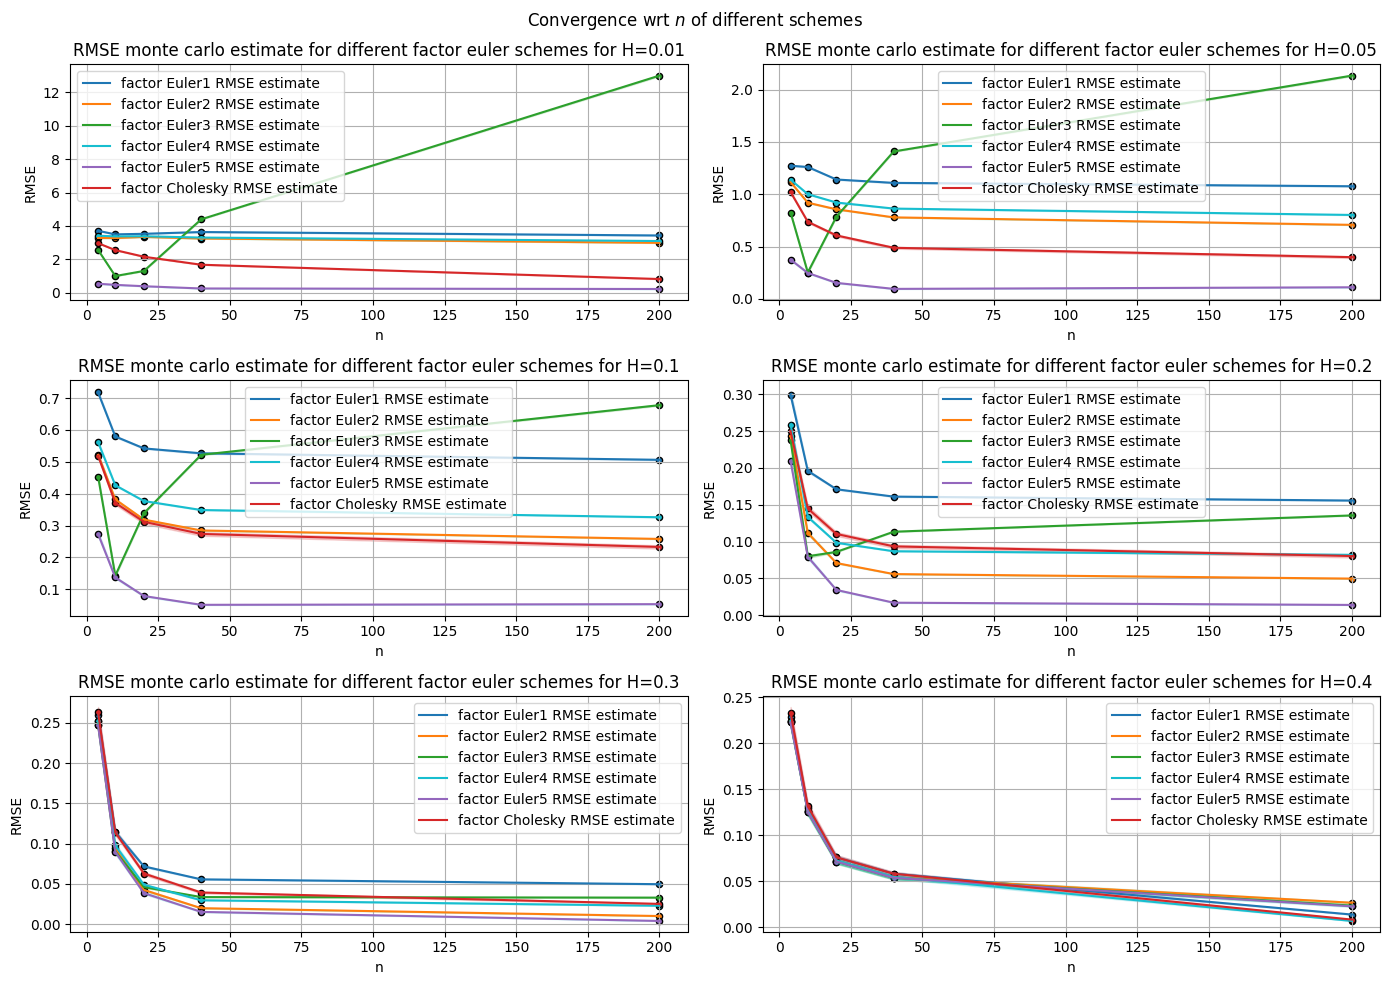

In [49]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
for index, H in enumerate(H_list):
    axs[index // 2][index % 2].plot(
        n_list,
        factor_euler1_rmse[index, :, 0],
        lw=1.5,
        color="tab:blue",
        label="factor Euler1 RMSE estimate",
    )
    axs[index // 2][index % 2].scatter(
        n_list,
        factor_euler1_rmse[index, :, 0],
        color="tab:blue",
        marker="o",
        edgecolor="k",
        s=20,
    )
    axs[index // 2][index % 2].fill_between(
        n_list,
        factor_euler1_rmse[index, :, 0] - factor_euler1_rmse[index, :, 1],
        factor_euler1_rmse[index, :, 0] + factor_euler1_rmse[index, :, 1],
        alpha=0.2,
        color="tab:blue",
    )
    axs[index // 2][index % 2].plot(
        n_list,
        factor_euler2_rmse[index, :, 0],
        lw=1.5,
        color="tab:orange",
        label="factor Euler2 RMSE estimate",
    )
    axs[index // 2][index % 2].scatter(
        n_list,
        factor_euler2_rmse[index, :, 0],
        color="tab:orange",
        marker="o",
        edgecolor="k",
        s=20,
    )
    axs[index // 2][index % 2].fill_between(
        n_list,
        factor_euler2_rmse[index, :, 0] - factor_euler2_rmse[index, :, 1],
        factor_euler2_rmse[index, :, 0] + factor_euler2_rmse[index, :, 1],
        alpha=0.2,
        color="tab:green",
    )
    axs[index // 2][index % 2].plot(
        n_list,
        factor_euler3_rmse[index, :, 0],
        lw=1.5,
        color="tab:green",
        label="factor Euler3 RMSE estimate",
    )
    axs[index // 2][index % 2].scatter(
        n_list,
        factor_euler3_rmse[index, :, 0],
        color="tab:green",
        marker="o",
        edgecolor="k",
        s=20,
    )
    axs[index // 2][index % 2].fill_between(
        n_list,
        factor_euler3_rmse[index, :, 0] - factor_euler3_rmse[index, :, 1],
        factor_euler3_rmse[index, :, 0] + factor_euler3_rmse[index, :, 1],
        alpha=0.2,
        color="tab:green",
    )
    axs[index // 2][index % 2].plot(
        n_list,
        factor_euler4_rmse[index, :, 0],
        lw=1.5,
        color="tab:cyan",
        label="factor Euler4 RMSE estimate",
    )
    axs[index // 2][index % 2].scatter(
        n_list,
        factor_euler4_rmse[index, :, 0],
        color="tab:cyan",
        marker="o",
        edgecolor="k",
        s=20,
    )
    axs[index // 2][index % 2].fill_between(
        n_list,
        factor_euler4_rmse[index, :, 0] - factor_euler4_rmse[index, :, 1],
        factor_euler4_rmse[index, :, 0] + factor_euler4_rmse[index, :, 1],
        alpha=0.2,
        color="tab:cyan",
    )
    axs[index // 2][index % 2].plot(
        n_list,
        factor_euler5_rmse[index, :, 0],
        lw=1.5,
        color="tab:purple",
        label="factor Euler5 RMSE estimate",
    )
    axs[index // 2][index % 2].scatter(
        n_list,
        factor_euler5_rmse[index, :, 0],
        color="tab:purple",
        marker="o",
        edgecolor="k",
        s=20,
    )
    axs[index // 2][index % 2].fill_between(
        n_list,
        factor_euler5_rmse[index, :, 0] - factor_euler5_rmse[index, :, 1],
        factor_euler5_rmse[index, :, 0] + factor_euler5_rmse[index, :, 1],
        alpha=0.2,
        color="tab:cyan",
    )
    axs[index // 2][index % 2].plot(
        n_list,
        factor_cholesky_rmse[index, :, 0],
        lw=1.5,
        color="tab:red",
        label="factor Cholesky RMSE estimate",
    )
    axs[index // 2][index % 2].scatter(
        n_list,
        factor_cholesky_rmse[index, :, 0],
        color="tab:red",
        marker="o",
        edgecolor="k",
        s=20,
    )
    axs[index // 2][index % 2].fill_between(
        n_list,
        factor_cholesky_rmse[index, :, 0] - factor_cholesky_rmse[index, :, 1],
        factor_cholesky_rmse[index, :, 0] + factor_cholesky_rmse[index, :, 1],
        alpha=0.2,
        color="tab:red",
    )
    axs[index // 2][index % 2].set_xlabel("n")
    axs[index // 2][index % 2].set_ylabel("RMSE")
    axs[index // 2][index % 2].set_title(
        f"RMSE monte carlo estimate for different factor euler schemes for H={H}"
    )
    axs[index // 2][index % 2].grid(True)
    axs[index // 2][index % 2].legend(loc=0)
fig.suptitle(r"Convergence wrt $n$ of different schemes")
fig.tight_layout()
plt.savefig("Factor schemes error wrt n.pdf")
plt.show()
plt.close()

In [50]:
H = 0.3
M = int(1e3)
n_steps_list = [50, 100, 150, 200, 250, 300]
# timing benchmark
cholesky_timer = np.zeros((len(n_steps_list), 2))
factor_euler1_timer = np.zeros((len(n_steps_list), 2))
factor_euler2_timer = np.zeros((len(n_steps_list), 2))
factor_euler3_timer = np.zeros((len(n_steps_list), 2))
factor_euler4_timer = np.zeros((len(n_steps_list), 2))
factor_euler5_timer = np.zeros((len(n_steps_list), 2))
factor_cholesky_timer = np.zeros((len(n_steps_list), 2))

progress_bar = tqdm(total=len(n_steps_list))
for index, n_steps in enumerate(n_steps_list):
    normal_sample = rng.standard_normal((M, n_steps))
    # Timing benchmark
    timer1 = %timeit -o cov_matrix(H, nu, T, n_steps)
    cov = cov_matrix(H, nu, T, n_steps)
    timer2 = %timeit -o cholesky_sampling(normal_sample.T, cov)
    timer = (
        np.array(timer1.timings) + np.array(timer2.timings)
    ) * 1000  # converting to ms
    cholesky_timer[index, :] = np.array([np.mean(timer), np.std(timer)])

    optim = minimize(l2_dist_kernels, r_0, args=(n, H, T), method="BFGS")
    r = optim.x
    c, x = factor_parametrization(r, n, H, T)
    parametrization_timer = %timeit -o factor_parametrization(r, n, H, T)
    timer1 = %timeit -o factor_euler1_increment(H, nu, r, n, c, x, T, n_steps)
    increment_size_euler1 = factor_euler1_increment(H, nu, r, n, c, x, T, n_steps)
    timer2 = %timeit -o v_factor_euler_sampling(normal_sample, increment_size_euler1)
    timer = (
        np.array(parametrization_timer.timings)
        + np.array(timer1.timings)
        + np.array(timer2.timings)
    ) * 1000
    factor_euler1_timer[index, :] = np.array([np.mean(timer), np.std(timer)])

    timer1 = %timeit -o factor_euler2_increment(H, nu, r, n, c, x, T, n_steps)
    increment_size_euler2 = factor_euler2_increment(H, nu, r, n, c, x, T, n_steps)
    timer2 = %timeit -o v_factor_euler_sampling(normal_sample, increment_size_euler2)
    timer = (
        np.array(parametrization_timer.timings)
        + np.array(timer1.timings)
        + np.array(timer2.timings)
    ) * 1000
    factor_euler2_timer[index, :] = np.array([np.mean(timer), np.std(timer)])

    timer1 = %timeit -o factor_euler3_increment(H, nu, r, n, c, x, T, n_steps)
    increment_size_euler3 = factor_euler3_increment(H, nu, r, n, c, x, T, n_steps)
    timer2 = %timeit -o v_factor_euler_sampling(normal_sample, increment_size_euler3)
    timer = (
        np.array(parametrization_timer.timings)
        + np.array(timer1.timings)
        + np.array(timer2.timings)
    ) * 1000
    factor_euler3_timer[index, :] = np.array([np.mean(timer), np.std(timer)])

    timer1 = %timeit -o factor_euler4_increment(H, nu, r, n, c, x, T, n_steps)
    increment_size_euler4 = factor_euler4_increment(H, nu, r, n, c, x, T, n_steps)
    timer2 = %timeit -o v_factor_euler_sampling(normal_sample, increment_size_euler4)
    timer = (
        np.array(parametrization_timer.timings)
        + np.array(timer1.timings)
        + np.array(timer2.timings)
    ) * 1000
    factor_euler4_timer[index, :] = np.array([np.mean(timer), np.std(timer)])

    timer1 = %timeit -o factor_euler5_increment(H, nu, r, n, c, x, T, n_steps, euler_scheme=3)
    increment_size_euler5, exact_increment = factor_euler5_increment(
        H, nu, r, n, c, x, T, n_steps, euler_scheme=3
    )
    timer2 = %timeit -o v_factor_euler5_sampling(normal_sample, increment_size_euler5, exact_increment)
    timer = (
        np.array(parametrization_timer.timings)
        + np.array(timer1.timings)
        + np.array(timer2.timings)
    ) * 1000
    factor_euler5_timer[index, :] = np.array([np.mean(timer), np.std(timer)])

    timer1 = %timeit -o factor_cov(c, x, T, n_steps)
    cov = factor_cov(c, x, T, n_steps)
    timer2 = %timeit -o v_factor_cholesky_sampling(normal_sample, cov)
    timer = (
        np.array(parametrization_timer.timings)
        + np.array(timer1.timings)
        + np.array(timer2.timings)
    ) * 1000
    factor_cholesky_timer[index, :] = np.array([np.mean(timer), np.std(timer)])

    logs = {
        "H": H,
        "Cholesky": f"{cholesky_timer[index, 0]} ms",
        "factor Euler1": f"{factor_euler1_timer[index, 0]} ms",
        "factor Euler2": f"{factor_euler2_timer[index, 0]} ms",
        "factor Euler3": f"{factor_euler3_timer[index, 0]} ms",
        "factor Euler4": f"{factor_euler4_timer[index, 0]} ms",
        "factor Euler5": f"{factor_euler5_timer[index, 0]} ms",
        "factor Cholesky": f"{factor_cholesky_timer[index, 0]} ms",
    }
    progress_bar.set_postfix(logs)
    progress_bar.update(1)

  0%|          | 0/6 [00:00<?, ?it/s]

1.84 ms ± 18.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
184 µs ± 18.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
15.7 µs ± 522 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
42 µs ± 776 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
3.28 ms ± 12.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
54.2 µs ± 14.4 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
3.33 ms ± 110 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
50.5 µs ± 109 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
3.34 ms ± 141 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
80.6 µs ± 42.3 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
3.28 ms ± 6.91 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
53.9 µs ± 188 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
4.85 ms ± 13 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
650 µs ± 67.5 µs per loop (mean ± std. dev. of 7 runs

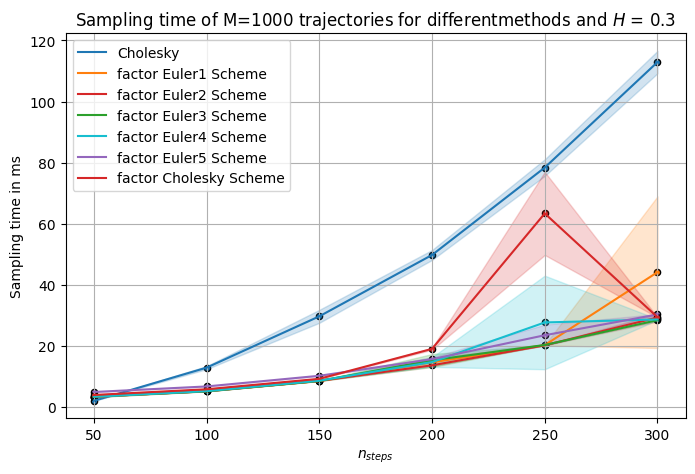

In [51]:
fig = plt.figure(figsize=(8, 5))
plt.plot(n_steps_list, cholesky_timer[:, 0], color="tab:blue", lw=1.5, label="Cholesky")
plt.scatter(
    n_steps_list,
    cholesky_timer[:, 0],
    color="tab:blue",
    marker="o",
    s=20,
    edgecolors="k",
)
plt.fill_between(
    n_steps_list,
    cholesky_timer[:, 0] - cholesky_timer[:, 1],
    cholesky_timer[:, 0] + cholesky_timer[:, 1],
    color="tab:blue",
    alpha=0.2,
)
plt.plot(
    n_steps_list,
    factor_euler1_timer[:, 0],
    color="tab:orange",
    lw=1.5,
    label="factor Euler1 Scheme",
)
plt.scatter(
    n_steps_list,
    factor_euler1_timer[:, 0],
    color="tab:orange",
    marker="o",
    s=20,
    edgecolors="k",
)
plt.fill_between(
    n_steps_list,
    factor_euler1_timer[:, 0] - factor_euler1_timer[:, 1],
    factor_euler1_timer[:, 0] + factor_euler1_timer[:, 1],
    color="tab:orange",
    alpha=0.2,
)
plt.plot(
    n_steps_list,
    factor_euler2_timer[:, 0],
    color="tab:red",
    lw=1.5,
    label="factor Euler2 Scheme",
)
plt.scatter(
    n_steps_list,
    factor_euler2_timer[:, 0],
    color="tab:red",
    marker="o",
    s=20,
    edgecolors="k",
)
plt.fill_between(
    n_steps_list,
    factor_euler2_timer[:, 0] - factor_euler2_timer[:, 1],
    factor_euler2_timer[:, 0] + factor_euler2_timer[:, 1],
    color="tab:red",
    alpha=0.2,
)
plt.plot(
    n_steps_list,
    factor_euler3_timer[:, 0],
    color="tab:green",
    lw=1.5,
    label="factor Euler3 Scheme",
)
plt.scatter(
    n_steps_list,
    factor_euler3_timer[:, 0],
    color="tab:green",
    marker="o",
    s=20,
    edgecolors="k",
)
plt.fill_between(
    n_steps_list,
    factor_euler3_timer[:, 0] - factor_euler3_timer[:, 1],
    factor_euler3_timer[:, 0] + factor_euler3_timer[:, 1],
    color="tab:green",
    alpha=0.2,
)
plt.plot(
    n_steps_list,
    factor_euler4_timer[:, 0],
    color="tab:cyan",
    lw=1.5,
    label="factor Euler4 Scheme",
)
plt.scatter(
    n_steps_list,
    factor_euler4_timer[:, 0],
    color="tab:cyan",
    marker="o",
    s=20,
    edgecolors="k",
)
plt.fill_between(
    n_steps_list,
    factor_euler4_timer[:, 0] - factor_euler4_timer[:, 1],
    factor_euler4_timer[:, 0] + factor_euler4_timer[:, 1],
    color="tab:cyan",
    alpha=0.2,
)
plt.plot(
    n_steps_list,
    factor_euler5_timer[:, 0],
    color="tab:purple",
    lw=1.5,
    label="factor Euler5 Scheme",
)
plt.scatter(
    n_steps_list,
    factor_euler5_timer[:, 0],
    color="tab:purple",
    marker="o",
    s=20,
    edgecolors="k",
)
plt.fill_between(
    n_steps_list,
    factor_euler5_timer[:, 0] - factor_euler5_timer[:, 1],
    factor_euler5_timer[:, 0] + factor_euler5_timer[:, 1],
    color="tab:purple",
    alpha=0.2,
)
plt.plot(
    n_steps_list,
    factor_cholesky_timer[:, 0],
    color="tab:red",
    lw=1.5,
    label="factor Cholesky Scheme",
)
plt.scatter(
    n_steps_list,
    factor_cholesky_timer[:, 0],
    color="tab:red",
    marker="o",
    s=20,
    edgecolors="k",
)
plt.fill_between(
    n_steps_list,
    factor_cholesky_timer[:, 0] - factor_cholesky_timer[:, 1],
    factor_cholesky_timer[:, 0] + factor_cholesky_timer[:, 1],
    color="tab:red",
    alpha=0.2,
)
plt.xlabel(r"$n_{steps}$")
plt.ylabel("Sampling time in ms")
plt.title(rf"Sampling time of M={M} trajectories for differentmethods and $H$ = {H}")
plt.grid(True)
plt.legend(loc=0)
plt.show()
plt.close()

We can clearly see that the factor are significantly faster than the cholesky scheme, this decrease in sampling time is due to the heavy computational cost of the cholesky transform with is $\mathcal O(n_{\mbox{steps}}^3)$ where computing the weights of the independant increments in the factor cholesky scheme only takes $\mathcal O(n_{\mbox{steps}}\times T(n_{\mbox{factors}}))$ where $T$ is the time complexity of the quadratic form $c^\top \Sigma c$. We should beware of the fact that once the cholesky transform is computed, the cholesky sampling method only requires a matrix mutiplication, whereas the factor cholesky scheme requiires a convolution product between the weights and the i.i.d increments. But our imperical results show that even if the convolution operation is not "vectorized" over all sample path, the vectorized matrix mutiplication does not catch up in sampling time. A potential improvement is to manually vectorize the convolution using for example jax.vmap https://jax.readthedocs.io/en/latest/_autosummary/jax.vmap.html.

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="fbm"></a><h1 style="text-align:center;">4. Going beyond</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<p  style="background-color: rgb(0, 62, 92); color: white; text-align: center; font-size: 15px;"><strong> Simulation is not a one-size-fits-all solution. Break free from the mold and discover new methods to solve the problem at hand. </strong></p> 


Explain how the above method can be adapted to the shifted kernel  
$$ K_{\epsilon}(t,s) = \frac{1}{\Gamma(H + 1/2)} (\epsilon + t - s)^{H-1/2} 1_{s<t}$$

Notice that now $H\in (-\infty, \infty)$. Why?

Study the impact of $\epsilon>0$ on the schemes. You can make epsilon vary between  $0$ and $1/52$, also for $\epsilon>0$ you can test with $H$ varying between $-1$ and $0.5$ 

With the 

$$ \forall \epsilon >0 \,\forall H\in (-1/2, \infty)\, \forall t\leqslant T\;\;K_\epsilon(t, .) \mbox{ is } \mathcal C ^1([0, T]) \Longrightarrow \sup_{0\leqslant s \leqslant T}|K_\epsilon(t, s)| < \infty $$
Thus : $$\forall \epsilon > 0 \,\forall H\in (-1/2, \infty)\;\;\sup_{t\leq T} \int_0^T K_\epsilon(t,s)^2 ds <\infty$$
If we consider the kernel with the gamma function we can extend it to $H\in (-\infty, \infty)$.
We also have for $s<t$ :

\begin{align}
\Sigma_{\epsilon}(t,s)&=\frac{\nu^2}{\Gamma(H+1/2)^2}\int_0^{s} (t+\epsilon-z)^{H-1/2}(s+\epsilon-z)^{H-1/2}dz\\
&=\frac{\nu^2}{\Gamma(H+1/2)^2}\Bigl(\int_0^{s+\epsilon} (t+\epsilon-z)^{H-1/2}(s+\epsilon-z)^{H-1/2}dz - \int_{s}^{s+\epsilon} (t+\epsilon-z)^{H-1/2}(s+\epsilon-z)^{H-1/2}dz \Bigr) \\
&= \frac{\nu^2}{\Gamma(H+1/2)^2}\Bigl(\int_0^{s+\epsilon} (t+\epsilon-z)^{H-1/2}(s+\epsilon-z)^{H-1/2}dz - \int_{0}^{\epsilon} (\epsilon+t-s-v)^{H-1/2}(\epsilon-v)^{H-1/2}dv \Bigr) \\
&= \Sigma_{0}(t+\epsilon,s+\epsilon) - \Sigma_{0}(\epsilon+t-s,\epsilon)
\end{align}

This formula holds for H $\in (0,+\infty)$. This allows for cholesky sampling.

In [52]:
# Write code
def shifted_cov_kernel(H: float, s: float, u: float, eps: float) -> float:
    """Computes covariance kernel of the Riemann-Liouville fBm
    Args:
        - H: Hurst index
        - s: timestep 1
        - u: timestep 2 (u > s)
        - eps: shifting parameter
    Returns:
        - float: Cov(X_s, X_u)
    """
    alpha = H + 1 / 2
    if s <= u:
        return cov_kernel(H, s + eps, u + eps) - cov_kernel(
            H, eps, eps + max(u - s, s - u)
        )
    else:
        return 0


def shifted_cov_matrix(
    H: float, nu: float, T: float, n_steps: int, eps: float
) -> np.ndarray:
    """Cholesky transform of variance covariance matrix of a Riemann-Liouville fBm trajectory
    Args:
        - H: Hurst index
        - nu: magnifying constant
        - T: time horizon
        - n_steps: number of timesteps
        - eps: shifting parameter
    Returns:
        - np.ndarray: cholesky transform of covariance matrix
    """
    if eps == 0:
        return cov_matrix(H, nu, T, n_steps)
    alpha = H + 1 / 2
    dt = T / n_steps
    t = np.arange(1, n_steps + 1) * dt
    cov = (
        np.array(
            [
                [
                    shifted_cov_kernel(H, t[i], t[j], eps) if i <= j else 0
                    for j in range(n_steps)
                ]
                for i in range(n_steps)
            ]
        )
        * nu**2
        / (gamma(alpha) * gamma(alpha + 1))
    )
    return np.linalg.cholesky(cov + cov.T - np.diag(np.diag(cov)))

In [53]:
nu = 1
T = 1
n_steps = 300
H = 0.3
eps_list = np.linspace(0.0, 1 / 52, num=3)
normal_sample = rng.standard_normal(len(cov))
t = np.arange(n_steps + 1) * T / n_steps
sample_paths = np.zeros((len(eps_list), n_steps + 1))
for index, eps in enumerate(eps_list):
    cov = shifted_cov_matrix(H, nu, T, n_steps, eps)
    sample_paths[index, :] = cholesky_sampling(normal_sample, cov)

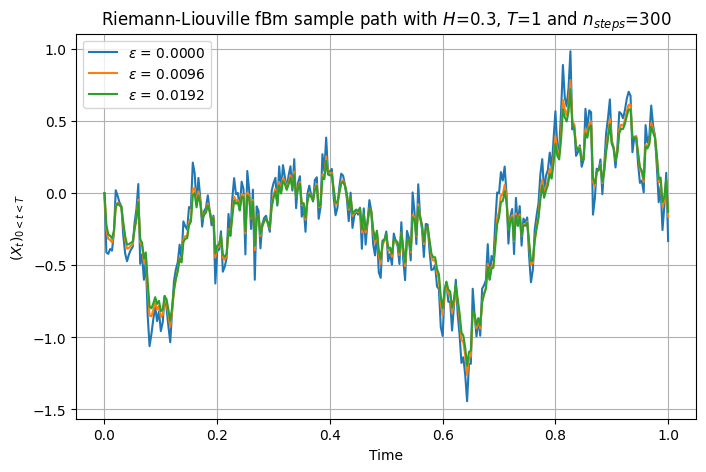

In [54]:
fig = plt.figure(figsize=(8, 5))
for index, eps in enumerate(eps_list):
    plt.plot(
        t,
        sample_paths[index, :],
        label=rf"$\varepsilon$ = {eps:.4f}",
    )
plt.xlabel("Time")
plt.ylabel(r"$(X_t)_{0<t<T}$")
plt.title(
    rf"Riemann-Liouville fBm sample path with $H$={H}, $T$={T} and $n_{{steps}}$={n_steps}"
)
plt.grid(True)
plt.legend(loc=0)
plt.show()
plt.close()

We can also sample the process using Euler schemes like in the second section :

In [55]:
def shifted_euler1_increment(
    H: float, nu: float, T: float, n_steps: int, eps: float
) -> np.ndarray:
    """Computes the weight of the Euler1 scheme increments
    Args:
        - H: Hurst index
        - nu: magnifying constant
        - T: time horizon
        - n_steps: number of timesteps
        - eps: shifting parameter
    Returns:
        - np.ndarray: weight of the increments
    """
    alpha = H + 1 / 2
    dt = T / n_steps
    return (
        nu
        * np.sqrt(dt)
        * (np.arange(1, n_steps + 1) * dt + eps) ** (H - 1 / 2)
        / gamma(alpha)
    )

In [56]:
nu = 1
T = 1
n_steps = 300
H_list = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4]
eps = 1 / 52
regular_cholesky_results = np.zeros((len(H_list), n_steps + 1))
shifted_cholesky_results = np.zeros((len(H_list), n_steps + 1))
shifted_euler1_results = np.zeros((len(H_list), n_steps + 1))
normal_sample = rng.standard_normal(n_steps)
for index, H in enumerate(H_list):
    cov = v_cov_matrix(H, nu, T, n_steps)
    regular_cholesky_results[index, :] = cholesky_sampling(normal_sample, cov)
    cov = shifted_cov_matrix(H, nu, T, n_steps, eps)
    shifted_cholesky_results[index, :] = cholesky_sampling(normal_sample, cov)
    increment_size = shifted_euler1_increment(H, nu, T, n_steps, eps)
    shifted_euler1_results[index, :] = euler_sampling(normal_sample, increment_size)

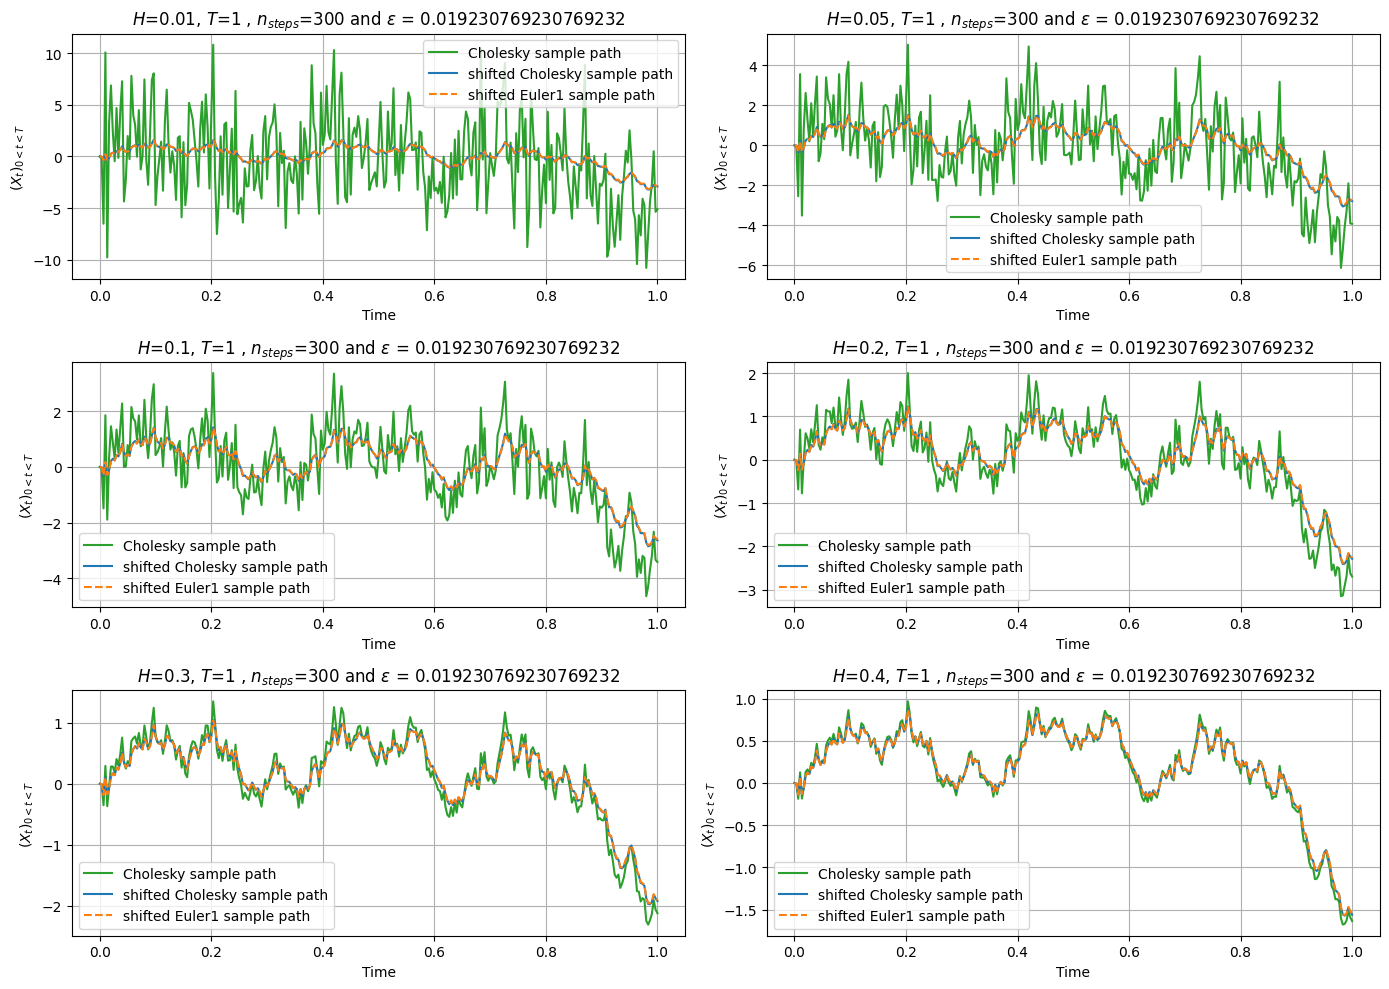

In [57]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
for index, H in enumerate(H_list):
    axs[index // 2][index % 2].plot(
        t,
        regular_cholesky_results[index, :],
        color="tab:green",
        lw=1.5,
        label="Cholesky sample path",
    )
    axs[index // 2][index % 2].plot(
        t,
        shifted_cholesky_results[index, :],
        color="tab:blue",
        lw=1.5,
        label="shifted Cholesky sample path",
    )
    axs[index // 2][index % 2].plot(
        t,
        shifted_euler1_results[index, :],
        color="tab:orange",
        lw=1.5,
        linestyle="--",
        label="shifted Euler1 sample path",
    )
    axs[index // 2][index % 2].set_xlabel("Time")
    axs[index // 2][index % 2].set_ylabel(r"$(X_t)_{0<t<T}$")
    axs[index // 2][index % 2].set_title(
        rf"$H$={H}, $T$={T} , $n_{{steps}}$={n_steps} and $\varepsilon$ = {eps}"
    )
    axs[index // 2][index % 2].grid(True)
    axs[index // 2][index % 2].legend(loc=0)
fig.tight_layout()
plt.show()
plt.close()

In [58]:
def shifted_euler2_increment(
    H: float, nu: float, T: float, n_steps: int, eps: float
) -> np.ndarray:
    """Computes the weights of the Euler2 scheme increments
    Args:
        - H: Hurst index
        - nu: magnifying constant
        - T: time horizon
        - n_steps: number of timesteps
        - eps: shifting parameter
    Returns:
        - np.ndarray: weight of the form nu*sqrt(dt)*K
    """
    alpha = H + 1 / 2
    dt = T / n_steps
    return (
        nu
        * dt**H
        * (
            (np.arange(1, n_steps + 1) + eps / dt) ** alpha
            - (np.arange(n_steps) + eps / dt) ** alpha
        )
        / (alpha * gamma(alpha))
    )

In [59]:
nu = 1
T = 1
n_steps = 300
H_list = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4]
eps = 1 / 52
regular_cholesky_results = np.zeros((len(H_list), n_steps + 1))
shifted_cholesky_results = np.zeros((len(H_list), n_steps + 1))
shifted_euler2_results = np.zeros((len(H_list), n_steps + 1))
for index, H in enumerate(H_list):
    cov = v_cov_matrix(H, nu, T, n_steps)
    regular_cholesky_results[index, :] = cholesky_sampling(normal_sample, cov)
    cov = shifted_cov_matrix(H, nu, T, n_steps, eps)
    shifted_cholesky_results[index, :] = cholesky_sampling(normal_sample, cov)
    increment_size = shifted_euler2_increment(H, nu, T, n_steps, eps)
    shifted_euler2_results[index, :] = euler_sampling(normal_sample, increment_size)

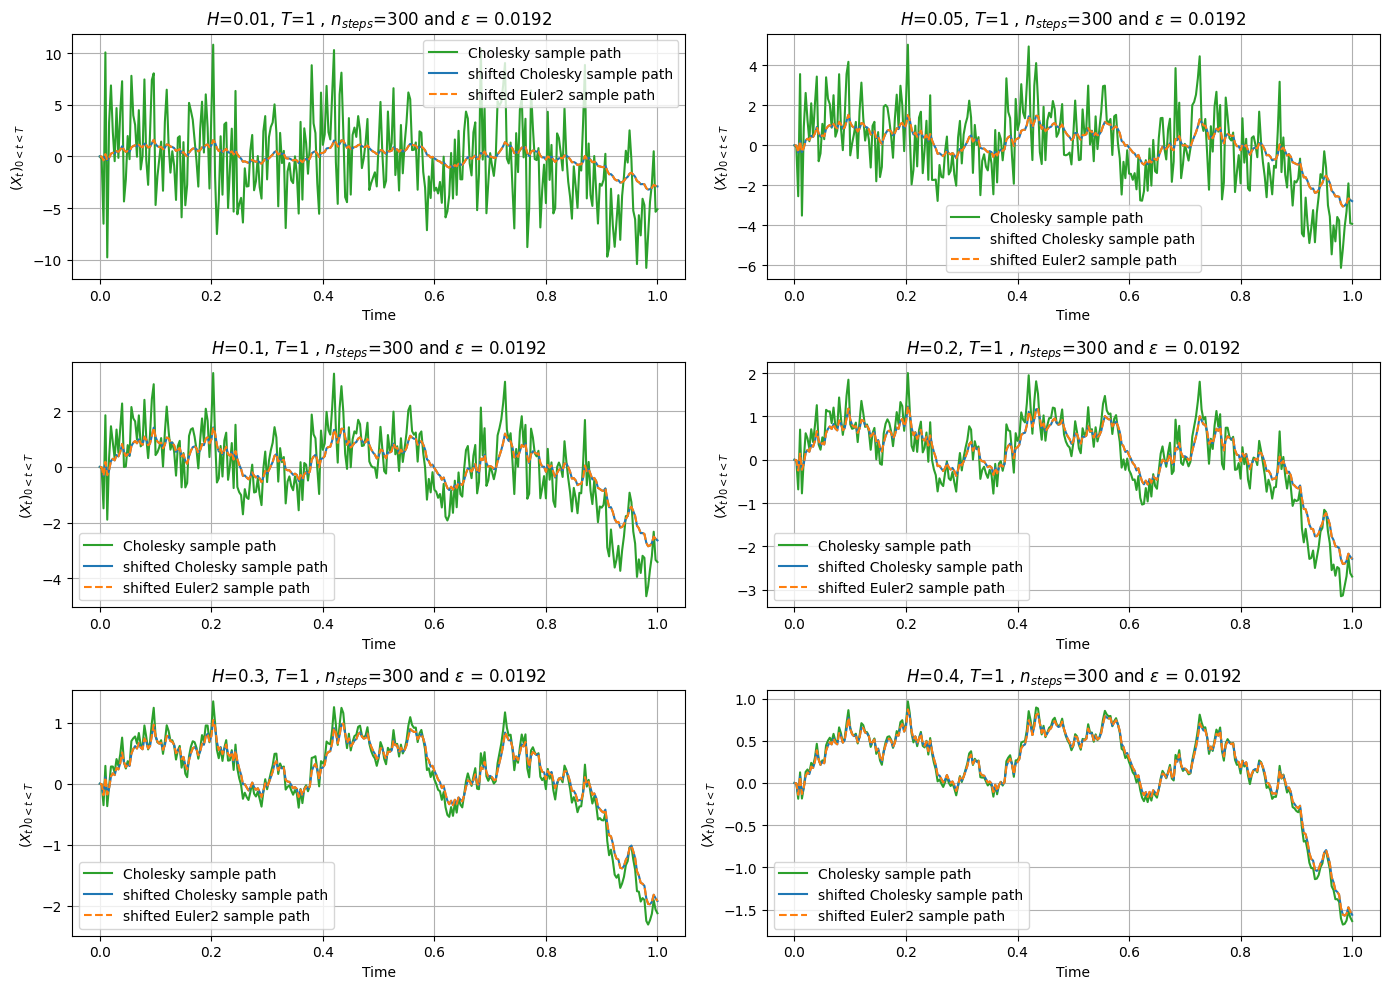

In [60]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
for index, H in enumerate(H_list):
    axs[index // 2][index % 2].plot(
        t,
        regular_cholesky_results[index, :],
        color="tab:green",
        lw=1.5,
        label="Cholesky sample path",
    )
    axs[index // 2][index % 2].plot(
        t,
        shifted_cholesky_results[index, :],
        color="tab:blue",
        lw=1.5,
        label="shifted Cholesky sample path",
    )
    axs[index // 2][index % 2].plot(
        t,
        shifted_euler2_results[index, :],
        color="tab:orange",
        lw=1.5,
        linestyle="--",
        label="shifted Euler2 sample path",
    )
    axs[index // 2][index % 2].set_xlabel("Time")
    axs[index // 2][index % 2].set_ylabel(r"$(X_t)_{0<t<T}$")
    axs[index // 2][index % 2].set_title(
        rf"$H$={H}, $T$={T} , $n_{{steps}}$={n_steps} and $\varepsilon$ = {eps:.4f}"
    )
    axs[index // 2][index % 2].grid(True)
    axs[index // 2][index % 2].legend(loc=0)
fig.tight_layout()
plt.show()
plt.close()

In [61]:
def shifted_euler3_increment(
    H: float, nu: float, T: float, n_steps: int, eps: float
) -> np.ndarray:
    """Computes the weights of the Euler3 scheme increments
    Args:
        - H: Hurst index
        - nu: magnifying constant
        - T: time horizon
        - n_steps: number of timesteps
        - eps: shifting parameter
    Returns:
        - np.ndarray: weight of the form nu*sqrt(dt)*K
    """
    alpha = H + 1 / 2
    dt = T / n_steps
    return (
        nu
        * dt**H
        * np.sqrt(
            (np.arange(1, n_steps + 1) + eps / dt) ** (2 * H)
            - (np.arange(n_steps) + eps / dt) ** (2 * H)
        )
        / (np.sqrt(2 * H) * gamma(alpha))
    )

In [62]:
nu = 1
T = 1
n_steps = 300
H_list = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4]
eps = 1 / 52
regular_cholesky_results = np.zeros((len(H_list), n_steps + 1))
shifted_cholesky_results = np.zeros((len(H_list), n_steps + 1))
shifted_euler3_results = np.zeros((len(H_list), n_steps + 1))
for index, H in enumerate(H_list):
    cov = v_cov_matrix(H, nu, T, n_steps)
    regular_cholesky_results[index, :] = cholesky_sampling(normal_sample, cov)
    cov = shifted_cov_matrix(H, nu, T, n_steps, eps)
    shifted_cholesky_results[index, :] = cholesky_sampling(normal_sample, cov)
    increment_size = shifted_euler3_increment(H, nu, T, n_steps, eps)
    shifted_euler3_results[index, :] = euler_sampling(normal_sample, increment_size)

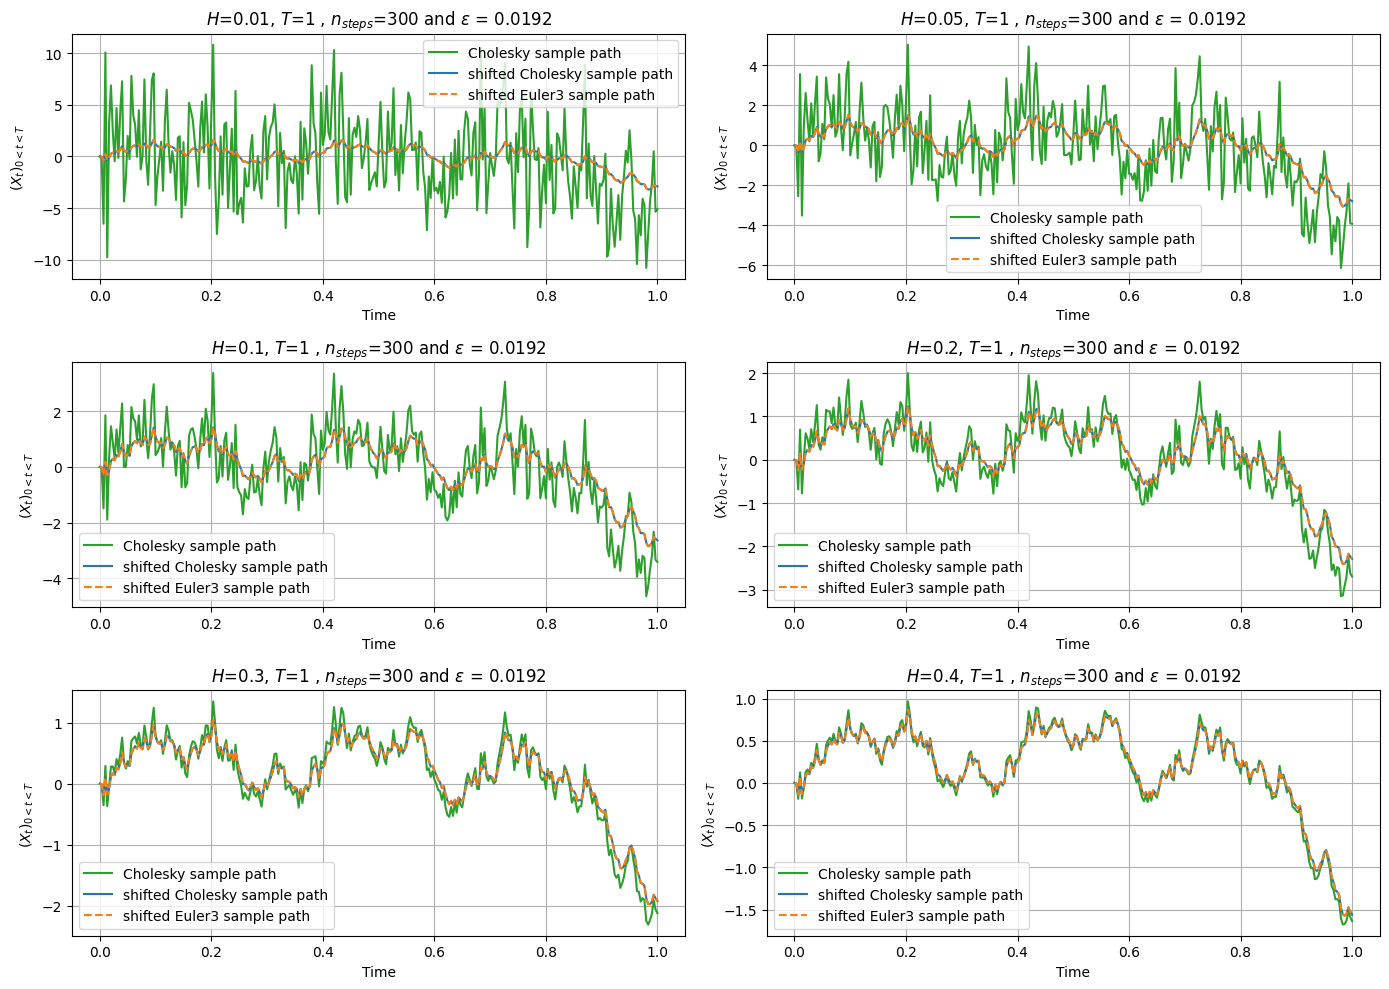

In [63]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
for index, H in enumerate(H_list):
    axs[index // 2][index % 2].plot(
        t,
        regular_cholesky_results[index, :],
        color="tab:green",
        lw=1.5,
        label="Cholesky sample path",
    )
    axs[index // 2][index % 2].plot(
        t,
        shifted_cholesky_results[index, :],
        color="tab:blue",
        lw=1.5,
        label="shifted Cholesky sample path",
    )
    axs[index // 2][index % 2].plot(
        t,
        shifted_euler3_results[index, :],
        color="tab:orange",
        lw=1.5,
        linestyle="--",
        label="shifted Euler3 sample path",
    )
    axs[index // 2][index % 2].set_xlabel("Time")
    axs[index // 2][index % 2].set_ylabel(r"$(X_t)_{0<t<T}$")
    axs[index // 2][index % 2].set_title(
        rf"$H$={H}, $T$={T} , $n_{{steps}}$={n_steps} and $\varepsilon$ = {eps:.4f}"
    )
    axs[index // 2][index % 2].grid(True)
    axs[index // 2][index % 2].legend(loc=0)
fig.tight_layout()
plt.show()
plt.close()

The euler schemes 1 and 2 allow us to generate sample paths for $H\in (-1/2, 0)$.

In [64]:
nu = 1
T = 1
n_steps = 300
H_list = [-0.4, -0.3, -0.1, 0.01, 0.1, 0.2]
eps = 1 / 104
shifted_euler1_results = np.zeros((len(H_list), n_steps + 1))
shifted_euler2_results = np.zeros((len(H_list), n_steps + 1))
normal_sample = rng.standard_normal(n_steps)
for index, H in enumerate(H_list):
    increment_size = shifted_euler1_increment(H, nu, T, n_steps, eps)
    shifted_euler1_results[index, :] = euler_sampling(normal_sample, increment_size)
    increment_size = shifted_euler2_increment(H, nu, T, n_steps, eps)
    shifted_euler2_results[index, :] = euler_sampling(normal_sample, increment_size)

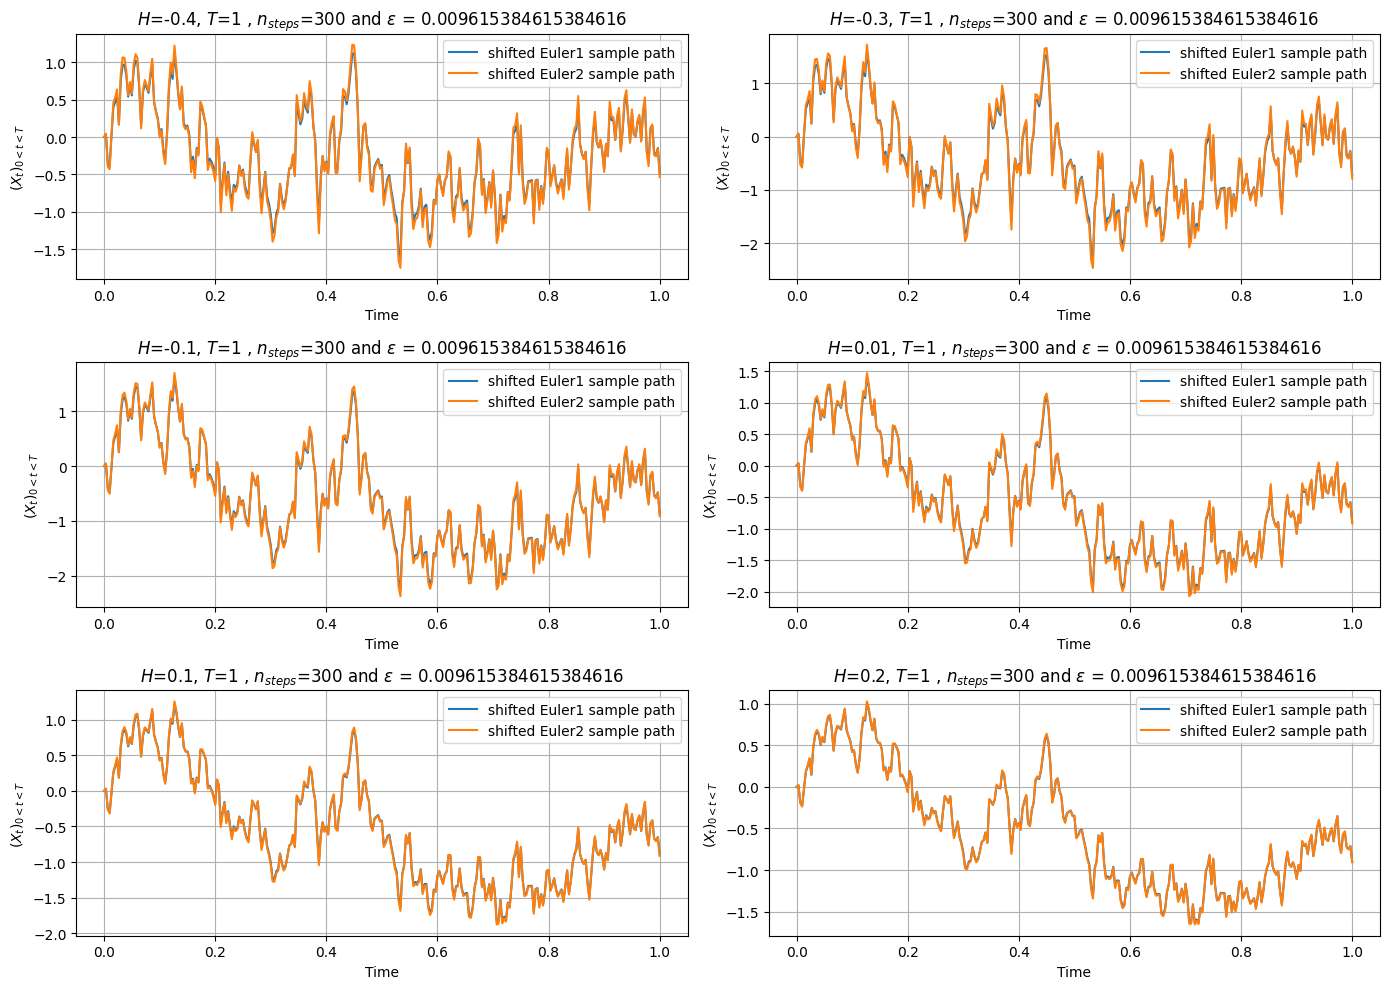

In [65]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
for index, H in enumerate(H_list):
    axs[index // 2][index % 2].plot(
        t,
        shifted_euler1_results[index, :],
        color="tab:blue",
        lw=1.5,
        label="shifted Euler1 sample path",
    )
    axs[index // 2][index % 2].plot(
        t,
        shifted_euler2_results[index, :],
        color="tab:orange",
        lw=1.5,
        label="shifted Euler2 sample path",
    )
    axs[index // 2][index % 2].set_xlabel("Time")
    axs[index // 2][index % 2].set_ylabel(r"$(X_t)_{0<t<T}$")
    axs[index // 2][index % 2].set_title(
        rf"$H$={H}, $T$={T} , $n_{{steps}}$={n_steps} and $\varepsilon$ = {eps}"
    )
    axs[index // 2][index % 2].grid(True)
    axs[index // 2][index % 2].legend(loc=0)
fig.tight_layout()
plt.show()
plt.close()

We can also attempt a multifactor approximation like before since :
$$K_\epsilon(t) = \int_0^{\infty} e^{-xt}\;\mu_\epsilon(dx)\;\;,\;\text{s.t} \;\;\mu_\epsilon(dx) = \frac{x^{-\alpha}e^{-x\epsilon}}{\Gamma(\alpha)\Gamma(1-\alpha)}\,dx$$
And with the geometric repartition $\eta_i^n = r_n^{i - \frac{n}{2}}$ we can write:
$$ c_i^{\epsilon, n} = \int_{\eta_{i-1}^n}^{\eta_i^n}\mu_\epsilon(dx) = \frac{1}{\Gamma(\alpha)\Gamma(1-\alpha)}\int_{\eta_{i-1}^n}^{\eta_{i}^n}x^{-\alpha}e^{-x\epsilon}\,dx$$
$$  x_i^{\epsilon, n} = \frac{1}{c_i^{\epsilon, n}}\int_{\eta_{i-1}^n}^{\eta_i^n}x\,\mu_\epsilon(dx) = \frac{1}{c_i^{\epsilon, n}\Gamma(\alpha)\Gamma(1-\alpha)}\int_{\eta_{i-1}^n}^{\eta_{i}^n}x^{1-\alpha}e^{-x\epsilon}\,dx$$
The parameters $c$ and $x$ can be expressed using incomplete gamma functions, and we can thus find the optimal $r$ like before.